# TRABAJO PRACTICO N° 1

---


# Aprendizaje Automático 1
### INTEGRANTES: Rondini, Sofía - Cancio, Jose
### AÑO: 2024 - 1º CUAT.

---



# 1º ENTREGA - PROBLEMA DE REGRESION LINEAL

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn import metrics
from tensorflow.keras.metrics import Recall

import warnings
warnings.filterwarnings('ignore')

In [5]:
### IMPORTAR LOS DATOS DEL ARCHIVO CSV COMO DATAFRAME DE PANDAS

file_path = "https://raw.githubusercontent.com/sofiarondini/AA1-RondiniCancio/main/weatherAUS%20(1).csv"
df = pd.read_csv(file_path, sep=',',engine='python')

***INFORMACIÓN DEL DATASET***

Los datos que componen el dataset corresponden a observaciones climaticas realizadas en un determinado dia ("Date") y en una determinada localidad ("Location"), en Australia, en un periodo de 10 años aproximadamente.
Si bien, las unidades de las medidas observadas no figuran en el dataset o en archivo aparte, las referencias de las caracteristicas y sus unidades fueron extraidas, principalmente, del Bureau of Meteorology de Australia (https://reg.bom.gov.au/),  (http://www.bom.gov.au/climate/averages/tables/cw_066062_All.shtml)

 **Date:** el dia cuando se realizó la obervación   
 **Location**: ciudades de Australia donde se tomaron las observaciones climaticas - Variable categorica

 **MinTemp:** minima temperatura medida en Grados Celsius - Variable numerica

 **MaxTemp:** maxima temperatura medida en Grados Celsius - Variable numerica

 **Rainfall:** precipitacion medida en mm - Variable numerica

 **Evaporation**: evaporacion medida en mm - Variable numerica

 **Sunshine:** tiempo en que la luz solar es mayor que un determinado umbral medido en horas - Variable numerica

 **WindGustDir**: direccion de la rafaga de viento respecto de los puntos cardinales y colaterales- Variable
 categorica

 **WindGustSpeed:** velocidad de la rafaga de viento medida en Km/h - Variable
 numerica

 **WindDir9am:** direccion del viento medida a la hora 9AM respecto de los puntos cardinales y colaterales -- Variable
 categorica

 **WindDir3pm:** direccion del viento medida a la hora 3PM en respecto de los puntos cardinales y colaterales- - Variable
 categorica

 **WindSpeed9am:** velocidad del viento medida a la hora 9AM en Km/h - Variable
  numerica

 **WindSpeed3pm:** velocidad del viento medida a la hora 3PM en Km/h - Variable
  numerica

 **Humidity9am:** humedad relativa medida a la hora 9AM en porcentaje de vapor de agua presente en el aire (%) - Variable numerica

 **Humidity3pm:** humedad relativa medida a la hora 3PM en porcentaje de vapor de agua presente en el aire (%) - Variable numerica

 **Pressure9am:** presion atmosferica medida a la hora 9AM en hectopascales (hpa) - Variable numerica

 **Pressure3pm:** presion atmosferica medida a la hora 3PM en hectopascales (hpa) - Variable numerica

 **Cloud9am:** fraccion del cielo oscurecida por las nubes, medida a la hora 9AM en octavos u "octas" de cielo cubierto - Variable numerica

 **Cloud3pm:** fraccion del cielo oscurecida por las nubes, medida  a la hora 3PM en octavos u "octas" de cielo cubierto - Variable numerica

 **Temp9am:** temperatura ambiente medida a la hora 9AM en Grados - Variable numerica

 **Temp3pm:** temperatura ambiente medida a la hora 3PM en Grados - Variable numerica

 **RainToday:** si llovio el dia de la observacion (SI/NO)- Variable categorica

 **RainTomorrow:** si llovio el dia posterior a la observacion (SI/NO)- vartiable categorica

 **RainfallTomorrow:** precipitacion del dia posterior a la observacion medida en mm - Variable numerica


In [6]:
### VISTA DE LOS PRIMEROS 5 REGISTROS
df.head()

Unnamed: 0        Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0           0  2008-12-01   Albury     13.4     22.9       0.6          NaN   
1           1  2008-12-02   Albury      7.4     25.1       0.0          NaN   
2           2  2008-12-03   Albury     12.9     25.7       0.0          NaN   
3           3  2008-12-04   Albury      9.2     28.0       0.0          NaN   
4           4  2008-12-05   Albury     17.5     32.3       1.0          NaN   

   Sunshine WindGustDir  WindGustSpeed  ... Humidity3pm Pressure9am  \
0       NaN           W           44.0  ...        22.0      1007.7   
1       NaN         WNW           44.0  ...        25.0      1010.6   
2       NaN         WSW           46.0  ...        30.0      1007.6   
3       NaN          NE           24.0  ...        16.0      1017.6   
4       NaN           W           41.0  ...        33.0      1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  \
0       1007.1       8.0       NaN     16.9     21.8         No            No   
1       1007.8       NaN       NaN     17.2     24.3         No            No   
2       1008.7       NaN       2.0     21.0     23.2         No            No   
3       1012.8       NaN       NaN     18.1     26.5         No            No   
4       1006.0       7.0       8.0     17.8     29.7         No            No   

   RainfallTomorrow  
0               0.0  
1               0.0  
2               0.0  
3               1.0  
4               0.2  

[5 rows x 25 columns]

In [7]:
## FORMATO DEL DATASET
df.shape  ## VEMOS QUE CONTIENE 145412 OBSERVACIONES

(145412, 25)

In [8]:
### COLUMNAS, ¿cuáles son variables numéricas y cuales variables categóricas?
df.columns

Index(['Unnamed: 0', 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'RainfallTomorrow'],
      dtype='object')

In [9]:
## INFO DEL DATASET(COLUMNAS DATOS, TIPO DATOS, CANTIDAD VALORES NO NULOS, ETC )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145412 entries, 0 to 145411
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        145412 non-null  int64  
 1   Date              145412 non-null  object 
 2   Location          145412 non-null  object 
 3   MinTemp           143928 non-null  float64
 4   MaxTemp           144159 non-null  float64
 5   Rainfall          142152 non-null  float64
 6   Evaporation       82658 non-null   float64
 7   Sunshine          75616 non-null   float64
 8   WindGustDir       135096 non-null  object 
 9   WindGustSpeed     135159 non-null  float64
 10  WindDir9am        134850 non-null  object 
 11  WindDir3pm        141186 non-null  object 
 12  WindSpeed9am      143645 non-null  float64
 13  WindSpeed3pm      142351 non-null  float64
 14  Humidity9am       142759 non-null  float64
 15  Humidity3pm       140907 non-null  float64
 16  Pressure9am       13

In [10]:
## CONVERTIR LA VARIABLE 'Date' A TIPO DATETIME
df['Date']= df['Date'].astype('datetime64[ns]')

In [11]:
## VEMOS CUANTOS SON LOS VALORES UNICOS DE LA VARIABLE "Location"
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [12]:
df.Location.nunique()

49

*Filtramos el dataset con las Localidades de interes para el problema*

In [13]:
filtro= df.Location.isin (['Adelaide', 'Canberra', 'Cobar','Dartmoor', 'Melbourne', 'MelbourneAirport', 'MountGambier','Sydney', 'SydneyAirport'])
filtro

0         False
1         False
2         False
3         False
4         False
          ...  
145407    False
145408    False
145409    False
145410    False
145411    False
Name: Location, Length: 145412, dtype: bool

In [14]:
### Vista de datos filtrados por las ciudades seleccionadas
df_filtrado= df[filtro]
df_filtrado


Unnamed: 0       Date      Location  MinTemp  MaxTemp  Rainfall  \
6047          6049 2009-01-01         Cobar     17.9     35.2       0.0   
6048          6050 2009-01-02         Cobar     18.4     28.9       0.0   
6049          6051 2009-01-03         Cobar     15.5     34.1       0.0   
6050          6052 2009-01-04         Cobar     19.4     37.6       0.0   
6051          6053 2009-01-05         Cobar     21.9     38.4       0.0   
...            ...        ...           ...      ...      ...       ...   
102515      102547 2017-06-20  MountGambier      6.2     16.3       0.0   
102516      102548 2017-06-21  MountGambier      8.7     13.2       2.0   
102517      102549 2017-06-22  MountGambier      7.0     15.7       0.0   
102518      102550 2017-06-23  MountGambier      5.4     16.2       0.0   
102519      102551 2017-06-24  MountGambier      4.8     12.3       2.2   

        Evaporation  Sunshine WindGustDir  WindGustSpeed  ... Humidity3pm  \
6047           12.0      12.3         SSW           48.0  ...        13.0   
6048           14.8      13.0           S           37.0  ...         8.0   
6049           12.6      13.3          SE           30.0  ...         7.0   
6050           10.8      10.6         NNE           46.0  ...        22.0   
6051           11.4      12.2         WNW           31.0  ...        22.0   
...             ...       ...         ...            ...  ...         ...   
102515          NaN       NaN           N           41.0  ...        70.0   
102516          NaN       NaN           S           20.0  ...        82.0   
102517          NaN       NaN           N           31.0  ...        67.0   
102518          NaN       NaN           N           37.0  ...        70.0   
102519          NaN       NaN           W           28.0  ...        70.0   

       Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
6047        1006.3       1004.4       2.0       5.0     26.6     33.4   
6048        1012.9       1012.1       1.0       1.0     20.3     27.0   
6049           NaN       1011.6       NaN       1.0      NaN     32.7   
6050        1012.3       1009.2       1.0       6.0     28.7     34.9   
6051        1012.7       1009.1       1.0       5.0     29.1     35.6   
...            ...          ...       ...       ...      ...      ...   
102515      1026.3       1024.1       NaN       NaN      8.7     15.5   
102516      1029.2       1028.3       NaN       8.0     11.1     12.0   
102517      1027.0       1022.4       8.0       NaN     10.0     14.9   
102518      1017.0       1014.4       8.0       4.0      6.4     14.9   
102519      1020.0       1018.0       5.0       8.0      8.2     11.5   

        RainToday  RainTomorrow  RainfallTomorrow  
6047           No            No               0.0  
6048           No            No               0.0  
6049           No            No               0.0  
6050           No            No               0.0  
6051           No            No               0.0  
...           ...           ...               ...  
102515         No           Yes               2.0  
102516        Yes            No               0.0  
102517         No            No               0.0  
102518         No           Yes               2.2  
102519        Yes            No               0.6  

[28233 rows x 25 columns]

In [15]:
# COMPROBAMOS QUE EL FILTRADO DE LAS LOCALIDADES ES EL CORRECTO
df_filtrado.Location.unique()

array(['Cobar', 'Sydney', 'SydneyAirport', 'Canberra', 'MelbourneAirport',
       'Melbourne', 'Dartmoor', 'Adelaide', 'MountGambier'], dtype=object)

*Forma del dataset*

In [16]:
df_filtrado.shape

(28233, 25)

*Borramos la columna "Unnamed: 0" pues son Id de los registros del dataset original que no nos aportan informacion alguna de interes*

In [17]:
df_filtrado.drop(columns='Unnamed: 0', inplace=True)

*Si las ciudades las tomamos como "una sola" entonces borramos la columna 'Location' porque su varianza es cero y no contribuye en nada al modelo*

In [18]:
df_filtrado.drop(columns='Location', inplace=True)

*Ordenamos el dataset por la columna 'Date' (fechas de las observaciones), para que al dividir el mismo en el siguiente punto, los subconjuntos no queden con fechas intercaladas correspondientes al otro subconjunto*

In [19]:
df_filtrado.sort_values(by= 'Date', inplace=True)
#df_filtrado

## Split del Dataset

In [20]:
# División de los datos en train y test

X = df_filtrado.drop(columns= ['RainfallTomorrow', 'RainTomorrow'])
y = df_filtrado['RainfallTomorrow']
y_clasif= df_filtrado['RainTomorrow'] # NO LO USAMOS PARA PREDECIR EL MODELO DE REGRESION POR SER VARIABLE TARGET PARA MODELO DE CLASIFICACION

X_train, X_test, y_train, y_test = train_test_split(X,y.values.reshape(-1,1),test_size=0.2,random_state = 42, shuffle= False)

In [21]:
X_train.shape, X_test.shape

((22586, 21), (5647, 21))

In [22]:
y_train.shape, y_test.shape

((22586, 1), (5647, 1))

In [23]:
X_train.columns

Index(['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

In [24]:
X_train['RainfallTomorrow'] = y_train

In [25]:
X_train

Date  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
45573  2007-11-01      8.0     24.3       0.0          3.4       6.3   
45574  2007-11-02     14.0     26.9       3.6          4.4       9.7   
45575  2007-11-03     13.7     23.4       3.6          5.8       3.3   
45576  2007-11-04     13.3     15.5      39.8          7.2       9.1   
45577  2007-11-05      7.6     16.1       2.8          5.6      10.6   
...           ...      ...      ...       ...          ...       ...   
35890  2015-10-06     20.0     36.4       0.0          8.6      11.4   
98853  2015-10-06     18.1     23.8       0.0          NaN       NaN   
8427   2015-10-06     20.8     36.8       0.0          8.4       NaN   
101892 2015-10-06     16.6     20.7       0.0         12.0       4.6   
48380  2015-10-06      6.8     31.8       0.0          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Humidity9am  \
45573           NW           30.0         SW         NW  ...         68.0   
45574          ENE           39.0          E          W  ...         80.0   
45575           NW           85.0          N        NNE  ...         82.0   
45576           NW           54.0        WNW          W  ...         62.0   
45577          SSE           50.0        SSE        ESE  ...         68.0   
...            ...            ...        ...        ...  ...          ...   
35890          NNE           52.0         NW         NE  ...         31.0   
98853           SW           44.0         SW         SW  ...         61.0   
8427           NNW           48.0        NNE         NW  ...         13.0   
101892           W           52.0        WNW        WSW  ...         63.0   
48380          NNW           61.0        ENE        WNW  ...         55.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
45573          29.0       1019.7       1015.0       7.0       7.0     14.4   
45574          36.0       1012.4       1008.4       5.0       3.0     17.5   
45575          69.0       1009.5       1007.2       8.0       7.0     15.4   
45576          56.0       1005.5       1007.0       2.0       7.0     13.5   
45577          49.0       1018.3       1018.5       7.0       7.0     11.1   
...             ...          ...          ...       ...       ...      ...   
35890          21.0       1023.0       1019.3       1.0       1.0     25.0   
98853          49.0       1017.1       1022.4       NaN       NaN     19.9   
8427            6.0       1022.0       1019.5       0.0       0.0     26.9   
101892         65.0       1012.3       1019.9       5.0       7.0     18.7   
48380          17.0       1025.2       1020.9       NaN       NaN     17.5   

        Temp3pm  RainToday  RainfallTomorrow  
45573      23.6         No               3.6  
45574      25.7        Yes               3.6  
45575      20.2        Yes              39.8  
45576      14.1        Yes               2.8  
45577      15.4        Yes               0.0  
...         ...        ...               ...  
35890      32.5         No               0.0  
98853      19.3         No               0.0  
8427       35.8         No               0.0  
101892     15.1         No               0.0  
48380      31.4         No               0.0  

[22586 rows x 22 columns]

In [26]:
## Obtener los nombres de las variables numericas y categoricas
num_var = [variable for variable in X_train.columns if X_train[variable].dtypes == ('int64' and 'float64') ]
cat_var = [variable for variable in X_train.columns if X_train[variable].dtypes == ('O')]

print(f"La variables numericas en los datos son {num_var}.\n")
print(f"La variables categoricas en los datos son {cat_var}.")

La variables numericas en los datos son ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainfallTomorrow'].

La variables categoricas en los datos son ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'].


In [27]:
## Observamos los unicos valores en cada una de las variables categoricas

for variable in cat_var:
    print(f"Los unicos valores en {variable} son {X_train[variable].unique()} (total de {X_train[variable].nunique()}).\n")


Los unicos valores en WindGustDir son ['NW' 'ENE' 'SSE' 'SE' 'E' 'S' 'N' 'WNW' 'ESE' 'NE' 'NNE' 'NNW' 'SW' 'W'
 'WSW' nan 'SSW'] (total de 16).

Los unicos valores en WindDir9am son ['SW' 'E' 'N' 'WNW' 'SSE' 'SE' 'S' 'WSW' 'NNE' 'NNW' 'ENE' 'SSW' 'NW'
 'ESE' 'NE' 'W' nan] (total de 16).

Los unicos valores en WindDir3pm son ['NW' 'W' 'NNE' 'ESE' 'E' 'ENE' 'WSW' 'NE' 'NNW' 'SE' 'S' 'SW' 'WNW' 'N'
 'SSW' 'SSE' nan] (total de 16).

Los unicos valores en RainToday son ['No' 'Yes' nan] (total de 2).



# Datos faltantes

In [28]:
### Cantidad de valores faltantes.

X_train.isna().sum()

Date                   0
MinTemp              356
MaxTemp              343
Rainfall             741
Evaporation         2016
Sunshine            3962
WindGustDir         1571
WindGustSpeed       1568
WindDir9am          1415
WindDir3pm           414
WindSpeed9am         350
WindSpeed3pm         336
Humidity9am          604
Humidity3pm          560
Pressure9am          624
Pressure3pm          617
Cloud9am            7177
Cloud3pm            7467
Temp9am              371
Temp3pm              365
RainToday            741
RainfallTomorrow     741
dtype: int64

In [29]:
## Vemos el porcentaje de valores faltantes en cada una de las variables
valores_faltantes_df = pd.DataFrame()
valores_faltantes_df['Variables'] = X_train.columns
valores_faltantes_df['Numero_de_valores_faltantes'] = X_train.isnull().sum().to_numpy()
valores_faltantes_df['Porcentaje_de_valores_faltantes (%)'] = valores_faltantes_df['Numero_de_valores_faltantes'].apply(lambda x: np.round((x/X_train.shape[0])*100),2)
valores_faltantes_df

Variables  Numero_de_valores_faltantes  \
0               Date                            0   
1            MinTemp                          356   
2            MaxTemp                          343   
3           Rainfall                          741   
4        Evaporation                         2016   
5           Sunshine                         3962   
6        WindGustDir                         1571   
7      WindGustSpeed                         1568   
8         WindDir9am                         1415   
9         WindDir3pm                          414   
10      WindSpeed9am                          350   
11      WindSpeed3pm                          336   
12       Humidity9am                          604   
13       Humidity3pm                          560   
14       Pressure9am                          624   
15       Pressure3pm                          617   
16          Cloud9am                         7177   
17          Cloud3pm                         7467   
18           Temp9am                          371   
19           Temp3pm                          365   
20         RainToday                          741   
21  RainfallTomorrow                          741   

    Porcentaje_de_valores_faltantes (%)  
0                                   0.0  
1                                   2.0  
2                                   2.0  
3                                   3.0  
4                                   9.0  
5                                  18.0  
6                                   7.0  
7                                   7.0  
8                                   6.0  
9                                   2.0  
10                                  2.0  
11                                  1.0  
12                                  3.0  
13                                  2.0  
14                                  3.0  
15                                  3.0  
16                                 32.0  
17                                 33.0  
18                                  2.0  
19                                  2.0  
20                                  3.0  
21                                  3.0

**DATOS FALTANTES: las variables con mayores datos faltantes son: "Evaporation", 'Cloud9am' y 'Cloud3pm'.**

# Imputacion de valores faltantes

---



In [30]:
def cambiar_mediana_fecha(df, columna_objetivo):
    indices_faltantes = df[df[columna_objetivo].isnull()].index

    for indice in indices_faltantes:
        fecha_actual = df.loc[indice, 'Date']
        filas_misma_fecha = df[df['Date'] == fecha_actual]
        mediana = filas_misma_fecha[columna_objetivo].median()
        df.at[indice, columna_objetivo] = mediana

    nulos = df[columna_objetivo].isnull().sum()
    return nulos

In [31]:
for col in num_var:
  cambiar_mediana_fecha(X_train, col)

In [32]:
## Vemos el porcentaje de valores faltantes en cada una de las variables
valores_faltantes_df = pd.DataFrame()
valores_faltantes_df['Variables'] = X_train.columns
valores_faltantes_df['Numero_de_valores_faltantes'] = X_train.isnull().sum().to_numpy()
valores_faltantes_df['Porcentaje_de_valores_faltantes (%)'] = valores_faltantes_df['Numero_de_valores_faltantes'].apply(lambda x: np.round((x/X_train.shape[0])*100),2)
valores_faltantes_df

Variables  Numero_de_valores_faltantes  \
0               Date                            0   
1            MinTemp                            0   
2            MaxTemp                            0   
3           Rainfall                            0   
4        Evaporation                            0   
5           Sunshine                            0   
6        WindGustDir                         1571   
7      WindGustSpeed                            2   
8         WindDir9am                         1415   
9         WindDir3pm                          414   
10      WindSpeed9am                            0   
11      WindSpeed3pm                            0   
12       Humidity9am                            0   
13       Humidity3pm                            0   
14       Pressure9am                            0   
15       Pressure3pm                            0   
16          Cloud9am                            0   
17          Cloud3pm                            0   
18           Temp9am                            0   
19           Temp3pm                            0   
20         RainToday                          741   
21  RainfallTomorrow                            0   

    Porcentaje_de_valores_faltantes (%)  
0                                   0.0  
1                                   0.0  
2                                   0.0  
3                                   0.0  
4                                   0.0  
5                                   0.0  
6                                   7.0  
7                                   0.0  
8                                   6.0  
9                                   2.0  
10                                  0.0  
11                                  0.0  
12                                  0.0  
13                                  0.0  
14                                  0.0  
15                                  0.0  
16                                  0.0  
17                                  0.0  
18                                  0.0  
19                                  0.0  
20                                  3.0  
21                                  0.0

Observamos que la variable 'WindGustSpeed' nos queda con 2 valores nulos.
Buscando en que registros (index) estan esos nulos, encontramos que tienen por fecha el '2008-05-30'. Al querer calcular la mediana, la funcion nos devuelve 'NaN' porque no habia valor numerico alguno.
Imputamos con la media de los 2 dias anteriores.


In [33]:
X_train[(X_train['Date'] >= '2008-05-29') & (X_train['Date'] <= '2008-05-31')][['Date','WindGustSpeed']]

Date  WindGustSpeed
45783 2008-05-29           20.0
30285 2008-05-29           20.0
45784 2008-05-30            NaN
30286 2008-05-30            NaN
30287 2008-05-31           22.0
45785 2008-05-31           22.0

In [34]:
X_train.at[45784, 'WindGustSpeed'] = 21
X_train.at[30286, 'WindGustSpeed'] = 21

In [35]:
## Vemos el porcentaje de valores faltantes en cada una de las variables
valores_faltantes_df = pd.DataFrame()
valores_faltantes_df['Variables'] = X_train.columns
valores_faltantes_df['Numero_de_valores_faltantes'] = X_train.isnull().sum().to_numpy()
valores_faltantes_df['Porcentaje_de_valores_faltantes (%)'] = valores_faltantes_df['Numero_de_valores_faltantes'].apply(lambda x: np.round((x/X_train.shape[0])*100),2)
valores_faltantes_df

Variables  Numero_de_valores_faltantes  \
0               Date                            0   
1            MinTemp                            0   
2            MaxTemp                            0   
3           Rainfall                            0   
4        Evaporation                            0   
5           Sunshine                            0   
6        WindGustDir                         1571   
7      WindGustSpeed                            0   
8         WindDir9am                         1415   
9         WindDir3pm                          414   
10      WindSpeed9am                            0   
11      WindSpeed3pm                            0   
12       Humidity9am                            0   
13       Humidity3pm                            0   
14       Pressure9am                            0   
15       Pressure3pm                            0   
16          Cloud9am                            0   
17          Cloud3pm                            0   
18           Temp9am                            0   
19           Temp3pm                            0   
20         RainToday                          741   
21  RainfallTomorrow                            0   

    Porcentaje_de_valores_faltantes (%)  
0                                   0.0  
1                                   0.0  
2                                   0.0  
3                                   0.0  
4                                   0.0  
5                                   0.0  
6                                   7.0  
7                                   0.0  
8                                   6.0  
9                                   2.0  
10                                  0.0  
11                                  0.0  
12                                  0.0  
13                                  0.0  
14                                  0.0  
15                                  0.0  
16                                  0.0  
17                                  0.0  
18                                  0.0  
19                                  0.0  
20                                  3.0  
21                                  0.0

Calculamos las medianas y las modas de las variables del conjunto de entrenamiento para despues usarlas en el conjunto de test para imputar los valores nulos, si los hay.

In [36]:
num_var

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainfallTomorrow']

In [37]:
# Guardamos las medianas de las variables numericas
X_train_origen = X_train[num_var].copy()
medianas = X_train_origen.median()
medianas.columns = X_train_origen.columns
medianas

MinTemp               10.7
MaxTemp               20.7
Rainfall               0.0
Evaporation            4.0
Sunshine               7.2
WindGustSpeed         41.0
WindSpeed9am          13.0
WindSpeed3pm          19.0
Humidity9am           70.0
Humidity3pm           50.0
Pressure9am         1018.5
Pressure3pm         1016.4
Cloud9am               5.0
Cloud3pm               5.0
Temp9am               14.7
Temp3pm               19.2
RainfallTomorrow       0.0
dtype: float64

In [38]:
cat_var

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [39]:
# Guardamos las modas de las variables numericas
X_train_origen = X_train[cat_var].copy()
modas = X_train_origen.mode(0)
modas.columns = X_train_origen.columns
modas

WindGustDir WindDir9am WindDir3pm RainToday
0           N          N          S        No

In [40]:
# Funcion para imputar los valores numericos nulos en el conjunto de Test
def cambiar_mediana_test(df, columna_objetivo):
    indices_faltantes = df[df[columna_objetivo].isnull()].index

    for indice in indices_faltantes:
        df.at[indice, columna_objetivo] = medianas[columna_objetivo]


In [41]:
# Funcion para imputar los valores categoricos nulos en el conjunto de Test
def cambiar_moda_test(df, columna_objetivo):
    indices_faltantes = df[df[columna_objetivo].isnull()].index

    for indice in indices_faltantes:
        df.at[indice, columna_objetivo] = modas[columna_objetivo][0]


### Imputacion de valores faltantes variables categoricas

**ColumnTransformer** aplica transformadores a las columnas de una matriz o Pandas DataFrame.

En nuestro caso imputara los valores faltantes en las variables categoricas del dataframe (cat_var) con la moda de los datos de cada columna.

In [42]:
## COMPLETAR LOS VALORES NULOS NUMERICOS CON LA MODA
imput_cat = ColumnTransformer([('category', SimpleImputer(strategy='most_frequent'), cat_var)])
X_train[cat_var] = imput_cat.fit_transform(X_train[cat_var])

In [43]:
## COMPROBAMOS QUE NO TENEMOS VALORES NULOS EN LAS VARIABLES CATEGORICAS
X_train[cat_var].isnull().sum()

WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

### Verificar existencia de Datos Duplicados

In [44]:
## EXISTENCIA DE DATOS DUPLICADOS
duplicados = X_train[X_train.duplicated()]
duplicados

Empty DataFrame
Columns: [Date, MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday, RainfallTomorrow]
Index: []

[0 rows x 22 columns]

***NO EXISTEN DATOS DUPLICADOS***

*Está balanceado el Dataset?*

In [45]:
## COMPROBAR QUE LA VARIABLE "RainfallTomorrow" ESTA BALANCEDADA O NO
X_train['RainfallTomorrow'].value_counts()

RainfallTomorrow
0.0     14053
0.2      1362
0.4       643
0.6       473
0.8       345
        ...  
25.0        1
2.9         1
3.1         1
46.8        1
46.6        1
Name: count, Length: 317, dtype: int64

El Dataset esta desbalanceado. Es importante que nos hagamos esta pregunta porque un dataset desbalanceado puede generar sesgos en nuestro modelo. Lo vamos a resolver en siguientes entregas.

## Variables Descripcion


In [46]:
X_train.drop(columns='Date').describe().T

count         mean        std    min     25%     50%  \
MinTemp           22586.0    11.059590   5.668137   -8.0     7.3    10.7   
MaxTemp           22586.0    21.618097   6.591311    4.1    16.4    20.7   
Rainfall          22586.0     1.972839   6.206100    0.0     0.0     0.0   
Evaporation       22586.0     4.646934   3.531843    0.0     2.2     4.0   
Sunshine          22586.0     6.842458   3.765754    0.0     3.9     7.2   
WindGustSpeed     22586.0    42.125985  14.130791   11.0    31.0    41.0   
WindSpeed9am      22586.0    15.343775   9.559740    0.0     9.0    13.0   
WindSpeed3pm      22586.0    20.235677   8.986931    0.0    13.0    19.0   
Humidity9am       22586.0    68.831821  18.658093    5.0    57.0    70.0   
Humidity3pm       22586.0    50.419751  19.791665    1.0    37.0    50.0   
Pressure9am       22586.0  1018.384548   7.383838  986.7  1013.4  1018.5   
Pressure3pm       22586.0  1016.283901   7.236294  985.5  1011.4  1016.4   
Cloud9am          22586.0     4.590432   2.664176    0.0     2.0     5.0   
Cloud3pm          22586.0     4.690760   2.475381    0.0     2.0     5.0   
Temp9am           22586.0    15.236921   5.636514   -1.3    11.2    14.7   
Temp3pm           22586.0    20.145628   6.435580    3.7    15.2    19.2   
RainfallTomorrow  22586.0     1.971662   6.205446    0.0     0.0     0.0   

                     75%     max  
MinTemp             14.9    33.9  
MaxTemp             25.8    46.8  
Rainfall             0.8   119.4  
Evaporation          6.4    64.8  
Sunshine             9.9    14.3  
WindGustSpeed       50.0   122.0  
WindSpeed9am        20.0    69.0  
WindSpeed3pm        26.0    76.0  
Humidity9am         83.0   100.0  
Humidity3pm         63.0   100.0  
Pressure9am       1023.5  1040.6  
Pressure3pm       1021.3  1037.9  
Cloud9am             7.0     9.0  
Cloud3pm             7.0     8.0  
Temp9am             18.9    38.6  
Temp3pm             24.2    46.1  
RainfallTomorrow     0.8   119.4

*Se puede evidenciar el rango de las variables, por ejemplo las unicas que toman valores por debajo de 0 son las medidas de temperatura ['Temp9am”'y 'MinTemp']. Las variables que tiene valores mas altos son las medidas de presion ['Pressure9am', 'Pressure3pm']. 'Rainfall' posee una mediana de 0 (el 50% de las observaciones) pero una valor maximo de 119.40 mm*

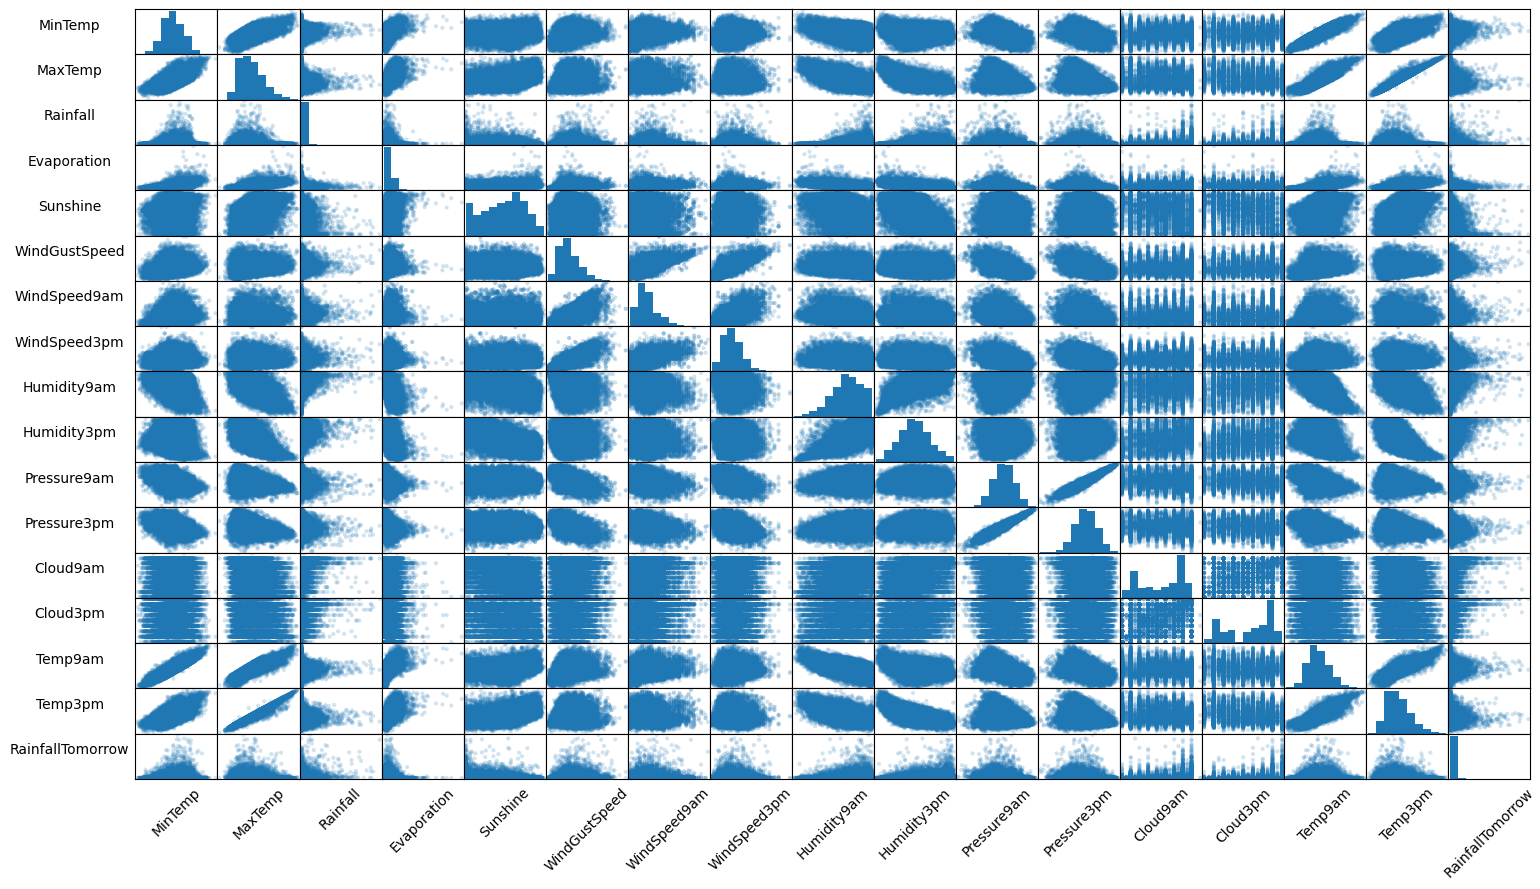

In [47]:
from pandas.plotting import scatter_matrix
atributos = num_var
sm = scatter_matrix(X_train[atributos], alpha=0.2, figsize=(18, 10))

#Cambiar la rotacion de las etiquetas en los ejes
[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

[s.get_yaxis().set_label_coords(-0.8,0.5) for s in sm.reshape(-1)]
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

plt.show()

Las correlaciones mas fuertes que se visualizan son en las tempetaturas entre si y ambas presiones.

*Visualizamos la distribucion de las variables numericas*

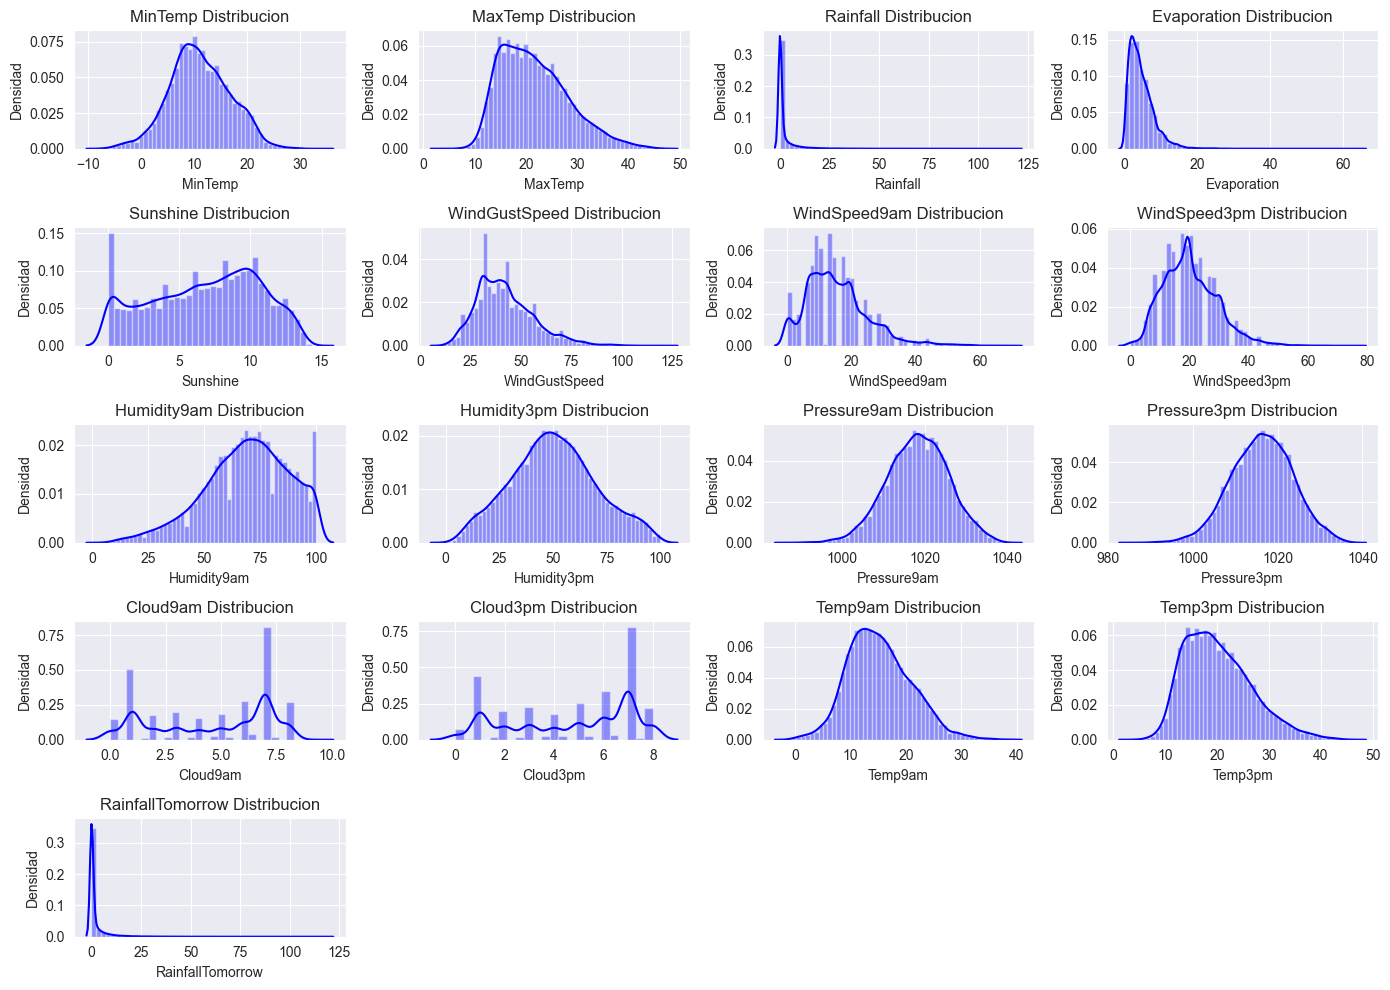

In [48]:
sns.set_style('darkgrid')
plt.figure(figsize=(14,10))
for index, variable in enumerate(num_var):
    plt.subplot(5,4,index+1)
    sns.distplot(X_train[variable],kde=True, color='b')
    plt.xlabel(variable)
    plt.ylabel('Densidad')
    plt.title(f"{variable} Distribucion")

plt.tight_layout()

Observamos que hay muchas variables cuyas distribuciones estan sesgadas a la derecha (en mayor o menor grado) como 'Rainfall', 'Evaporation', 'RainFallTomorrow', etc.

Tambien vemos que entre los pares: 'MinTemp' y 'Temp9am', 'MaxTemp' y 'Temp3pm', 'Pressure9am' y 'Pressure3pm', las distribuciones son bastantes parecidas (mas alla de lo valores individuales).

Otras variables, como 'Humidity9am', 'Pressure9am' y ambas 'Cloud...',  presentan sesgo hacia la izquierda.

Por otro lado, la variable 'Rainfall' presenta muchos valores iguales a 0.


# Asimetria de los datos utilizando el metodo Skew de Pandas

Interpretación:

*   asimetría = 0: Distribución simétrica

*   asimetría > 0: Distribución asimétrica a la derecha

*   asimetría < 0: Distribución asimétrica a la izquierda

In [49]:
# skew = df_X_train.drop(columns= 'Date').skew()
skew = X_train[num_var].skew()
print(skew)

MinTemp             0.059482
MaxTemp             0.676834
Rainfall            6.987880
Evaporation         2.376776
Sunshine           -0.213947
WindGustSpeed       0.834009
WindSpeed9am        0.994850
WindSpeed3pm        0.625033
Humidity9am        -0.468083
Humidity3pm         0.118216
Pressure9am        -0.136567
Pressure3pm        -0.125273
Cloud9am           -0.348326
Cloud3pm           -0.391041
Temp9am             0.385007
Temp3pm             0.665391
RainfallTomorrow    6.990179
dtype: float64


Comprobamos que el resultado numerico de la asimetria que nos brinda Skew coincide con lo observado en los histogramas.

# Visualizamos la distribucion de las variables categoricas

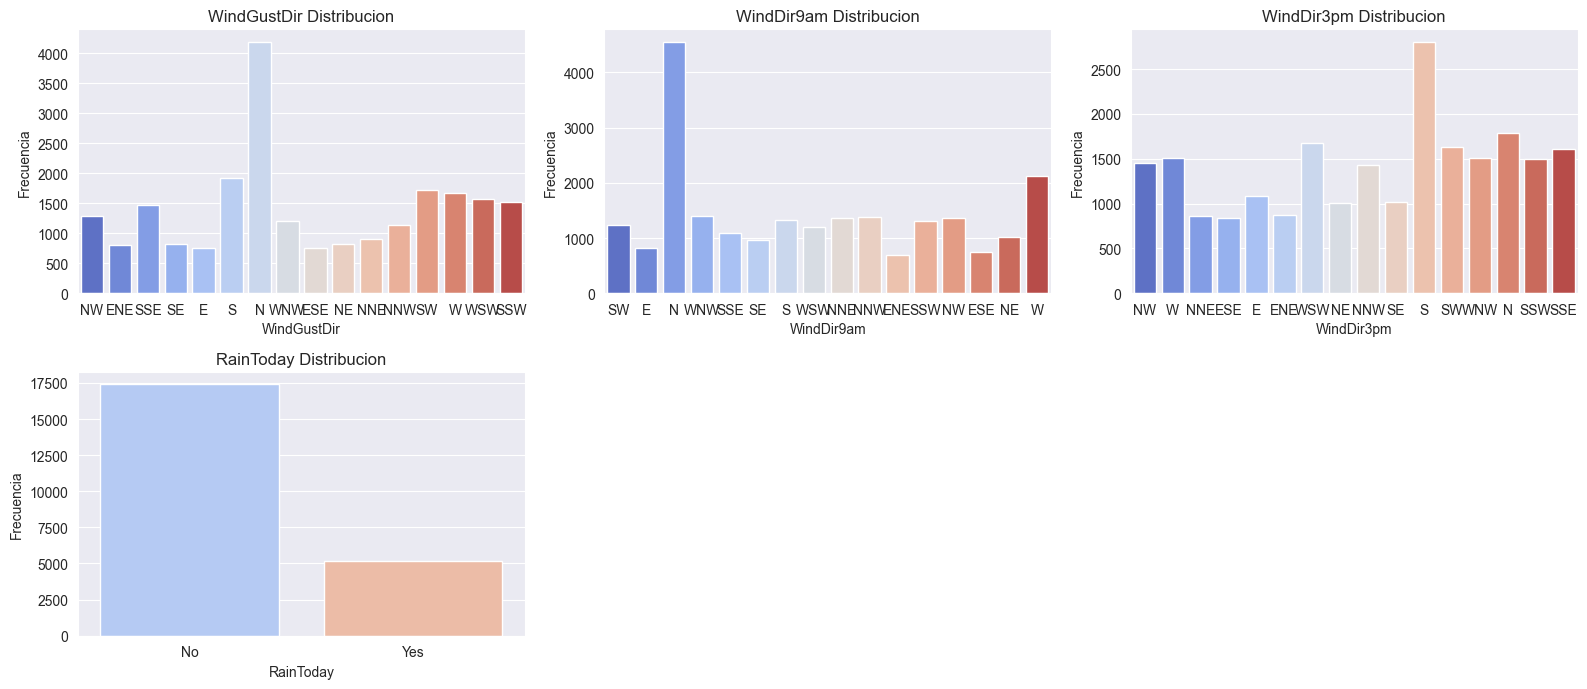

In [50]:
sns.set_style('darkgrid')
plt.figure(figsize=(16,7))
for index, variable in enumerate(cat_var):
    plt.subplot(2,3,index+1)
    sns.countplot(x=variable,data=X_train,palette='coolwarm')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    plt.title(f"{variable} Distribucion")

plt.tight_layout()

La moda en las variables 'WindGustDir' y 'WindDir9am' es la direccion N(norte), en 'WindDir3pm' es la direccion S(sur) y que de la variable 'RainToday' podemos decir que la proporcion de dias en que no llovio es mucho mayor de los que si.

### Codificar los valores de las variables

In [51]:
X_train[cat_var]

WindGustDir WindDir9am WindDir3pm RainToday
45573           NW         SW         NW        No
45574          ENE          E          W       Yes
45575           NW          N        NNE       Yes
45576           NW        WNW          W       Yes
45577          SSE        SSE        ESE       Yes
...            ...        ...        ...       ...
35890          NNE         NW         NE        No
98853           SW         SW         SW        No
8427           NNW        NNE         NW        No
101892           W        WNW        WSW        No
48380          NNW        ENE        WNW        No

[22586 rows x 4 columns]

In [52]:
categorico = X_train.select_dtypes(include = "object").columns
for i in range(len(categorico)):
    X_train[categorico[i]] = LabelEncoder().fit_transform(X_train[categorico[i]])

In [53]:
# VEMOS COMO QUEDARON CODIFICADAS LAS VARIABLES CATEGORICAS
X_train[cat_var]

WindGustDir  WindDir9am  WindDir3pm  RainToday
45573             7          12           7          0
45574             1           0          13          1
45575             7           3           5          1
45576             7          14          13          1
45577            10          10           2          1
...             ...         ...         ...        ...
35890             5           7           4          0
98853            12          12          12          0
8427              6           5           7          0
101892           13          14          15          0
48380             6           1          14          0

[22586 rows x 4 columns]

## Verificamos la presencia de valores atipicos

Realizamos un gráfico Boxplot para visualizar la distribución de los valores de las variables.

Debido a los valores numericos mas altos de las 2 variables "Pressure" respecto del resto, se grafican aparte, para visualizar mejor el grafico del resto.

In [54]:
columnas = [col for col in X_train.columns if ((col != 'Pressure9am') & (col != 'Pressure3pm'))]

In [55]:
columnas

['Date',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainfallTomorrow']

<Axes: >

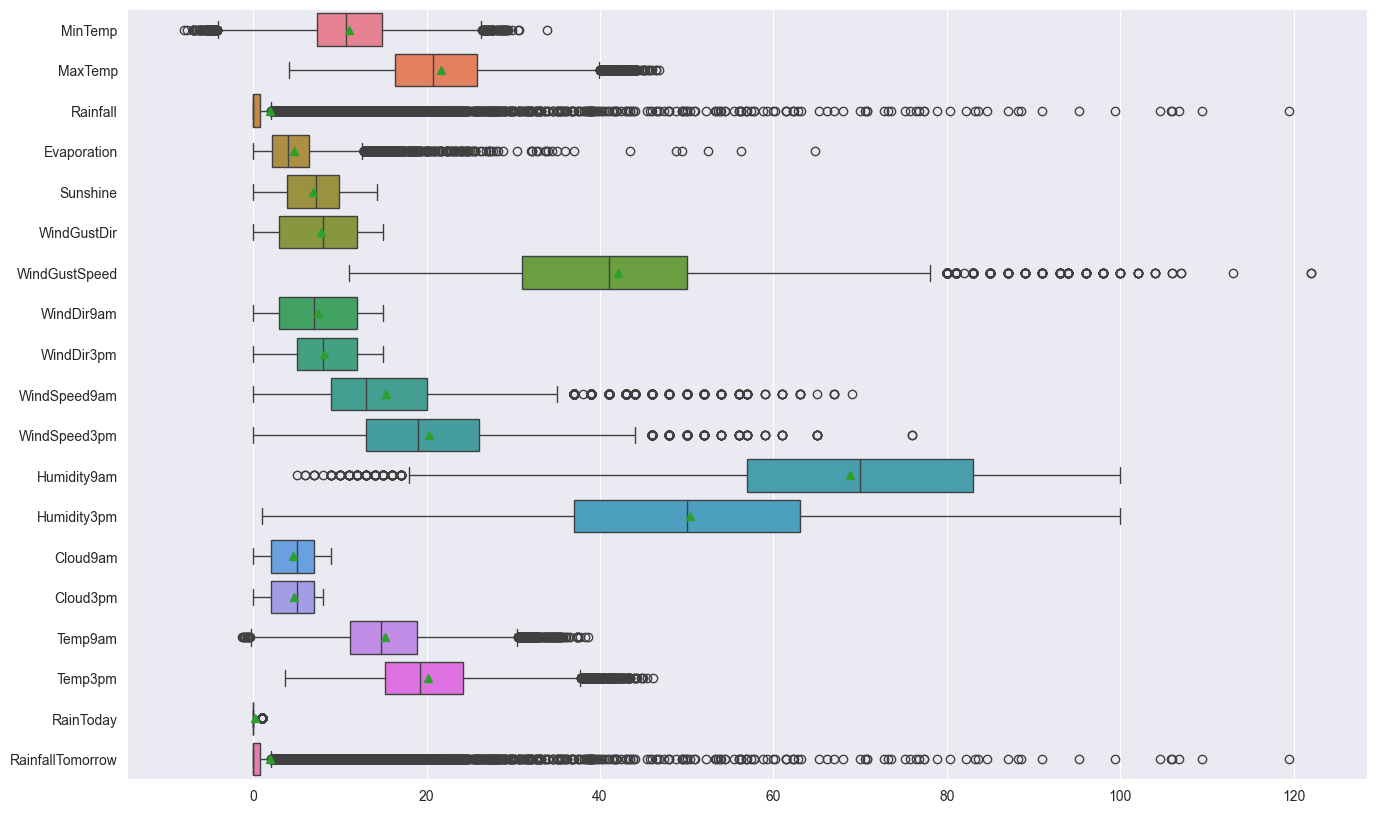

In [56]:
plt.figure(figsize= (16,10))
sns.boxplot(X_train[columnas], orient= 'h', showmeans= True)

<Axes: >

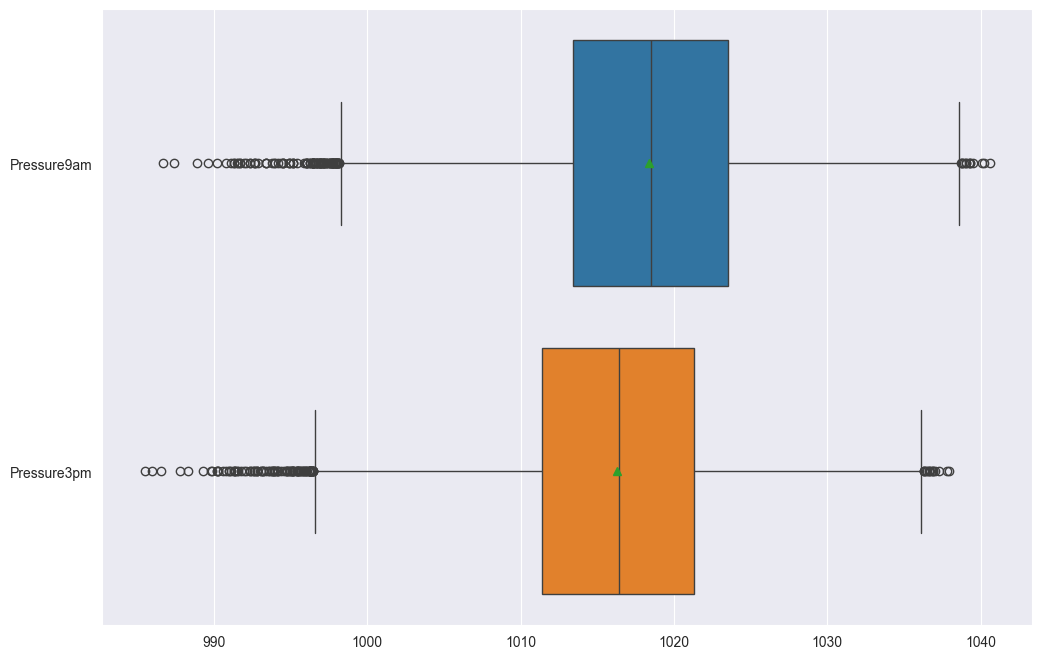

In [57]:
plt.figure(figsize= (12,8))
sns.boxplot(X_train[['Pressure9am', 'Pressure3pm']], orient= 'h', showmeans= True)


Podemos observar en varias variables la presencia de valores atipicos (outliers). Vamos a analizarlos con cuidado antes de tomar una decision.

Se destacan las variables correspondientes a la nubosidad donde los datos estan bastante centrados y las medias y medianas son casi iguales

### Variable "Rainfall"



In [58]:
## VARIABLE "Rainfall"
X_train['Rainfall'].describe()

count    22586.000000
mean         1.972839
std          6.206100
min          0.000000
25%          0.000000
50%          0.000000
75%          0.800000
max        119.400000
Name: Rainfall, dtype: float64

In [59]:
# AVERIGUAMOS LOS LIMITES SUPERIOR E INFERIOR DE OUTLIERS
RIC= X_train['Rainfall'].quantile(0.75) - X_train['Rainfall'].quantile(0.25)
lim_sup_outliers= X_train['Rainfall'].quantile(0.75) + RIC * 1.5
lim_inf_outliers= X_train['Rainfall'].quantile(0.25) - RIC * 1.5
lim_sup_outliers, lim_inf_outliers

(2.0, -1.2000000000000002)

In [60]:
# VEMOS QUE CANTIDAD DE VALORES SUPERAN LOS LIMITES DE OUTLIERS
X_train[X_train['Rainfall'] > lim_sup_outliers].Rainfall.count()



4110

In [61]:
X_train[X_train['Rainfall'] < lim_inf_outliers].Rainfall.count()

0

De lo analizado, existen varios valores de la variable **"Rainfall"** que estan por arriba del limite superior para considerarse atipicos. El valor maximo de la variable es igual a 119.40 mm, el cual es un valor logico y probable para una precipitacion.
**Por lo que concluimos que no seran eliminados del dataset.**

### Variable "RainfallTomorrow"


In [62]:
## VARIABLE "RainfallTomorrow"
X_train['RainfallTomorrow'].describe()

count    22586.000000
mean         1.971662
std          6.205446
min          0.000000
25%          0.000000
50%          0.000000
75%          0.800000
max        119.400000
Name: RainfallTomorrow, dtype: float64

In [63]:
# AVERIGUAMOS LOS LIMITES SUPERIOR E INFERIOR DE OUTLIERS
RIC= X_train['RainfallTomorrow'].quantile(0.75) - X_train['RainfallTomorrow'].quantile(0.25)
lim_sup_outliers= X_train['RainfallTomorrow'].quantile(0.75) + RIC * 1.5
lim_inf_outliers= X_train['RainfallTomorrow'].quantile(0.25) - RIC * 1.5
lim_sup_outliers, lim_inf_outliers

(2.0, -1.2000000000000002)

In [64]:
# VEMOS QUE CANTIDAD DE VALORES SUPERAN LOS LIMITES DE OUTLIERS
X_train[X_train['RainfallTomorrow'] > lim_sup_outliers].Rainfall.count()



4107

In [65]:
X_train[X_train['RainfallTomorrow'] < lim_inf_outliers].Rainfall.count()

0

De lo analizado, existen varios valores de la variable **"RainfallTomorrow"** que estan por arriba del limite superior para considerarse atipicos. El valor maximo de la variable es igual a 119.40 mm, el cual es un valor logico y probable para una precipitacion.

**Por lo que concluimos que no seran eliminados del dataset.**

### Variable "Evaporation"



In [66]:
## VARIABLE "Evaporation"
X_train['Evaporation'].describe()

count    22586.000000
mean         4.646934
std          3.531843
min          0.000000
25%          2.200000
50%          4.000000
75%          6.400000
max         64.800000
Name: Evaporation, dtype: float64

In [67]:
# AVERIGUAMOS LOS LIMITES SUPERIOR E INFERIOR DE OUTLIERS
RIC= X_train['Evaporation'].quantile(0.75) - X_train['Evaporation'].quantile(0.25)
lim_sup_outliers= X_train['Evaporation'].quantile(0.75) + RIC * 1.5
lim_inf_outliers= X_train['Evaporation'].quantile(0.25) - RIC * 1.5
lim_sup_outliers, lim_inf_outliers

(12.700000000000001, -4.1000000000000005)

In [68]:
# VEMOS QUE CANTIDAD DE VALORES SUPERAN LOS LIMITES DE OUTLIERS
X_train[X_train['Evaporation'] > lim_sup_outliers].Rainfall.count()



660

In [69]:
X_train[X_train['Evaporation'] < lim_inf_outliers].Rainfall.count()

0

De lo analizado, existen varios valores de la variable **"Evaporation"** que estan por arriba del limite superior para considerarse atipicos. El valor maximo de la variable es igual a 64.80 mm, que es un valor logico y probable para la evaporacion.

**Por lo que concluimos que no seran eliminados del dataset.**

### Variable "Pressure3pm"



In [70]:
## VARIABLE "Evaporation"
X_train['Pressure3pm'].describe()

count    22586.000000
mean      1016.283901
std          7.236294
min        985.500000
25%       1011.400000
50%       1016.400000
75%       1021.300000
max       1037.900000
Name: Pressure3pm, dtype: float64

In [71]:
# AVERIGUAMOS LOS LIMITES SUPERIOR E INFERIOR DE OUTLIERS
RIC= X_train['Pressure3pm'].quantile(0.75) - X_train['Pressure3pm'].quantile(0.25)
lim_sup_outliers= X_train['Pressure3pm'].quantile(0.75) + RIC * 1.5
lim_inf_outliers= X_train['Pressure3pm'].quantile(0.25) - RIC * 1.5
lim_sup_outliers, lim_inf_outliers

(1036.1499999999999, 996.55)

In [72]:
# VEMOS QUE CANTIDAD DE VALORES SUPERAN LOS LIMITES DE OUTLIERS
X_train[X_train['Pressure3pm'] > lim_sup_outliers].Rainfall.count()



15

In [73]:
X_train[X_train['Pressure3pm'] < lim_inf_outliers].Rainfall.count()

106

De lo analizado, existen algunos valores de la variable **"Pressure3pm"** que estan por arriba del limite superior y por debajo del inferior para considerarse atipicos. El valor maximo de la variable es igual a 1037.90 hpa y el minimo 985.50 hpa, los cuales son valores logicos y probables para la presion atmosferica.

**Por lo que concluimos que no seran eliminados del dataset.**

### Variable "Pressure9am"



In [74]:
## VARIABLE "Evaporation"
X_train['Pressure9am'].describe()

count    22586.000000
mean      1018.384548
std          7.383838
min        986.700000
25%       1013.400000
50%       1018.500000
75%       1023.500000
max       1040.600000
Name: Pressure9am, dtype: float64

In [75]:
# AVERIGUAMOS LOS LIMITES SUPERIOR E INFERIOR DE OUTLIERS
RIC= X_train['Pressure9am'].quantile(0.75) - X_train['Pressure9am'].quantile(0.25)
lim_sup_outliers= X_train['Pressure9am'].quantile(0.75) + RIC * 1.5
lim_inf_outliers= X_train['Pressure9am'].quantile(0.25) - RIC * 1.5
lim_sup_outliers, lim_inf_outliers

(1038.65, 998.25)

In [76]:
# VEMOS QUE CANTIDAD DE VALORES SUPERAN LOS LIMITES DE OUTLIERS
X_train[X_train['Pressure9am'] > lim_sup_outliers].Rainfall.count()



13

In [77]:
X_train[X_train['Pressure9am'] < lim_inf_outliers].Rainfall.count()

116

De lo analizado, existen algunos valores de la variable **"Pressure9am"** que estan por arriba del limite superior y por debajo del inferior para considerarse atipicos. El valor maximo de la variable es igual a 1040.60 hpa y el minimo 986.70 hpa, los cuales son valores logicos y probables para la presion atmosferica.

**Por lo que concluimos que no seran eliminados del dataset.**

### Variable "Humidity9am"

In [78]:
## VARIABLE "Evaporation"
X_train['Humidity9am'].describe()

count    22586.000000
mean        68.831821
std         18.658093
min          5.000000
25%         57.000000
50%         70.000000
75%         83.000000
max        100.000000
Name: Humidity9am, dtype: float64

In [79]:
# AVERIGUAMOS LOS LIMITES SUPERIOR E INFERIOR DE OUTLIERS
RIC= X_train['Humidity9am'].quantile(0.75) - X_train['Humidity9am'].quantile(0.25)
lim_sup_outliers= X_train['Humidity9am'].quantile(0.75) + RIC * 1.5
lim_inf_outliers= X_train['Humidity9am'].quantile(0.25) - RIC * 1.5
lim_sup_outliers, lim_inf_outliers

(122.0, 18.0)

In [80]:
# VEMOS QUE CANTIDAD DE VALORES SUPERAN LOS LIMITES DE OUTLIERS
X_train[X_train['Humidity9am'] > lim_sup_outliers].Rainfall.count()



0

In [81]:
X_train[X_train['Humidity9am'] < lim_inf_outliers].Rainfall.count()

165

De lo analizado, no existen valores de la variable **"Humidity9am"** que esten por arriba del limite superior y hay valores por debajo del inferior para considerarse atipicos. El valor maximo de la variable es igual a 100 % y el minimo 5% , los cuales son valores logicos y probables para la humedad .

**Por lo que concluimos que no seran eliminados del dataset.**

### Variable "WindGustSpeed"

In [82]:
## VARIABLE "Evaporation"
X_train['WindGustSpeed'].describe()

count    22586.000000
mean        42.125985
std         14.130791
min         11.000000
25%         31.000000
50%         41.000000
75%         50.000000
max        122.000000
Name: WindGustSpeed, dtype: float64

In [83]:
# AVERIGUAMOS LOS LIMITES SUPERIOR E INFERIOR DE OUTLIERS
RIC= X_train['WindGustSpeed'].quantile(0.75) - X_train['WindGustSpeed'].quantile(0.25)
lim_sup_outliers= X_train['WindGustSpeed'].quantile(0.75) + RIC * 1.5
lim_inf_outliers= X_train['WindGustSpeed'].quantile(0.25) - RIC * 1.5
lim_sup_outliers, lim_inf_outliers

(78.5, 2.5)

In [84]:
# VEMOS QUE CANTIDAD DE VALORES SUPERAN LOS LIMITES DE OUTLIERS
X_train[X_train['WindGustSpeed'] > lim_sup_outliers].Rainfall.count()



396

In [85]:
X_train[X_train['WindGustSpeed'] < lim_inf_outliers].Rainfall.count()

0

De lo analizado, existen varios valores de la variable **"WindGustSpeed"** que estan por arriba del limite superior para considerarse atipicos. El valor maximo de la variable es igual a 122 km/h, el cual es un valor logico y probable para la humedad .

**Por lo que concluimos que no seran eliminados del dataset.**

### Variables de Temperatura

In [86]:
print(f"Temp. minima:   {X_train['MinTemp'].min()} / {X_train['MinTemp'].max()}")
print(f"Temp. maxima:   {X_train['MaxTemp'].min()} / {X_train['MaxTemp'].max()}")
print(f"Temp. 9am:   {X_train['Temp9am'].min()} / {X_train['Temp9am'].max()}")
print(f"Temp. 3pm:   {X_train['Temp3pm'].min()} / {X_train['Temp3pm'].max()}")

Temp. minima:   -8.0 / 33.9
Temp. maxima:   4.1 / 46.8
Temp. 9am:   -1.3 / 38.6
Temp. 3pm:   3.7 / 46.1


De la misma manera que se analizaron las otras variables, veriamos que los valores maximos y minimos de las variables de temperaturas son normales y probables.

**Por lo que concluimos que no seran eliminados del dataset.**

*Eliminamos la variable 'Date' pues ya no la consideramos para el modelo*

In [87]:
# ELIMINAMOS LA COLUMNA "Date" PORQUE YA NO LA UTILIZAMOS PARA NUESTRO MODELO,
# PUES LAS TRANSFORMACIONES DE LOS DATOS USANDO LAS FECHAS DE LOS DATOS YA FUERON REALIZADAS

In [88]:
X_train.drop(columns='Date', inplace=True)

### Matriz de Correlacion

In [89]:
corr = X_train.corr(numeric_only=True)
corr

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp           1.000000  0.705776  0.056726     0.574780  0.104806   
MaxTemp           0.705776  1.000000 -0.131258     0.635552  0.462953   
Rainfall          0.056726 -0.131258  1.000000    -0.093472 -0.196182   
Evaporation       0.574780  0.635552 -0.093472     1.000000  0.311563   
Sunshine          0.104806  0.462953 -0.196182     0.311563  1.000000   
WindGustDir      -0.084118 -0.163671  0.060347    -0.049251 -0.042311   
WindGustSpeed     0.219958  0.108947  0.119834     0.238721  0.006515   
WindDir9am        0.008372 -0.190847  0.099763    -0.042446 -0.014097   
WindDir3pm       -0.109159 -0.137673  0.061738    -0.022628 -0.039504   
WindSpeed9am      0.158421 -0.019002  0.101389     0.149097 -0.033733   
WindSpeed3pm      0.130261  0.014851  0.080708     0.138603  0.054396   
Humidity9am      -0.327113 -0.520398  0.243991    -0.516635 -0.397050   
Humidity3pm      -0.104375 -0.576809  0.267707    -0.394947 -0.575011   
Pressure9am      -0.412683 -0.297100 -0.157015    -0.322466  0.012984   
Pressure3pm      -0.396870 -0.372720 -0.099972    -0.322274 -0.026944   
Cloud9am          0.088000 -0.205171  0.176785    -0.131079 -0.487930   
Cloud3pm          0.024013 -0.230460  0.152288    -0.138166 -0.536394   
Temp9am           0.893008  0.876411 -0.043684     0.649187  0.285178   
Temp3pm           0.680995  0.982646 -0.136481     0.610181  0.476821   
RainToday         0.007224 -0.266184  0.551276    -0.201146 -0.259542   
RainfallTomorrow  0.087491 -0.083058  0.254497    -0.044576 -0.283728   

                  WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  \
MinTemp             -0.084118       0.219958    0.008372   -0.109159   
MaxTemp             -0.163671       0.108947   -0.190847   -0.137673   
Rainfall             0.060347       0.119834    0.099763    0.061738   
Evaporation         -0.049251       0.238721   -0.042446   -0.022628   
Sunshine            -0.042311       0.006515   -0.014097   -0.039504   
WindGustDir          1.000000       0.060533    0.359269    0.561472   
WindGustSpeed        0.060533       1.000000    0.025367    0.043539   
WindDir9am           0.359269       0.025367    1.000000    0.262956   
WindDir3pm           0.561472       0.043539    0.262956    1.000000   
WindSpeed9am        -0.004850       0.610094    0.060232   -0.014272   
WindSpeed3pm         0.084400       0.722527    0.091981    0.036479   
Humidity9am          0.019661      -0.228746    0.051676   -0.011441   
Humidity3pm          0.049540      -0.037813    0.116460   -0.013674   
Pressure9am         -0.124322      -0.510626   -0.021166   -0.147200   
Pressure3pm         -0.027554      -0.480788    0.072139   -0.040363   
Cloud9am             0.036104       0.035595    0.028516    0.021912   
Cloud3pm             0.033695       0.092249   -0.004636    0.027081   
Temp9am             -0.117257       0.217516   -0.093397   -0.117346   
Temp3pm             -0.179743       0.065436   -0.197089   -0.150941   
RainToday            0.139535       0.122110    0.159372    0.127011   
RainfallTomorrow    -0.023389       0.168295   -0.014436   -0.030404   

                  WindSpeed9am  ...  Humidity9am  Humidity3pm  Pressure9am  \
MinTemp               0.158421  ...    -0.327113    -0.104375    -0.412683   
MaxTemp              -0.019002  ...    -0.520398    -0.576809    -0.297100   
Rainfall              0.101389  ...     0.243991     0.267707    -0.157015   
Evaporation           0.149097  ...    -0.516635    -0.394947    -0.322466   
Sunshine             -0.033733  ...    -0.397050    -0.575011     0.012984   
WindGustDir          -0.004850  ...     0.019661     0.049540    -0.124322   
WindGustSpeed         0.610094  ...    -0.228746    -0.037813    -0.510626   
WindDir9am            0.060232  ...     0.051676     0.116460    -0.021166   
WindDir3pm           -0.014272  ...    -0.011441    -0.013674    -0.147200   
WindSpeed9am          1.000000  ...    -0.26370

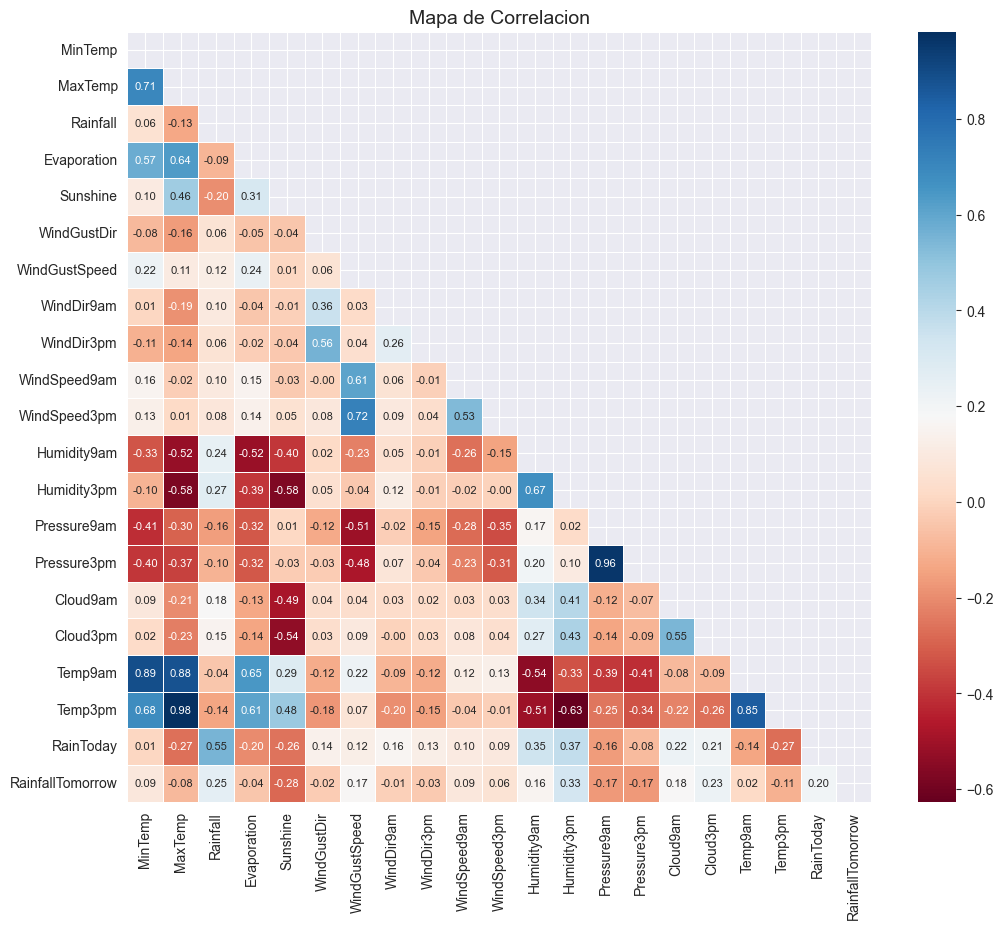

In [90]:
fig, ax = plt.subplots(figsize=(12,10))
plt.title("Mapa de Correlacion", fontsize=14)
mask = np.triu(np.ones_like(corr, dtype=bool)) # MASCARA PARA GRAFICAR SOLO UN TRIANGULO DE LA MATRIZ DE CORRELACION
# Genera el heatmap incluyendo la mascara mask
heatmap = sns.heatmap(corr,
                      annot=True,
                      annot_kws={"fontsize": 8},
                      fmt='.2f',
                      linewidths=0.5,
                      cmap='RdBu',
                      mask=mask, # la mascara ha sido incluida aqui
                      ax=ax)

plt.show()

Las variables que presentan las correlaciones mas altas con 'RainfallTomorrow':



*   Humidity3pm: + 0.33
*   Rainfall: + 0.25
*   Sunshine: - 0.28
*   Cloud3pm; + 0.23
*   RainToday: + 0.20

Las variables que miden la misma magnitud fisica y que presentan las correlaciones mas altas son:

*   MaxTemp - Temp3pm: + 0.98
*   Pressure9am - Pressure3pm: + 0.96
*   MinTemp - Temp9pm: + 0.89
*   Humidity9am - Humidity3pm: + 0.67




*De lo observado en las graficas de las variables y de la matriz de correlacion entre las mismas, teniendo en cuenta la similitud entre pares de variables de temperatura por un lado, presiones por otro, nubosidad y tambien humedad, vamos a resumirlas en una sola variable de acuerdo a cada magnitud meteorologica medida.*


In [91]:
col_a_eliminar= ['Temp9am', 'Temp3pm', 'Pressure9am', 'Pressure3pm', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm']
X_train['Temperature']= X_train['Temp3pm'] - X_train['Temp9am']
X_train['Pressure']= X_train['Pressure3pm'] - X_train['Pressure9am']
X_train['Humidity']= X_train['Humidity3pm'] - X_train['Humidity9am']
X_train['Cloud']= X_train['Cloud3pm'] - X_train['Cloud9am']
# Elininamos las variables resumidas
X_train.drop(columns= col_a_eliminar, inplace= True)


### **MODELOS**

*A continuación, experimentaremos con modelos de regresión lineal estándar y modelos regularizados con Ridge, Lasso y ElasticNet.*

In [92]:
y_train= X_train['RainfallTomorrow']
X_train.drop(columns= ['RainfallTomorrow'], inplace= True)

In [93]:
X_train.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
RainToday        0
Temperature      0
Pressure         0
Humidity         0
Cloud            0
dtype: int64

*Al conjunto de datos de testeo, X_test, lo transformamos de la misma forma que lo hicimos con el de entrenamiento, X_train, pero las imputaciones de datos faltantes las realizamos con los indicadores estadisticos (mediana, moda) del set de entrenamiento y no con los del test.*

In [94]:
X_test['RainfallTomorrow'] = y_test

In [95]:
X_test.columns

Index(['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainfallTomorrow'],
      dtype='object')

In [96]:
## Obtener los nombres de las variables numericas y categoricas
num_var = [variable for variable in X_test.columns if X_test[variable].dtypes == ('int64' and 'float64') ]
cat_var = [variable for variable in X_test.columns if X_test[variable].dtypes == ('O')]

In [97]:
X_test.RainToday.values

array(['No', nan, 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [98]:
# Imputamos los valores nulos numericos
for col in num_var:
  cambiar_mediana_test(X_test, col)

In [99]:
# Imputamos los valores nulos categoricos
for col in cat_var:
  cambiar_moda_test(X_test, col)

In [100]:
# Verificamos que X_test no tenga nulos
X_test.isnull().sum()

Date                0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
RainfallTomorrow    0
dtype: int64

In [101]:
# Codificamos las variables categoricas con valores numericos
categorico = X_test.select_dtypes(include = "object").columns
for col in categorico:
    X_test[col] = X_test[col].astype(str)
for i in range(len(categorico)):
    X_test[categorico[i]] = LabelEncoder().fit_transform(X_test[categorico[i]])

In [102]:
X_test[cat_var]

WindGustDir  WindDir9am  WindDir3pm  RainToday
32882             5          14           1          0
69743             7           3          14          0
66551             7           3          14          0
83352            14          14          15          0
83353             9           9          10          0
...             ...         ...         ...        ...
49007             7           3           7          0
83979            13           7          14          1
9054             15          13          11          0
99480            13           3          12          0
102519           13           6          13          1

[5647 rows x 4 columns]

In [103]:
X_test.drop(columns='Date', inplace=True)

In [104]:
# Resumimos variables
col_a_eliminar= ['Temp9am', 'Temp3pm', 'Pressure9am', 'Pressure3pm', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm']
X_test['Temperature']= X_test['Temp3pm'] - X_test['Temp9am']
X_test['Pressure']= X_test['Pressure3pm'] - X_test['Pressure9am']
X_test['Humidity']= X_test['Humidity3pm'] - X_test['Humidity9am']
X_test['Cloud']= X_test['Cloud3pm'] - X_test['Cloud9am']
# Elininamos las variables resumidas
X_test.drop(columns= col_a_eliminar, inplace= True)


In [105]:
y_test= X_test['RainfallTomorrow']
X_test.drop(columns= ['RainfallTomorrow'], inplace= True)

# Regresion Lineal

In [106]:
# Creación y entrenamiento del modelo
# La idea es estandarizar los datos para tener todo en la misma escala. Esto presenta muchas ventajas a la hora de regularizar.
# lo que hacemos es una "tubería": vamos a escalar los datos y luego hacer una regresión lineal. Cuando fiteemos esta tubería, el fit se va a hacer tanto en el scaler como en la regresión lineal.
# a la hora de predecir datos, está bueno porque solo vamos a usar el método predict de la tubería y eso automáticamente va a usar el transform del scaler y el predict de la regresión lineal
# ahorra muchos pasos, estandariza los procesos.

model = make_pipeline(StandardScaler(), LinearRegression())

In [107]:
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [108]:
model.steps[0]

('standardscaler', StandardScaler())

In [109]:
model.steps[1][1].n_features_in_

16

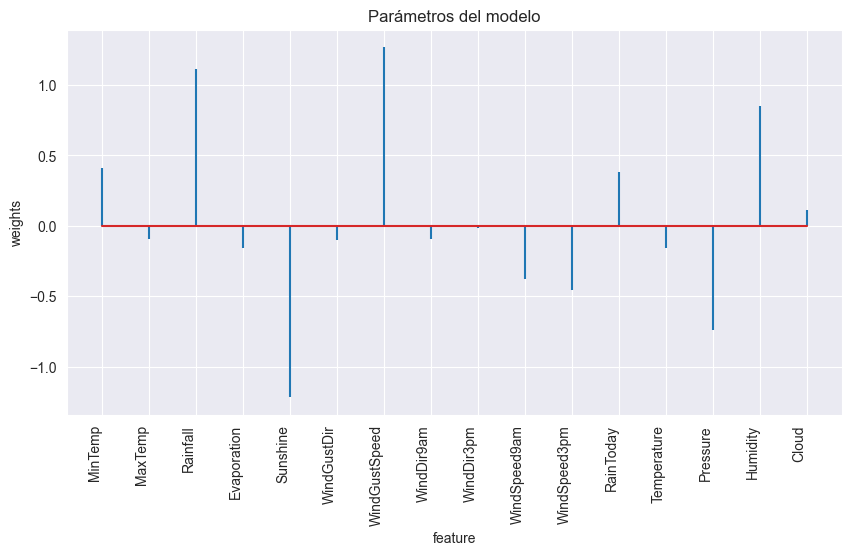

In [110]:
# Coeficientes del modelo

df_coeficientes = pd.DataFrame({'predictor': X_train.columns, 'coef': model.steps[1][1].coef_.flatten()})

fig, ax = plt.subplots(figsize=(10, 5))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('weights')
ax.set_title('Parámetros del modelo')
plt.show()

### Realizar predicciones sobre conjuntos de train y test

Medir métricas en ambos conjuntos nos ayuda a comprender cómo nuestro modelo se comporta en datos no vistos y a garantizar que esté generalizando correctamente.
Si el accuracy en Test es similar al del conjunto de entrenamiento, nuestro modelo generaliza bien.
Si hay una gran diferencia entre las métricas de entrenamiento y prueba, debemos ajustar el modelo (tunear parámetros, obtener más datos, etc.)

In [111]:
# Predicciones
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

y_pred_train.shape, y_pred_test.shape

((22586,), (5647,))

### Calcular metricas sobre el conjunto de train

In [112]:
rmse_train = mean_squared_error(y_train, y_pred_train, squared = False) # Se usa el rmse para mantener la misma escala que la variable a predecir
R2_train = metrics.r2_score(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)


### Calcular metricas sobre el conjunto de test

In [113]:
rmse_test = mean_squared_error(y_test, y_pred_test, squared = False) # Se usa el rmse para mantener la misma escala que la variable a predeci
R2_test = metrics.r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)


### Visualizamos las metricas

In [114]:
print('Metricas sobre el conjunto de train')
print(' Error cuadratico medio (MSE) Train: ', rmse_train)
print(' R cuadrado (R2) Train: ', R2_train)
print(' Error absoluto medio (MAE) Train: ', mae_train)

print('\nMetricas sobre el conjunto de test')
print(' Error cuadratico medio (MSE) Test: ', rmse_test)
print(' R cuadrado (R2) Test: ', R2_test)
print(' Error absoluto medio (MAE) Test: ', mae_test)

Metricas sobre el conjunto de train
 Error cuadratico medio (MSE) Train:  5.608558849983166
 R cuadrado (R2) Train:  0.18308691109956232
 Error absoluto medio (MAE) Train:  2.6388541672493133

Metricas sobre el conjunto de test
 Error cuadratico medio (MSE) Test:  5.852900827843206
 R cuadrado (R2) Test:  0.20977998377741958
 Error absoluto medio (MAE) Test:  2.6854137976157246


Para este modelo podemos obervar que el MSE, R2 y MAE en el conjunto de entrenamiento y prueba son bastante similares, lo que sugiere que el modelo no hace overfitting ni underfitting.
El valor de R2 en ambos conjuntos es relativamente bajo, lo que indica que el modelo puede no estar prediciendo tan bien.


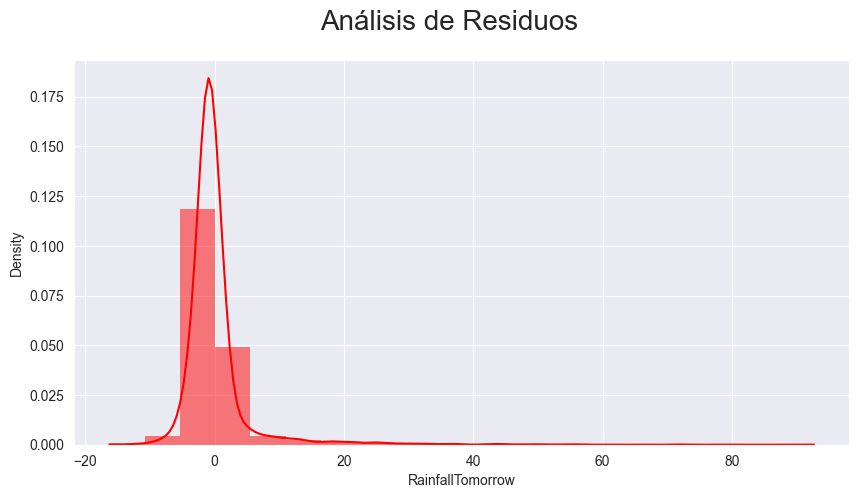

In [115]:
fig = plt.figure(figsize=(10,5))

sns.histplot((y_test - y_pred_test), color="red", kde=True, stat="density", linewidth=0,bins=20)
fig.suptitle('Análisis de Residuos', fontsize = 20)
plt.show()

Este gráfico nos deja ver que las predicciones tienden a ser mas bajas que los valores reales para estas observaciones, también puede indicar la existencia de valores atípicos.

De la grafica y el calculo del 3er. cuartil, vemos que el 75 % de los valores de los residuos es a los sumo  -0.21, con un valor maximo de 92 mm



In [116]:
(y_test-y_pred_test).quantile(0.75)


0.5924474489909008

## Gradiente Descendiente

In [117]:
sgd_model = make_pipeline(StandardScaler(), SGDRegressor())

In [118]:
sgd_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

### Realizar predicciones sobre conjuntos de train y test

In [119]:
# Predicciones
y_pred_train = sgd_model.predict(X_train)
y_pred_test = sgd_model.predict(X_test)

y_pred_train.shape, y_pred_test.shape

((22586,), (5647,))

### Calcular metricas sobre el conjunto de train

In [120]:
rmse_sgd_train = mean_squared_error(y_train, y_pred_train, squared = False) # Se usa el rmse para mantener la misma escala que la variable a predecir
R2_sgd_train = metrics.r2_score(y_train, y_pred_train)
mae_sgd_train = mean_absolute_error(y_train, y_pred_train)


### Calcular metricas sobre el conjunto de test

In [121]:
rmse_sgd_test = mean_squared_error(y_test, y_pred_test, squared = False) # Se usa el rmse para mantener la misma escala que la variable a predeci
R2_sgd_test = metrics.r2_score(y_test, y_pred_test)
mae_sgd_test = mean_absolute_error(y_test, y_pred_test)


### Visualizamos las metricas

In [122]:
print('Metricas sobre el conjunto de train')
print(' Error cuadratico medio (MSE) Train: ', rmse_sgd_train)
print(' R cuadrado (R2) Train: ', R2_train)
print(' Error absoluto medio (MAE) Train: ', mae_sgd_train)

print('\nMetricas sobre el conjunto de test')
print(' Error cuadratico medio (MSE) Test: ', rmse_sgd_test)
print(' R cuadrado (R2) Test: ', R2_test)
print(' Error absoluto medio (MAE) Test: ', mae_sgd_test)

Metricas sobre el conjunto de train
 Error cuadratico medio (MSE) Train:  5.615252272236413
 R cuadrado (R2) Train:  0.18308691109956232
 Error absoluto medio (MAE) Train:  2.655781627761433

Metricas sobre el conjunto de test
 Error cuadratico medio (MSE) Test:  5.8669096770712335
 R cuadrado (R2) Test:  0.20977998377741958
 Error absoluto medio (MAE) Test:  2.7089206926109313


El análisis es muy similar al modelo anterior.

## Ridge Regression

Los métodos de regularización achican los coeficientes menos significativos para
reducir la varianza y así intentar aproximar a un mejor modelo.

In [123]:
# Creación y entrenamiento del modelo. Scikit-Learn usa Cross Validation para encontrar el valor óptimo de alpha
# (lambda en los desarrollos de teoría). Puede ser problemático con series de tiempo.

modelo_ridge = make_pipeline(StandardScaler(),
                        RidgeCV(
                           alphas          = np.logspace(-10, 10, 200),
                           fit_intercept   = True,
                           store_cv_values = True
                        )
         )

_ = modelo_ridge.fit(X_train, y_train)

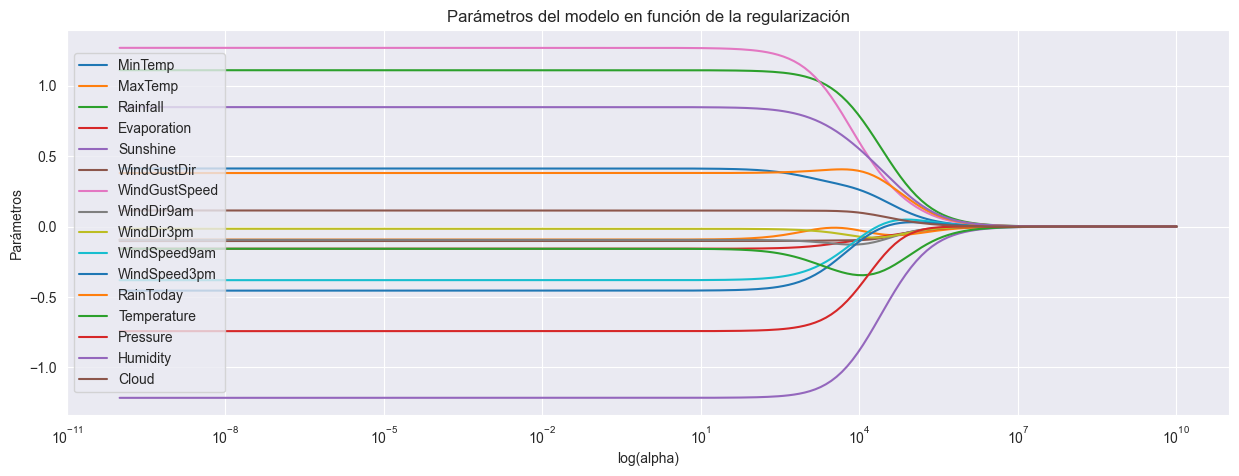

In [124]:
# Evolución de los parámetros en función de alpha

alphas = modelo_ridge.steps[1][1].alphas
coefs = []

for alpha in alphas:
    modelo_aux = make_pipeline(StandardScaler(), Ridge(alpha=alpha))
    modelo_aux.fit(X_train, y_train)
    coefs.append(modelo_aux.steps[1][1].coef_.flatten())

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(alphas, coefs, label=X_train.columns)
ax.set_xscale('log')
ax.set_xlabel('log(alpha)')
ax.set_ylabel('Parámetros')
ax.set_title('Parámetros del modelo en función de la regularización');
plt.axis('tight')
plt.legend()
plt.show()

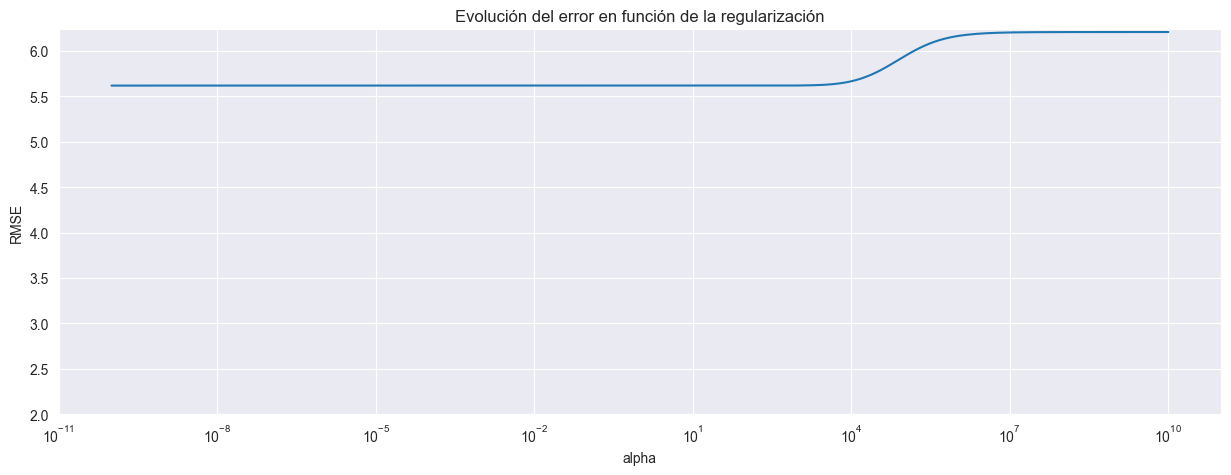

In [125]:
# Evolución del error de validación cruzada en función de alpha

# modelo.cv_values almacena el MSE de CV para cada valor de alpha.

mod = modelo_ridge.steps[1][1]

mse_cv = mod.cv_values_.reshape((-1, 200)).mean(axis=0)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)

# Se identifica el mejor
min_rmse     = np.min(rmse_cv)
optimo       = mod.alphas[np.argmin(rmse_cv)]

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(mod.alphas, rmse_cv)
ax.set_xscale('log')
ax.set_ylim([2,None])
ax.set_title('Evolución del error en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.show()

In [126]:
# Mejor valor alpha encontrado

print(f"Mejor valor de alpha encontrado: {mod.alpha_}")

Mejor valor de alpha encontrado: 182.51834943190462


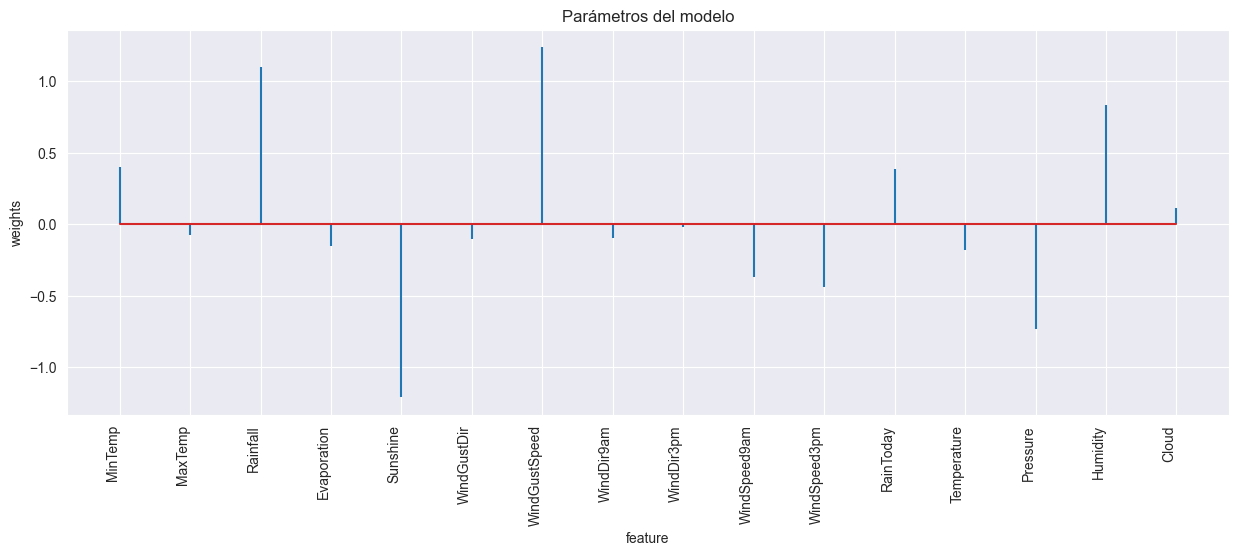

In [127]:
# Coeficientes del modelo

df_coeficientes = pd.DataFrame({'predictor': X_train.columns,'coef': mod.coef_.flatten()})

fig, ax = plt.subplots(figsize=(15,5))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('weights')
ax.set_title('Parámetros del modelo');

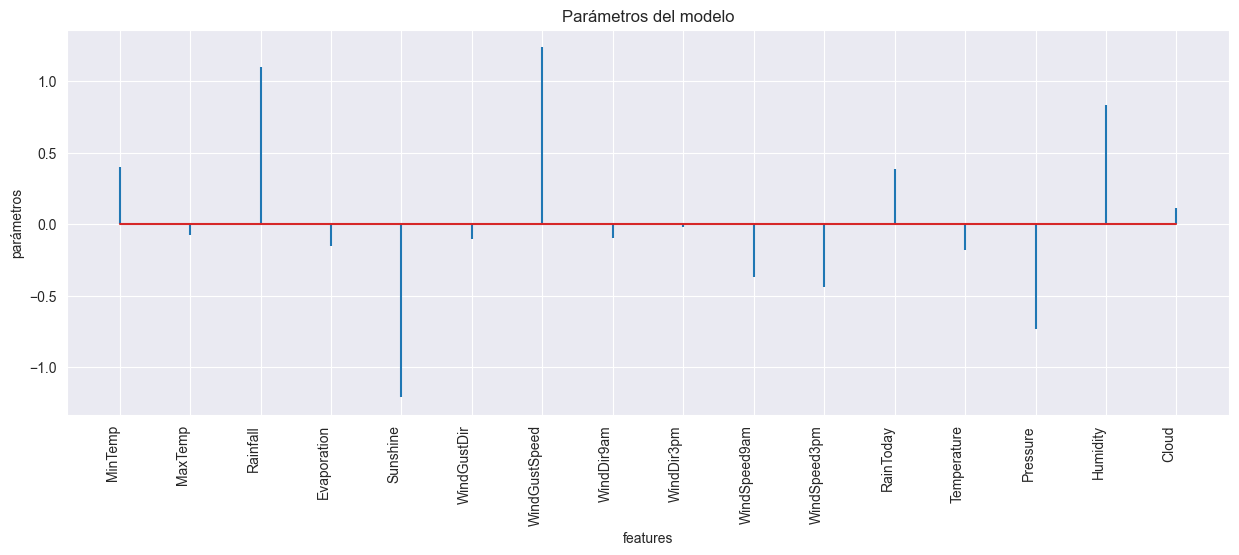

In [128]:
# Parámetros del modelo

df_coeficientes = pd.DataFrame({'predictor': X_train.columns,'coef': mod.coef_.flatten()})

fig, ax = plt.subplots(figsize=(15, 5))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('features')
ax.set_ylabel('parámetros')
ax.set_title('Parámetros del modelo');

### Realizar predicciones sobre conjuntos de train y test

In [129]:
# Predicciones
y_pred_train = modelo_ridge.predict(X_train)
y_pred_test = modelo_ridge.predict(X_test)

y_pred_train.shape, y_pred_test.shape

((22586,), (5647,))

### Calcular metricas sobre el conjunto de train

In [130]:
rmse_ridge_train = mean_squared_error(y_train, y_pred_train, squared = False) # Se usa el rmse para mantener la misma escala que la variable a predecir
R2_ridge_train = metrics.r2_score(y_train, y_pred_train)
mae_ridge_train = mean_absolute_error(y_train, y_pred_train)


### Calcular metricas sobre el conjunto de test

In [131]:
rmse_ridge_test = mean_squared_error(y_test, y_pred_test, squared = False) # Se usa el rmse para mantener la misma escala que la variable a predeci
R2_ridge_test = metrics.r2_score(y_test, y_pred_test)
mae_ridge_test = mean_absolute_error(y_test, y_pred_test)


### Visualizamos las metricas

In [132]:
print('Metricas sobre el conjunto de train')
print(' Error cuadratico medio (MSE) Train: ', rmse_ridge_train)
print(' R cuadrado (R2) Train: ', R2_ridge_train)
print(' Error absoluto medio (MAE) Train: ', mae_ridge_train)

print('\nMetricas sobre el conjunto de test')
print(' Error cuadratico medio (MSE) Test: ', rmse_ridge_test)
print(' R cuadrado (R2) Test: ', R2_ridge_test)
print(' Error absoluto medio (MAE) Test: ', mae_ridge_test)

Metricas sobre el conjunto de train
 Error cuadratico medio (MSE) Train:  5.608625460255548
 R cuadrado (R2) Train:  0.183067506782714
 Error absoluto medio (MAE) Train:  2.6337474155141716

Metricas sobre el conjunto de test
 Error cuadratico medio (MSE) Test:  5.855043209721483
 R cuadrado (R2) Test:  0.2092013773958451
 Error absoluto medio (MAE) Test:  2.681936020838787


Análisis similar a los otros modelos.

## Lasso Regression

In [133]:
modelo_lasso = make_pipeline(StandardScaler(),
                        LassoCV(
                           alphas=np.logspace(-10, 10, 200),
                           cv=10
                        )
         )

_ = modelo_lasso.fit(X_train, y_train)

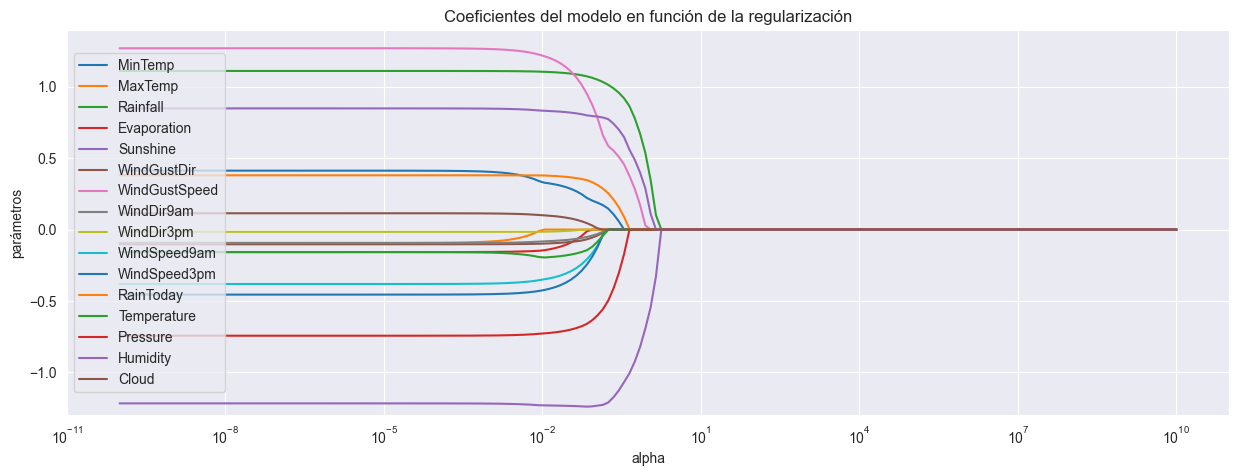

In [134]:
# Evolución de los parámetros en función de alpha

mod = modelo_lasso.steps[1][1]

alphas = mod.alphas_
coefs = []

for alpha in alphas:
    modelo_aux = make_pipeline(StandardScaler(), Lasso(alpha=alpha))
    modelo_aux.fit(X_train, y_train)
    coefs.append(modelo_aux.steps[1][1].coef_.flatten())

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(alphas, coefs, label=X_train.columns)
ax.set_xscale('log')
ax.set_ylim([-1.3,None])
ax.set_xlabel('alpha')
ax.set_ylabel('parámetros')
ax.legend()
ax.set_title('Coeficientes del modelo en función de la regularización')
plt.show()

Text(0.5, 1.0, 'Features incluidas en función de la regularización')

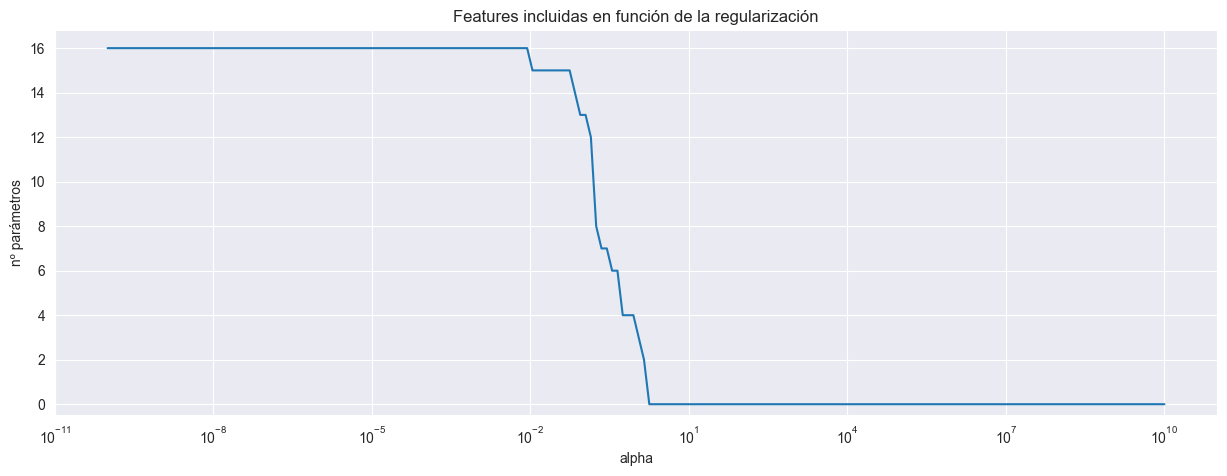

In [135]:
# Número de features incluidas (parámetros !=0) en función de alpha
alphas = mod.alphas_
n_predictores = []

for alpha in alphas:
    modelo_aux = make_pipeline(StandardScaler(), Lasso(alpha=alpha))
    modelo_aux.fit(X_train, y_train)
    coef_no_cero = np.sum(modelo_aux.steps[1][1].coef_.flatten() != 0)
    n_predictores.append(coef_no_cero)

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(alphas, n_predictores)
ax.set_xscale('log')
ax.set_ylim([-0.5,None])
ax.set_xlabel('alpha')
ax.set_ylabel('nº parámetros')
ax.set_title('Features incluidas en función de la regularización')

Observamos como a partir de cierto valor de alpha, los coeficientes se van haciendo 0, anulandose y el modelo deja de incluir esa caracteristica

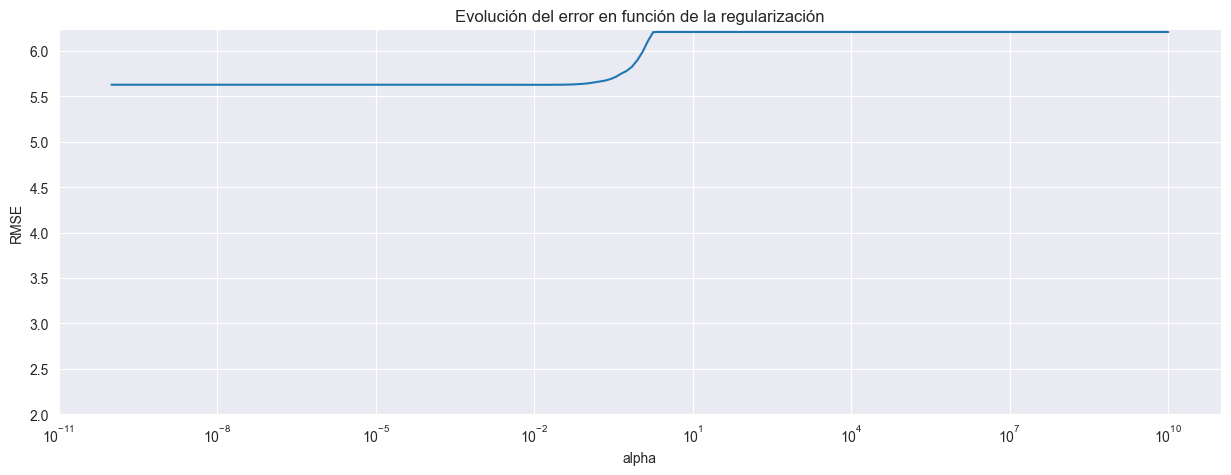

In [136]:
# Evolución del error de validación cruzada en función de alpha

# modelo.mse_path almacena el MSE de CV para cada valor de alpha.

mse_cv = mod.mse_path_.mean(axis=1)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)

# Se identifica el mejor
min_rmse     = np.min(rmse_cv)
optimo       = mod.alphas_[np.argmin(rmse_cv)]

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(mod.alphas_, rmse_cv)
ax.set_xscale('log')
ax.set_ylim([2,None])
ax.set_title('Evolución del error en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.show()

In [137]:
# Mejor valor alpha encontrado

print(f"Mejor valor de alpha encontrado: {mod.alpha_}")

Mejor valor de alpha encontrado: 0.013826221737646593


In [138]:
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': mod.coef_.flatten()}
                  )

df_coeficientes[df_coeficientes.coef != 0]

predictor      coef
0         MinTemp  0.322704
2        Rainfall  1.102651
3     Evaporation -0.137655
4        Sunshine -1.231353
5     WindGustDir -0.096541
6   WindGustSpeed  1.200351
7      WindDir9am -0.080668
8      WindDir3pm -0.013992
9    WindSpeed9am -0.341174
10   WindSpeed3pm -0.413864
11      RainToday  0.376874
12    Temperature -0.192915
13       Pressure -0.723130
14       Humidity  0.829576
15          Cloud  0.096859

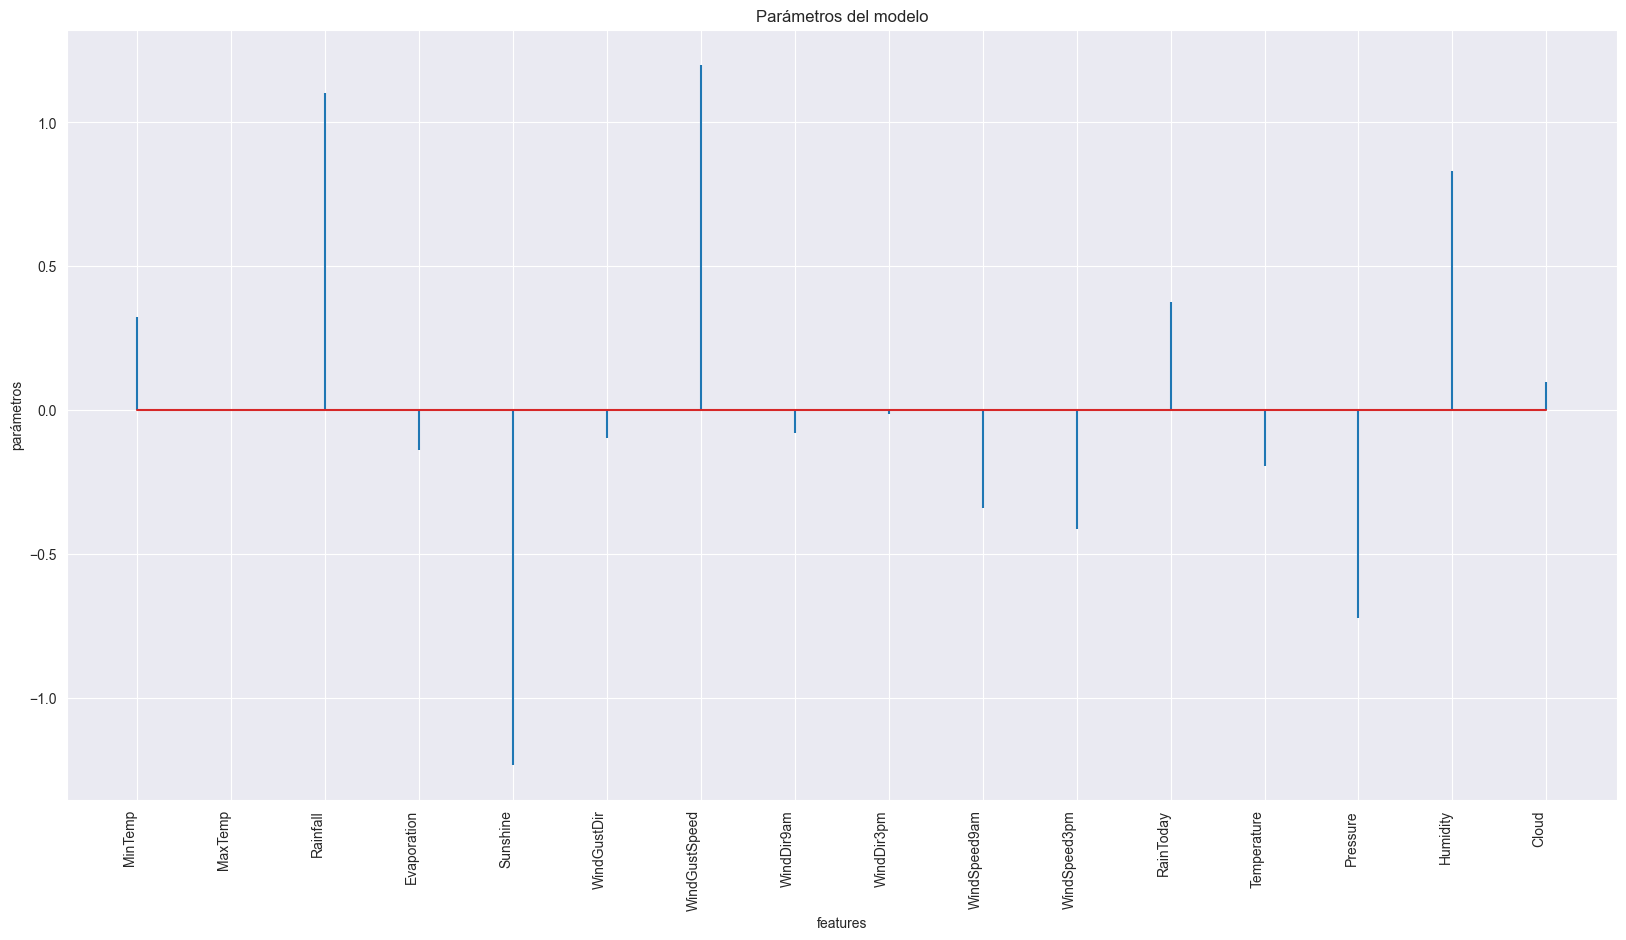

In [139]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('features')
ax.set_ylabel('parámetros')
ax.set_title('Parámetros del modelo');

### Realizar predicciones sobre conjuntos de train y test

In [140]:
# Predicciones
y_pred_train = modelo_lasso.predict(X_train)
y_pred_test = modelo_lasso.predict(X_test)

y_pred_train.shape, y_pred_test.shape

((22586,), (5647,))

### Calcular metricas sobre el conjunto de train

In [141]:
rmse_lasso_train = mean_squared_error(y_train, y_pred_train, squared = False) # Se usa el rmse para mantener la misma escala que la variable a predecir
R2_lasso_train = metrics.r2_score(y_train, y_pred_train)
mae_lasso_train = mean_absolute_error(y_train, y_pred_train)


### Calcular metricas sobre el conjunto de test

In [142]:
rmse_lasso_test = mean_squared_error(y_test, y_pred_test, squared = False) # Se usa el rmse para mantener la misma escala que la variable a predeci
R2_lasso_test = metrics.r2_score(y_test, y_pred_test)
mae_lasso_test = mean_absolute_error(y_test, y_pred_test)


### Visualizamos las metricas

In [143]:
print('Metricas sobre el conjunto de train')
print(' Error cuadratico medio (MSE) Train: ', rmse_lasso_train)
print(' R cuadrado (R2) Train: ', R2_lasso_train)
print(' Error absoluto medio (MAE) Train: ', mae_lasso_train)

print('\nMetricas sobre el conjunto de test')
print(' Error cuadratico medio (MSE) Test: ', rmse_lasso_test)
print(' R cuadrado (R2) Test: ', R2_lasso_test)
print(' Error absoluto medio (MAE) Test: ', mae_lasso_test)

Metricas sobre el conjunto de train
 Error cuadratico medio (MSE) Train:  5.608995214809396
 R cuadrado (R2) Train:  0.1829597889582114
 Error absoluto medio (MAE) Train:  2.626420196882145

Metricas sobre el conjunto de test
 Error cuadratico medio (MSE) Test:  5.859172596196957
 R cuadrado (R2) Test:  0.20808553091811177
 Error absoluto medio (MAE) Test:  2.6783102316599416


Mismo análisis que modelos anteriores.

## ElasticNet

In [144]:
modelo_elastic = make_pipeline(StandardScaler(),
                        ElasticNetCV(
                              l1_ratio        = [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99],
                              alphas          = np.logspace(-10, 10, 200),
                              cv              = 10
                           )
         )

_ = modelo_elastic.fit(X_train, y_train)

mod = modelo_elastic.steps[1][1]

In [145]:
# Error medio de las 10 particiones por cada valor de alpha y l1_ratio
mean_error_cv = mod.mse_path_.mean(axis =2)

# El resultado es un array de dimensiones (n_l1_ratio, n_alpha) se convierte en un dataframe
df_resultados_cv = pd.DataFrame(
                        data   = mean_error_cv.flatten(),
                        index  = pd.MultiIndex.from_product(
                                    iterables = [mod.l1_ratio, mod.alphas_],
                                    names     = ['l1_ratio', 'mod.alphas_']
                                 ),
                        columns = ["mse_cv"]
                    )

df_resultados_cv['rmse_cv'] = np.sqrt(df_resultados_cv['mse_cv'])
df_resultados_cv = df_resultados_cv.reset_index().sort_values('mse_cv', ascending = True)
df_resultados_cv

l1_ratio   mod.alphas_     mse_cv   rmse_cv
516       0.50  2.196385e-02  31.642567  5.625173
717       0.70  1.742633e-02  31.642873  5.625200
515       0.50  2.768287e-02  31.642978  5.625209
716       0.70  2.196385e-02  31.643047  5.625215
517       0.50  1.742633e-02  31.643388  5.625246
...        ...           ...        ...       ...
1022      0.95  6.150986e+07  38.519726  6.206426
1023      0.95  4.880252e+07  38.519726  6.206426
1024      0.95  3.872039e+07  38.519726  6.206426
1018      0.95  1.552225e+08  38.519726  6.206426
1055      0.95  2.967302e+04  38.519726  6.206426

[1400 rows x 4 columns]

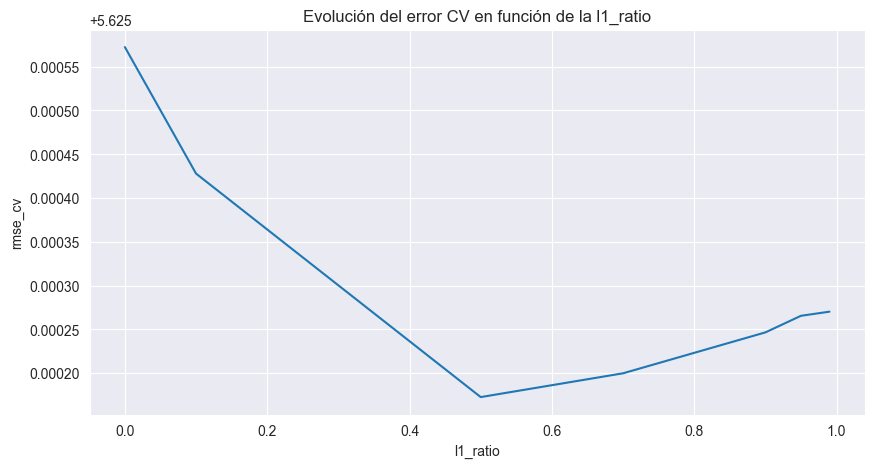

In [146]:
fig, ax = plt.subplots(figsize=(10, 5))
df_resultados_cv.groupby('l1_ratio')['rmse_cv'].min().plot(ax = ax)
ax.set_title('Evolución del error CV en función de la l1_ratio')
ax.set_xlabel('l1_ratio')
ax.set_ylabel('rmse_cv');

In [147]:
# Mejor valor alpha y l1_ratio_ encontrado

print(f"Mejor valor de alpha encontrado: {mod.alpha_}")
print(f"Mejor valor de l1_ratio encontrado: {mod.l1_ratio_}")

Mejor valor de alpha encontrado: 0.021963853724165514
Mejor valor de l1_ratio encontrado: 0.5


In [148]:
# Parámetros del modelo
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': mod.coef_.flatten()}
                  )

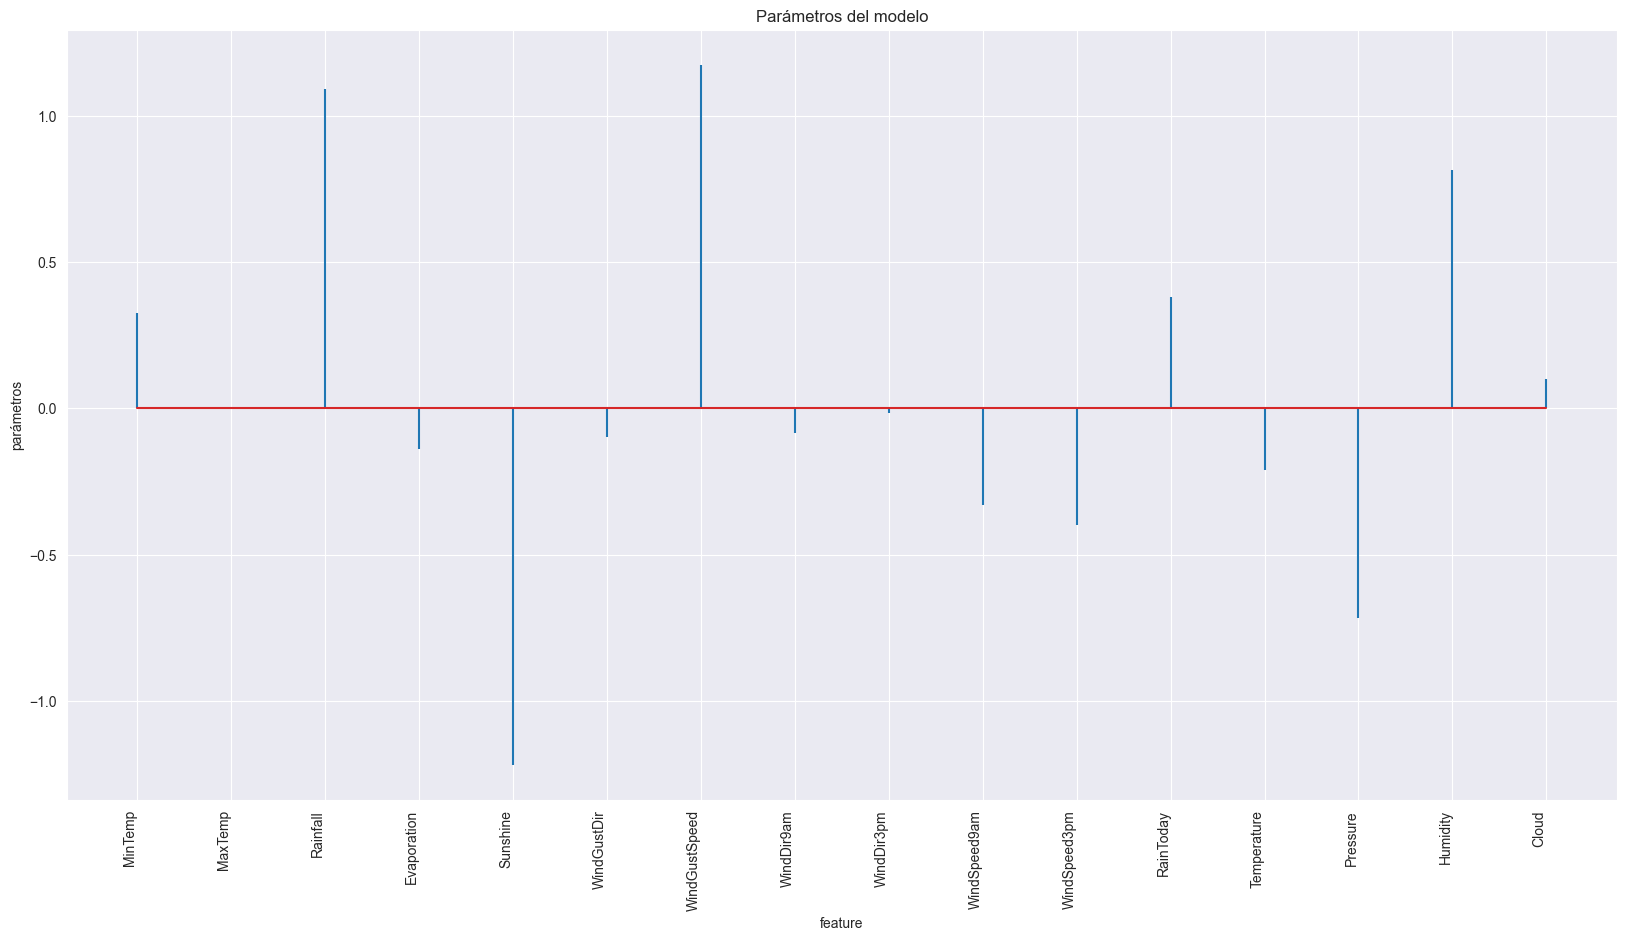

In [149]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('parámetros')
ax.set_title('Parámetros del modelo');

### Realizar predicciones sobre conjuntos de train y test

In [150]:
# Predicciones
y_pred_train = modelo_elastic.predict(X_train)
y_pred_test = modelo_elastic.predict(X_test)

y_pred_train.shape, y_pred_test.shape

((22586,), (5647,))

### Calcular metricas sobre el conjunto de train

In [151]:
rmse_elas_train = mean_squared_error(y_train, y_pred_train, squared = False) # Se usa el rmse para mantener la misma escala que la variable a predecir
R2_elas_train = metrics.r2_score(y_train, y_pred_train)
mae_elas_train = mean_absolute_error(y_train, y_pred_train)


### Calcular metricas sobre el conjunto de test

In [152]:
rmse_elas_test = mean_squared_error(y_test, y_pred_test, squared = False) # Se usa el rmse para mantener la misma escala que la variable a predecir
R2_elas_test = metrics.r2_score(y_test, y_pred_test)
mae_elas_test = mean_absolute_error(y_test, y_pred_test)


### Visualizamos las metricas

In [153]:
print('Metricas sobre el conjunto de train')
print(' Error cuadratico medio (MSE) Train: ', rmse_elas_train)
print(' R cuadrado (R2) Train: ', R2_elas_train)
print(' Error absoluto medio (MAE) Train: ', mae_elas_train)

print('\nMetricas sobre el conjunto de test')
print(' Error cuadratico medio (MSE) Test: ', rmse_elas_test)
print(' R cuadrado (R2) Test: ', R2_elas_test)
print(' Error absoluto medio (MAE) Test: ', mae_elas_test)

Metricas sobre el conjunto de train
 Error cuadratico medio (MSE) Train:  5.609200829584462
 R cuadrado (R2) Train:  0.18289988567358628
 Error absoluto medio (MAE) Train:  2.622547046876659

Metricas sobre el conjunto de test
 Error cuadratico medio (MSE) Test:  5.860859816677365
 R cuadrado (R2) Test:  0.20762938231789807
 Error absoluto medio (MAE) Test:  2.6755704954172637


Mismo análisis que los demás modelos.

# Comparación de métricas de modelos

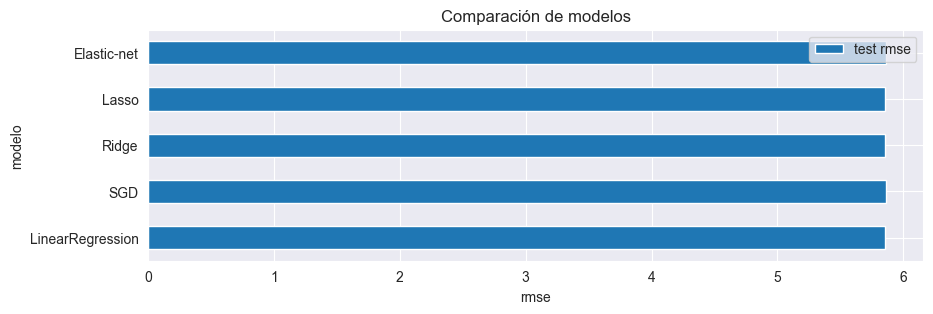

In [154]:
df_comparacion = pd.DataFrame({
                    'modelo': ['LinearRegression', 'SGD', 'Ridge', 'Lasso', 'Elastic-net'],
                    'test rmse': [rmse_test, rmse_sgd_test, rmse_ridge_test, rmse_lasso_test, rmse_elas_test]

                 })

fig, ax = plt.subplots(figsize=(10, 3))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('rmse')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

In [155]:
rmse_test, rmse_sgd_test, rmse_ridge_test, rmse_lasso_test, rmse_elas_test

(5.852900827843206,
 5.8669096770712335,
 5.855043209721483,
 5.859172596196957,
 5.860859816677365)

*RMSE_test:* Las predicciones del modelo de regresion lineal están desviadas de los valores reales por aproximadamente 5.9451 unidades.

*RMSE_sgd_test:* Las predicciones del modelo por optimizacion del descenso gradiente están desviadas de los valores reales por aproximadamente 5.9606 unidades.

*RMSE_ridge_test:* Las predicciones del modelo con Ridge están desviadas de los valores reales por aproximadamente 5.9465 unidades.

*RMSE_lasso_test:* Las predicciones del modelo con Lasso están desviadas de los valores reales por aproximadamente 5.9473 unidades.

*RMSE_elas_test:* Las predicciones del modelo con Elastic Net están desviadas de los valores reales por aproximadamente 5.9469 unidades.


Los valores de RMSE para todos los métodos son bastante similares, lo que indica que todos los modelos tienen un desempeño comparable en términos de la precisión de las predicciones.

In [156]:
R2_test, R2_sgd_test, R2_ridge_test, R2_lasso_test, R2_elas_test

(0.20977998377741958,
 0.20599269216424754,
 0.2092013773958451,
 0.20808553091811177,
 0.20762938231789807)

*R2_test:* El 18.47% de la variabilidad en la variable dependiente puede ser explicada por el modelo de regresión lineal.

*R2_sgd_test:* El 18.04% de la variabilidad en la variable dependiente puede ser explicada por el modelo.

*R2_ridge_test:* Ridge explica aproximadamente el 18.43% de la variabilidad en la variable dependiente.

*R2_lasso_test:* Lasso explica aproximadamente el 18.41% de la variabilidad.

*R2_elas_test:* Elastic Net explica aproximadamente el 18.42% de la variabilidad en la variable dependiente.


Todos los métodos tienen un desempeño similar en términos de la cantidad de variabilidad en la variable dependiente que pueden explicar, con valores de R2 muy cercanos entre sí. Esto sugiere que los métodos de regresión lineal, tanto tradicionales como con regularización, pueden no estar capturando completamente la estructura en los datos.

## Conclusión
No llegamos a un buen fitting, lo concluimos observando las métricas obtenidas: un bajo R2, el cual indica el procentaje de la variablidad de 'RainfallTomorrow' que se explica con las variables que se seleccionan para entrenar modelos.




---

## ***ENTREGA Nº 2***
***PUNTOS 5-6-7-8 DEL ENUNCIADO***


---



### ***5.	Implementar la solución del problema de clasificación con regresión logística***

In [157]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

## Split del Dataset

In [158]:
# División de los datos en train y test para problema de Clasificacion

X = df_filtrado.drop(columns= ['RainfallTomorrow', 'RainTomorrow'])
y_clasif = df_filtrado['RainTomorrow']
y_reg = df_filtrado['RainfallTomorrow']

# Conjuntos Clasificacion
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y_clasif.values,test_size=0.2,random_state = 42, shuffle= False)
# Conjuntos Regresion
#X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X,y_reg.values,test_size=0.2,random_state = 42, shuffle= False)

In [159]:
X_train2.shape, X_test2.shape

((22586, 21), (5647, 21))

In [160]:
y_train2.shape, y_test2.shape

((22586,), (5647,))

In [161]:
X_train2.columns

Index(['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

In [162]:
X_train2['RainTomorrow'] = y_train2

In [163]:
X_train2

Date  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
45573  2007-11-01      8.0     24.3       0.0          3.4       6.3   
45574  2007-11-02     14.0     26.9       3.6          4.4       9.7   
45575  2007-11-03     13.7     23.4       3.6          5.8       3.3   
45576  2007-11-04     13.3     15.5      39.8          7.2       9.1   
45577  2007-11-05      7.6     16.1       2.8          5.6      10.6   
...           ...      ...      ...       ...          ...       ...   
35890  2015-10-06     20.0     36.4       0.0          8.6      11.4   
98853  2015-10-06     18.1     23.8       0.0          NaN       NaN   
8427   2015-10-06     20.8     36.8       0.0          8.4       NaN   
101892 2015-10-06     16.6     20.7       0.0         12.0       4.6   
48380  2015-10-06      6.8     31.8       0.0          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Humidity9am  \
45573           NW           30.0         SW         NW  ...         68.0   
45574          ENE           39.0          E          W  ...         80.0   
45575           NW           85.0          N        NNE  ...         82.0   
45576           NW           54.0        WNW          W  ...         62.0   
45577          SSE           50.0        SSE        ESE  ...         68.0   
...            ...            ...        ...        ...  ...          ...   
35890          NNE           52.0         NW         NE  ...         31.0   
98853           SW           44.0         SW         SW  ...         61.0   
8427           NNW           48.0        NNE         NW  ...         13.0   
101892           W           52.0        WNW        WSW  ...         63.0   
48380          NNW           61.0        ENE        WNW  ...         55.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
45573          29.0       1019.7       1015.0       7.0       7.0     14.4   
45574          36.0       1012.4       1008.4       5.0       3.0     17.5   
45575          69.0       1009.5       1007.2       8.0       7.0     15.4   
45576          56.0       1005.5       1007.0       2.0       7.0     13.5   
45577          49.0       1018.3       1018.5       7.0       7.0     11.1   
...             ...          ...          ...       ...       ...      ...   
35890          21.0       1023.0       1019.3       1.0       1.0     25.0   
98853          49.0       1017.1       1022.4       NaN       NaN     19.9   
8427            6.0       1022.0       1019.5       0.0       0.0     26.9   
101892         65.0       1012.3       1019.9       5.0       7.0     18.7   
48380          17.0       1025.2       1020.9       NaN       NaN     17.5   

        Temp3pm  RainToday  RainTomorrow  
45573      23.6         No           Yes  
45574      25.7        Yes           Yes  
45575      20.2        Yes           Yes  
45576      14.1        Yes           Yes  
45577      15.4        Yes            No  
...         ...        ...           ...  
35890      32.5         No            No  
98853      19.3         No            No  
8427       35.8         No            No  
101892     15.1         No            No  
48380      31.4         No            No  

[22586 rows x 22 columns]

In [164]:
## Obtener los nombres de las variables numericas y categoricas
num_var = [variable for variable in X_train2.columns if X_train2[variable].dtypes == ('int64' and 'float64') ]
cat_var = [variable for variable in X_train2.columns if X_train2[variable].dtypes == ('O')]

print(f"La variables numericas en los datos son {num_var}.\n")
print(f"La variables categoricas en los datos son {cat_var}.")

La variables numericas en los datos son ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'].

La variables categoricas en los datos son ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'].


In [165]:
## Observamos los unicos valores en cada una de las variables categoricas

for variable in cat_var:
    print(f"Los unicos valores en {variable} son {X_train2[variable].unique()} (total de {X_train2[variable].nunique()}).\n")


Los unicos valores en WindGustDir son ['NW' 'ENE' 'SSE' 'SE' 'E' 'S' 'N' 'WNW' 'ESE' 'NE' 'NNE' 'NNW' 'SW' 'W'
 'WSW' nan 'SSW'] (total de 16).

Los unicos valores en WindDir9am son ['SW' 'E' 'N' 'WNW' 'SSE' 'SE' 'S' 'WSW' 'NNE' 'NNW' 'ENE' 'SSW' 'NW'
 'ESE' 'NE' 'W' nan] (total de 16).

Los unicos valores en WindDir3pm son ['NW' 'W' 'NNE' 'ESE' 'E' 'ENE' 'WSW' 'NE' 'NNW' 'SE' 'S' 'SW' 'WNW' 'N'
 'SSW' 'SSE' nan] (total de 16).

Los unicos valores en RainToday son ['No' 'Yes' nan] (total de 2).

Los unicos valores en RainTomorrow son ['Yes' 'No' nan] (total de 2).



# Datos faltantes

In [166]:
### Cantidad de valores faltantes.

X_train2.isna().sum()

Date                0
MinTemp           356
MaxTemp           343
Rainfall          741
Evaporation      2016
Sunshine         3962
WindGustDir      1571
WindGustSpeed    1568
WindDir9am       1415
WindDir3pm        414
WindSpeed9am      350
WindSpeed3pm      336
Humidity9am       604
Humidity3pm       560
Pressure9am       624
Pressure3pm       617
Cloud9am         7177
Cloud3pm         7467
Temp9am           371
Temp3pm           365
RainToday         741
RainTomorrow      741
dtype: int64

In [167]:
## Vemos el porcentaje de valores faltantes en cada una de las variables
valores_faltantes_df = pd.DataFrame()
valores_faltantes_df['Variables'] = X_train2.columns
valores_faltantes_df['Numero_de_valores_faltantes'] = X_train2.isnull().sum().to_numpy()
valores_faltantes_df['Porcentaje_de_valores_faltantes (%)'] = valores_faltantes_df['Numero_de_valores_faltantes'].apply(lambda x: np.round((x/X_train2.shape[0])*100),2)
valores_faltantes_df

Variables  Numero_de_valores_faltantes  \
0            Date                            0   
1         MinTemp                          356   
2         MaxTemp                          343   
3        Rainfall                          741   
4     Evaporation                         2016   
5        Sunshine                         3962   
6     WindGustDir                         1571   
7   WindGustSpeed                         1568   
8      WindDir9am                         1415   
9      WindDir3pm                          414   
10   WindSpeed9am                          350   
11   WindSpeed3pm                          336   
12    Humidity9am                          604   
13    Humidity3pm                          560   
14    Pressure9am                          624   
15    Pressure3pm                          617   
16       Cloud9am                         7177   
17       Cloud3pm                         7467   
18        Temp9am                          371   
19        Temp3pm                          365   
20      RainToday                          741   
21   RainTomorrow                          741   

    Porcentaje_de_valores_faltantes (%)  
0                                   0.0  
1                                   2.0  
2                                   2.0  
3                                   3.0  
4                                   9.0  
5                                  18.0  
6                                   7.0  
7                                   7.0  
8                                   6.0  
9                                   2.0  
10                                  2.0  
11                                  1.0  
12                                  3.0  
13                                  2.0  
14                                  3.0  
15                                  3.0  
16                                 32.0  
17                                 33.0  
18                                  2.0  
19                                  2.0  
20                                  3.0  
21                                  3.0

**DATOS FALTANTES: las variables con mayores datos faltantes son: "Sunshine", 'Cloud9am' y 'Cloud3pm'.**

# Imputacion de valores faltantes

---



In [168]:
def cambiar_mediana_fecha(df, columna_objetivo):
    indices_faltantes = df[df[columna_objetivo].isnull()].index

    for indice in indices_faltantes:
        fecha_actual = df.loc[indice, 'Date']
        filas_misma_fecha = df[df['Date'] == fecha_actual]
        mediana = filas_misma_fecha[columna_objetivo].median()
        df.at[indice, columna_objetivo] = mediana

    nulos = df[columna_objetivo].isnull().sum()
    return nulos

In [169]:
for col in num_var:
  cambiar_mediana_fecha(X_train2, col)

In [170]:
## Vemos el porcentaje de valores faltantes en cada una de las variables
valores_faltantes_df = pd.DataFrame()
valores_faltantes_df['Variables'] = X_train2.columns
valores_faltantes_df['Numero_de_valores_faltantes'] = X_train2.isnull().sum().to_numpy()
valores_faltantes_df['Porcentaje_de_valores_faltantes (%)'] = valores_faltantes_df['Numero_de_valores_faltantes'].apply(lambda x: np.round((x/X_train2.shape[0])*100),2)
valores_faltantes_df

Variables  Numero_de_valores_faltantes  \
0            Date                            0   
1         MinTemp                            0   
2         MaxTemp                            0   
3        Rainfall                            0   
4     Evaporation                            0   
5        Sunshine                            0   
6     WindGustDir                         1571   
7   WindGustSpeed                            2   
8      WindDir9am                         1415   
9      WindDir3pm                          414   
10   WindSpeed9am                            0   
11   WindSpeed3pm                            0   
12    Humidity9am                            0   
13    Humidity3pm                            0   
14    Pressure9am                            0   
15    Pressure3pm                            0   
16       Cloud9am                            0   
17       Cloud3pm                            0   
18        Temp9am                            0   
19        Temp3pm                            0   
20      RainToday                          741   
21   RainTomorrow                          741   

    Porcentaje_de_valores_faltantes (%)  
0                                   0.0  
1                                   0.0  
2                                   0.0  
3                                   0.0  
4                                   0.0  
5                                   0.0  
6                                   7.0  
7                                   0.0  
8                                   6.0  
9                                   2.0  
10                                  0.0  
11                                  0.0  
12                                  0.0  
13                                  0.0  
14                                  0.0  
15                                  0.0  
16                                  0.0  
17                                  0.0  
18                                  0.0  
19                                  0.0  
20                                  3.0  
21                                  3.0

Observamos que la variable 'WindGustSpeed' nos queda con 2 valores nulos.
Buscando en que registros (index) estan esos nulos, encontramos que tienen por fecha el '2008-05-30'. Al querer calcular la mediana, la funcion nos devuelve 'NaN' porque no habia valor numerico alguno.
Imputamos con la media de los 2 dias anteriores.


In [171]:
X_train2[(X_train2['Date'] >= '2008-05-29') & (X_train2['Date'] <= '2008-05-31')][['Date','WindGustSpeed']]

Date  WindGustSpeed
45783 2008-05-29           20.0
30285 2008-05-29           20.0
45784 2008-05-30            NaN
30286 2008-05-30            NaN
30287 2008-05-31           22.0
45785 2008-05-31           22.0

In [172]:
X_train2.at[45784, 'WindGustSpeed'] = 21
X_train2.at[30286, 'WindGustSpeed'] = 21

In [173]:
## Vemos el porcentaje de valores faltantes en cada una de las variables
valores_faltantes_df = pd.DataFrame()
valores_faltantes_df['Variables'] = X_train2.columns
valores_faltantes_df['Numero_de_valores_faltantes'] = X_train2.isnull().sum().to_numpy()
valores_faltantes_df['Porcentaje_de_valores_faltantes (%)'] = valores_faltantes_df['Numero_de_valores_faltantes'].apply(lambda x: np.round((x/X_train2.shape[0])*100),2)
valores_faltantes_df

Variables  Numero_de_valores_faltantes  \
0            Date                            0   
1         MinTemp                            0   
2         MaxTemp                            0   
3        Rainfall                            0   
4     Evaporation                            0   
5        Sunshine                            0   
6     WindGustDir                         1571   
7   WindGustSpeed                            0   
8      WindDir9am                         1415   
9      WindDir3pm                          414   
10   WindSpeed9am                            0   
11   WindSpeed3pm                            0   
12    Humidity9am                            0   
13    Humidity3pm                            0   
14    Pressure9am                            0   
15    Pressure3pm                            0   
16       Cloud9am                            0   
17       Cloud3pm                            0   
18        Temp9am                            0   
19        Temp3pm                            0   
20      RainToday                          741   
21   RainTomorrow                          741   

    Porcentaje_de_valores_faltantes (%)  
0                                   0.0  
1                                   0.0  
2                                   0.0  
3                                   0.0  
4                                   0.0  
5                                   0.0  
6                                   7.0  
7                                   0.0  
8                                   6.0  
9                                   2.0  
10                                  0.0  
11                                  0.0  
12                                  0.0  
13                                  0.0  
14                                  0.0  
15                                  0.0  
16                                  0.0  
17                                  0.0  
18                                  0.0  
19                                  0.0  
20                                  3.0  
21                                  3.0

Calculamos las medianas y las modas de las variables del conjunto de entrenamiento para despues usarlas en el conjunto de test para imputar los valores nulos, si los hay.

In [174]:
num_var

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [175]:
# Guardamos las medianas de las variables numericas
X_train_origen = X_train2[num_var].copy()
medianas = X_train_origen.median()
medianas.columns = X_train_origen.columns
medianas

MinTemp            10.7
MaxTemp            20.7
Rainfall            0.0
Evaporation         4.0
Sunshine            7.2
WindGustSpeed      41.0
WindSpeed9am       13.0
WindSpeed3pm       19.0
Humidity9am        70.0
Humidity3pm        50.0
Pressure9am      1018.5
Pressure3pm      1016.4
Cloud9am            5.0
Cloud3pm            5.0
Temp9am            14.7
Temp3pm            19.2
dtype: float64

In [176]:
cat_var

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

In [177]:
# Guardamos las modas de las variables numericas
X_train_origen = X_train2[cat_var].copy()
modas = X_train_origen.mode(0)
modas.columns = X_train_origen.columns
modas

WindGustDir WindDir9am WindDir3pm RainToday RainTomorrow
0           N          N          S        No           No

In [178]:
# Funcion para imputar los valores numericos nulos en el conjunto de Test
def cambiar_mediana_test(df, columna_objetivo):
    indices_faltantes = df[df[columna_objetivo].isnull()].index

    for indice in indices_faltantes:
        df.at[indice, columna_objetivo] = medianas[columna_objetivo]


In [179]:
# Funcion para imputar los valores categoricos nulos en el conjunto de Test
def cambiar_moda_test(df, columna_objetivo):
    indices_faltantes = df[df[columna_objetivo].isnull()].index

    for indice in indices_faltantes:
        df.at[indice, columna_objetivo] = modas[columna_objetivo][0]


### Imputacion de valores faltantes variables categoricas

**ColumnTransformer** aplica transformadores a las columnas de una matriz o Pandas DataFrame.

En nuestro caso imputara los valores faltantes en las variables categoricas del dataframe (cat_var) con la moda de los datos de cada columna.

In [180]:
## COMPLETAR LOS VALORES NULOS NUMERICOS CON LA MODA
imput_cat = ColumnTransformer([('category', SimpleImputer(strategy='most_frequent'), cat_var)])
X_train2[cat_var] = imput_cat.fit_transform(X_train2[cat_var])

In [181]:
## COMPROBAMOS QUE NO TENEMOS VALORES NULOS EN LAS VARIABLES CATEGORICAS
X_train2[cat_var].isnull().sum()

WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

### Verificar existencia de Datos Duplicados

In [182]:
## EXISTENCIA DE DATOS DUPLICADOS
duplicados = X_train2[X_train2.duplicated()]
duplicados

Empty DataFrame
Columns: [Date, MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday, RainTomorrow]
Index: []

[0 rows x 22 columns]

***NO EXISTEN DATOS DUPLICADOS***

*Está balanceado el Dataset?*

In [183]:
## COMPROBAR QUE LA VARIABLE "RainfallTomorrow" ESTA BALANCEDADA O NO
X_train2['RainTomorrow'].value_counts()

RainTomorrow
No     17394
Yes     5192
Name: count, dtype: int64

El Dataset esta desbalanceado. Es importante que nos hagamos esta pregunta porque un dataset desbalanceado puede generar sesgos en nuestro modelo. Lo vamos a tratar mas adelante.

## Variables Descripcion


In [184]:
X_train2.drop(columns='Date').describe().T

count         mean        std    min     25%     50%     75%  \
MinTemp        22586.0    11.059590   5.668137   -8.0     7.3    10.7    14.9   
MaxTemp        22586.0    21.618097   6.591311    4.1    16.4    20.7    25.8   
Rainfall       22586.0     1.972839   6.206100    0.0     0.0     0.0     0.8   
Evaporation    22586.0     4.646934   3.531843    0.0     2.2     4.0     6.4   
Sunshine       22586.0     6.842458   3.765754    0.0     3.9     7.2     9.9   
WindGustSpeed  22586.0    42.125985  14.130791   11.0    31.0    41.0    50.0   
WindSpeed9am   22586.0    15.343775   9.559740    0.0     9.0    13.0    20.0   
WindSpeed3pm   22586.0    20.235677   8.986931    0.0    13.0    19.0    26.0   
Humidity9am    22586.0    68.831821  18.658093    5.0    57.0    70.0    83.0   
Humidity3pm    22586.0    50.419751  19.791665    1.0    37.0    50.0    63.0   
Pressure9am    22586.0  1018.384548   7.383838  986.7  1013.4  1018.5  1023.5   
Pressure3pm    22586.0  1016.283901   7.236294  985.5  1011.4  1016.4  1021.3   
Cloud9am       22586.0     4.590432   2.664176    0.0     2.0     5.0     7.0   
Cloud3pm       22586.0     4.690760   2.475381    0.0     2.0     5.0     7.0   
Temp9am        22586.0    15.236921   5.636514   -1.3    11.2    14.7    18.9   
Temp3pm        22586.0    20.145628   6.435580    3.7    15.2    19.2    24.2   

                  max  
MinTemp          33.9  
MaxTemp          46.8  
Rainfall        119.4  
Evaporation      64.8  
Sunshine         14.3  
WindGustSpeed   122.0  
WindSpeed9am     69.0  
WindSpeed3pm     76.0  
Humidity9am     100.0  
Humidity3pm     100.0  
Pressure9am    1040.6  
Pressure3pm    1037.9  
Cloud9am          9.0  
Cloud3pm          8.0  
Temp9am          38.6  
Temp3pm          46.1

*Se puede evidenciar el rango de las variables, por ejemplo las unicas que toman valores por debajo de 0 son las medidas de temperatura ['Temp9am”'y 'MinTemp']. Las variables que tiene valores mas altos son las medidas de presion ['Pressure9am', 'Pressure3pm']. 'Rainfall' posee una mediana de 0 (el 50% de las observaciones) pero una valor maximo de 119.40 mm*

### Codificar los valores de las variables

In [185]:
X_train2[cat_var]

WindGustDir WindDir9am WindDir3pm RainToday RainTomorrow
45573           NW         SW         NW        No          Yes
45574          ENE          E          W       Yes          Yes
45575           NW          N        NNE       Yes          Yes
45576           NW        WNW          W       Yes          Yes
45577          SSE        SSE        ESE       Yes           No
...            ...        ...        ...       ...          ...
35890          NNE         NW         NE        No           No
98853           SW         SW         SW        No           No
8427           NNW        NNE         NW        No           No
101892           W        WNW        WSW        No           No
48380          NNW        ENE        WNW        No           No

[22586 rows x 5 columns]

In [186]:
categorico = X_train2.select_dtypes(include = "object").columns
for i in range(len(categorico)):
    X_train2[categorico[i]] = LabelEncoder().fit_transform(X_train2[categorico[i]])

In [187]:
# VEMOS COMO QUEDARON CODIFICADAS LAS VARIABLES CATEGORICAS
X_train2[cat_var]

WindGustDir  WindDir9am  WindDir3pm  RainToday  RainTomorrow
45573             7          12           7          0             1
45574             1           0          13          1             1
45575             7           3           5          1             1
45576             7          14          13          1             1
45577            10          10           2          1             0
...             ...         ...         ...        ...           ...
35890             5           7           4          0             0
98853            12          12          12          0             0
8427              6           5           7          0             0
101892           13          14          15          0             0
48380             6           1          14          0             0

[22586 rows x 5 columns]

In [188]:
X_train2['RainToday'].unique(), X_train2['RainTomorrow'].unique()

(array([0, 1]), array([1, 0]))

* Boxplots

In [189]:
def boxplots(X,y, columns):
  data = pd.concat([pd.DataFrame(y, columns=['RainTomorrow']), pd.DataFrame(X, columns=columns)], axis=1)

  # num_features = X.shape[1]
  num_features = len(columns)
  num_rows = num_features // 3 + 1

  fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
  fig.subplots_adjust(hspace=0.5)

  # Se recorre cada feature para generar su diagrama de caja respecto de la salida
  for i, feature in enumerate(data.columns[1:]):
      row = i // 3
      col = i % 3
      sns.boxplot(x='RainTomorrow', y=feature, data=data, ax=axes[row, col])
      axes[row, col].set_title(f'Diagrama de caja de {feature}')
      axes[row, col].set_xlabel('RainTomorrow')
      axes[row, col].set_ylabel(feature)

  # Eliminar subplots vacíos si es necesario
  if num_features % 3 != 0:
      for i in range(num_features % 3, 3):
          fig.delaxes(axes[num_rows - 1, i])

  plt.show()


In [190]:
feature_names=X_train2.drop(['Date', 'RainTomorrow'],axis=1).columns.values
feature_names

array(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'], dtype=object)

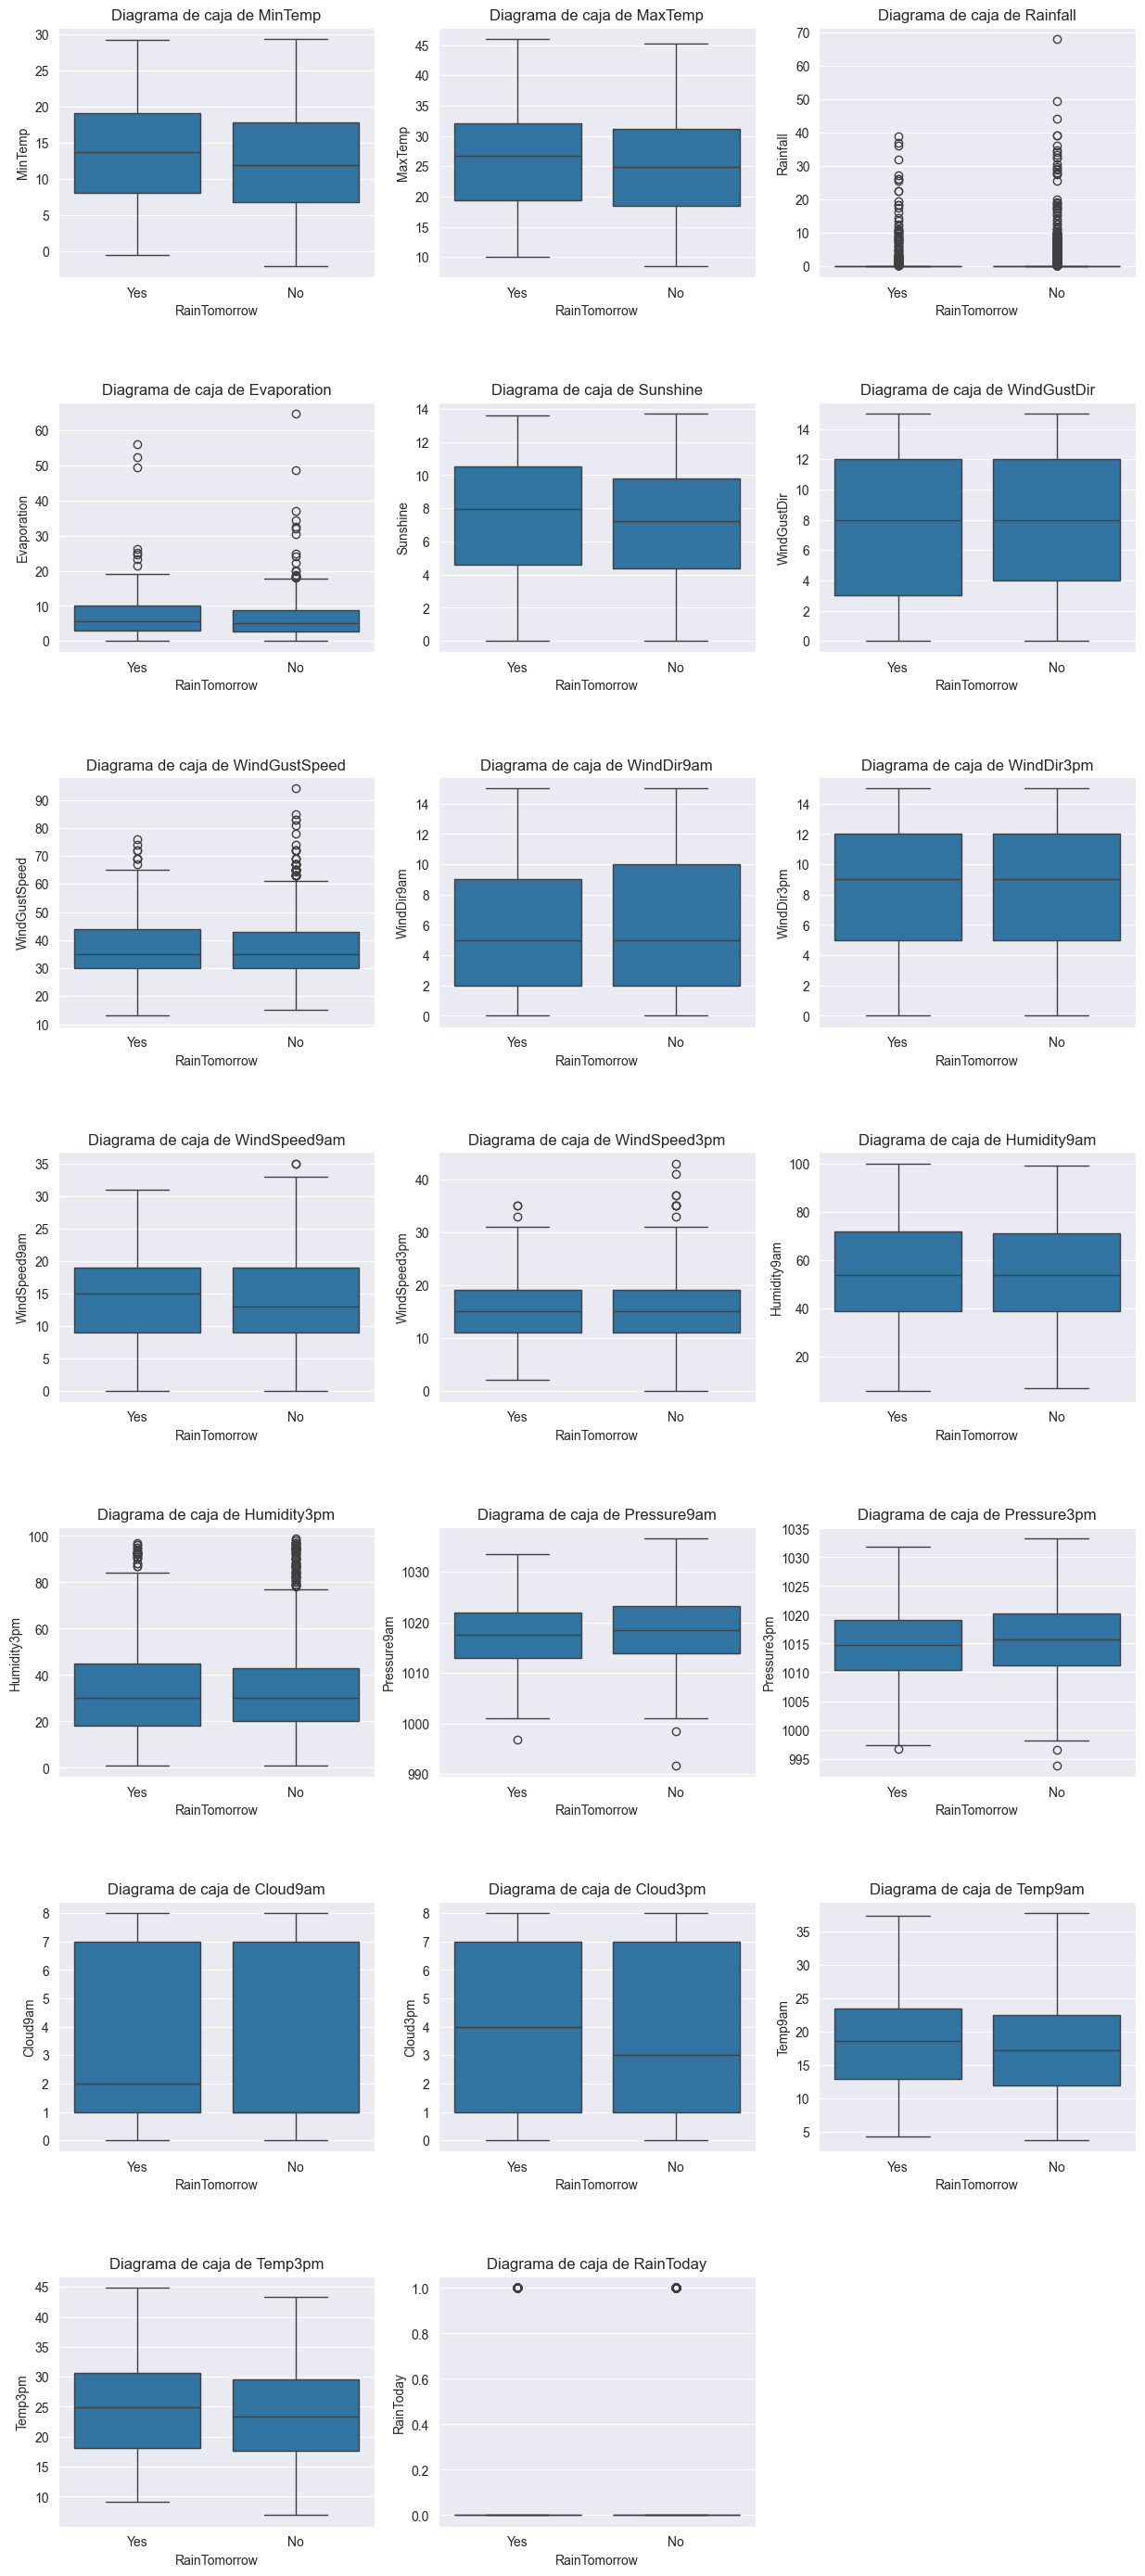

In [191]:
boxplots(X_train2, y_train2, feature_names)

* No se observa, para cada variable, una gran diferenciacion del 50% central de los datos respecto las clases de 'RainTomorrow' (mas alla de valores de medianas distintos y RIC distintos).

### Verificamos la presencia de valores atipicos

En el problema de Regresion se analizaron, para cada variable caracteristica,  la presencia de valores atipicos y se llego a la conclusion que los valores de los mismos eran valores probables de ocurrir, no representaban casos atipicos obvios como valores de precipitaciones negativos, valores de nubosidades (Cloud) fuera del rango de octavas, etc.

**Por lo que concluimos que no serian eliminados del dataset.**

Como se sigue trabajando, en esta parte del TP, con los mismos datos y variables, no se vuelve a realizar dicho analisis.

*Eliminamos la variable 'Date' pues ya no la consideramos para el modelo*

In [192]:
X_train2.drop(columns='Date', inplace=True)

### Matriz de Correlacion

In [193]:
corr = X_train2.corr(numeric_only=True)
corr

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.705776  0.056726     0.574780  0.104806   
MaxTemp        0.705776  1.000000 -0.131258     0.635552  0.462953   
Rainfall       0.056726 -0.131258  1.000000    -0.093472 -0.196182   
Evaporation    0.574780  0.635552 -0.093472     1.000000  0.311563   
Sunshine       0.104806  0.462953 -0.196182     0.311563  1.000000   
WindGustDir   -0.084118 -0.163671  0.060347    -0.049251 -0.042311   
WindGustSpeed  0.219958  0.108947  0.119834     0.238721  0.006515   
WindDir9am     0.008372 -0.190847  0.099763    -0.042446 -0.014097   
WindDir3pm    -0.109159 -0.137673  0.061738    -0.022628 -0.039504   
WindSpeed9am   0.158421 -0.019002  0.101389     0.149097 -0.033733   
WindSpeed3pm   0.130261  0.014851  0.080708     0.138603  0.054396   
Humidity9am   -0.327113 -0.520398  0.243991    -0.516635 -0.397050   
Humidity3pm   -0.104375 -0.576809  0.267707    -0.394947 -0.575011   
Pressure9am   -0.412683 -0.297100 -0.157015    -0.322466  0.012984   
Pressure3pm   -0.396870 -0.372720 -0.099972    -0.322274 -0.026944   
Cloud9am       0.088000 -0.205171  0.176785    -0.131079 -0.487930   
Cloud3pm       0.024013 -0.230460  0.152288    -0.138166 -0.536394   
Temp9am        0.893008  0.876411 -0.043684     0.649187  0.285178   
Temp3pm        0.680995  0.982646 -0.136481     0.610181  0.476821   
RainToday      0.007224 -0.266184  0.551276    -0.201146 -0.259542   
RainTomorrow   0.048019 -0.175888  0.241191    -0.096362 -0.380716   

               WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  \
MinTemp          -0.084118       0.219958    0.008372   -0.109159   
MaxTemp          -0.163671       0.108947   -0.190847   -0.137673   
Rainfall          0.060347       0.119834    0.099763    0.061738   
Evaporation      -0.049251       0.238721   -0.042446   -0.022628   
Sunshine         -0.042311       0.006515   -0.014097   -0.039504   
WindGustDir       1.000000       0.060533    0.359269    0.561472   
WindGustSpeed     0.060533       1.000000    0.025367    0.043539   
WindDir9am        0.359269       0.025367    1.000000    0.262956   
WindDir3pm        0.561472       0.043539    0.262956    1.000000   
WindSpeed9am     -0.004850       0.610094    0.060232   -0.014272   
WindSpeed3pm      0.084400       0.722527    0.091981    0.036479   
Humidity9am       0.019661      -0.228746    0.051676   -0.011441   
Humidity3pm       0.049540      -0.037813    0.116460   -0.013674   
Pressure9am      -0.124322      -0.510626   -0.021166   -0.147200   
Pressure3pm      -0.027554      -0.480788    0.072139   -0.040363   
Cloud9am          0.036104       0.035595    0.028516    0.021912   
Cloud3pm          0.033695       0.092249   -0.004636    0.027081   
Temp9am          -0.117257       0.217516   -0.093397   -0.117346   
Temp3pm          -0.179743       0.065436   -0.197089   -0.150941   
RainToday         0.139535       0.122110    0.159372    0.127011   
RainTomorrow      0.030789       0.234718   -0.007195    0.015907   

               WindSpeed9am  ...  Humidity9am  Humidity3pm  Pressure9am  \
MinTemp            0.158421  ...    -0.327113    -0.104375    -0.412683   
MaxTemp           -0.019002  ...    -0.520398    -0.576809    -0.297100   
Rainfall           0.101389  ...     0.243991     0.267707    -0.157015   
Evaporation        0.149097  ...    -0.516635    -0.394947    -0.322466   
Sunshine          -0.033733  ...    -0.397050    -0.575011     0.012984   
WindGustDir       -0.004850  ...     0.019661     0.049540    -0.124322   
WindGustSpeed      0.610094  ...    -0.228746    -0.037813    -0.510626   
WindDir9am         0.060232  ...     0.051676     0.116460    -0.021166   
WindDir3pm        -0.014272  ...    -0.011441    -0.013674    -0.147200   
WindSpeed9am       1.000000  ...    -0.263705    -0.016925    -0.276744   
WindSpeed3pm       0.531161  ...    -0.145045    -0.004431    -0.349395   
Humidity9am       -0.263705  ...     1.000000     0.6725

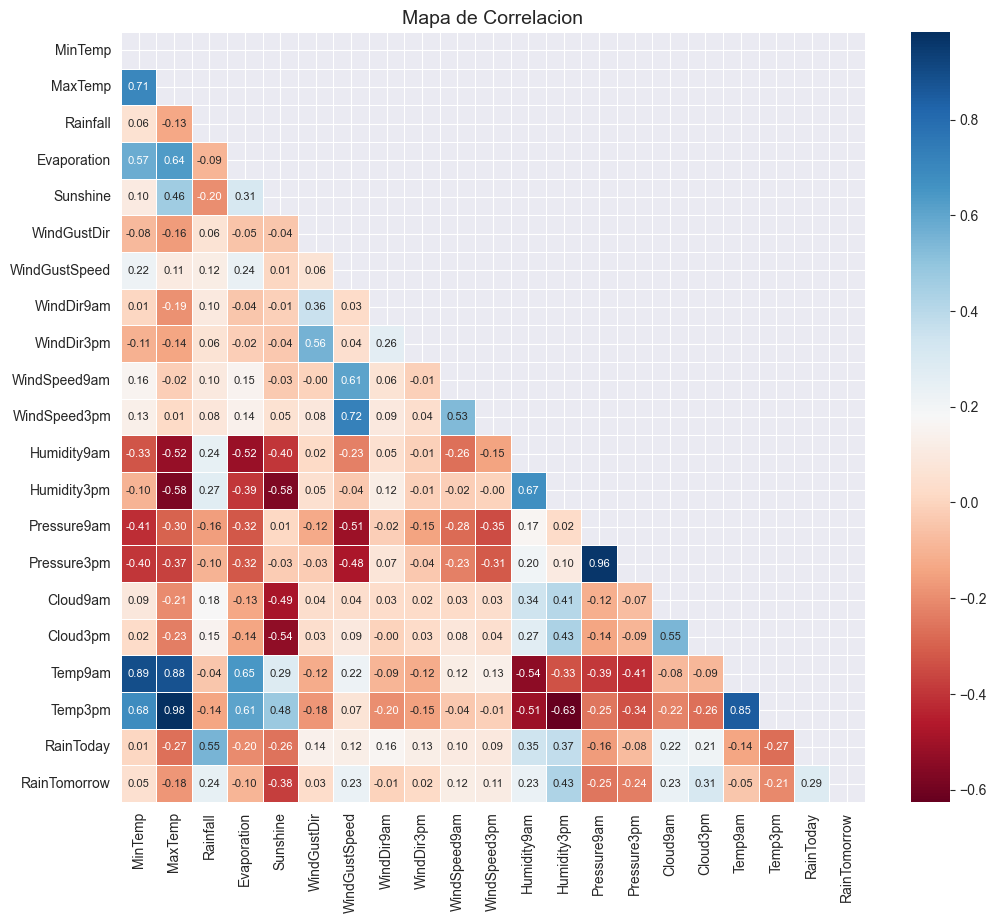

In [194]:
fig, ax = plt.subplots(figsize=(12,10))
plt.title("Mapa de Correlacion", fontsize=14)
mask = np.triu(np.ones_like(corr, dtype=bool)) # MASCARA PARA GRAFICAR SOLO UN TRIANGULO DE LA MATRIZ DE CORRELACION
# Genera el heatmap incluyendo la mascara mask
heatmap = sns.heatmap(corr,
                      annot=True,
                      annot_kws={"fontsize": 8},
                      fmt='.2f',
                      linewidths=0.5,
                      cmap='RdBu',
                      mask=mask, # la mascara ha sido incluida aqui
                      ax=ax)

plt.show()

Las variables que presentan las correlaciones mas altas con 'RainTomorrow':



*   Humidity3pm: + 0.43
*   Sunshine: - 0.38
*   Cloud3pm; + 0.31
*   RainToday: + 0.29
*   Rainfall: + 0.24

Las variables que miden la misma magnitud fisica y que presentan las correlaciones mas altas son:

*   MaxTemp - Temp3pm: + 0.98
*   Pressure9am - Pressure3pm: + 0.96
*   MinTemp - Temp9pm: + 0.89
*   Humidity9am - Humidity3pm: + 0.67




*De lo observado en las graficas de las variables y de la matriz de correlacion entre las mismas, teniendo en cuenta la similitud entre pares de variables de temperatura por un lado, presiones por otro, nubosidad y tambien humedad, vamos a resumirlas en una sola variable de acuerdo a cada magnitud meteorologica medida.*


In [195]:
col_a_eliminar= ['Temp9am', 'Temp3pm', 'Pressure9am', 'Pressure3pm', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm']
X_train2['Temperature']= X_train2['Temp3pm'] - X_train2['Temp9am']
X_train2['Pressure']= X_train2['Pressure3pm'] - X_train2['Pressure9am']
X_train2['Humidity']= X_train2['Humidity3pm'] - X_train2['Humidity9am']
X_train2['Cloud']= X_train2['Cloud3pm'] - X_train2['Cloud9am']
# Elininamos las variables resumidas
X_train2.drop(columns= col_a_eliminar, inplace= True)


In [196]:
y_train2 = X_train2['RainTomorrow']
X_train2.drop(columns= ['RainTomorrow'], inplace= True)

In [197]:
X_train2.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
RainToday        0
Temperature      0
Pressure         0
Humidity         0
Cloud            0
dtype: int64

*Al conjunto de datos de testeo, X_test, lo transformamos de la misma forma que lo hicimos con el de entrenamiento, X_train, pero las imputaciones de datos faltantes las realizamos con los indicadores estadisticos (mediana, moda) del set de entrenamiento y no con los del test.*

In [198]:
X_test2['RainTomorrow'] = y_test2

In [199]:
X_test2.columns

Index(['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [200]:
X_test2[cat_var]

WindGustDir WindDir9am WindDir3pm RainToday RainTomorrow
32882          NNE        WNW        ENE        No           No
69743           NW          N        WNW       NaN          NaN
66551           NW          N        WNW        No           No
83352          WNW        WNW        WSW        No           No
83353           SE         SE        SSE        No           No
...            ...        ...        ...       ...          ...
49007           NW          N         NW        No           No
83979            W         NW        WNW       Yes           No
9054           WSW          W        SSW        No           No
99480            W        NaN         SW        No           No
102519           W        NNW          W       Yes           No

[5647 rows x 5 columns]

In [201]:
## Obtener los nombres de las variables numericas y categoricas
num_var = [variable for variable in X_test2.columns if X_test2[variable].dtypes == ('int64' and 'float64') ]
cat_var = [variable for variable in X_test2.columns if X_test2[variable].dtypes == ('O')]

In [202]:
# Imputamos los valores nulos numericos
for col in num_var:
  cambiar_mediana_test(X_test2, col)

In [203]:
# Imputamos los valores nulos categoricos
for col in cat_var:
  cambiar_moda_test(X_test2, col)

In [204]:
# Verificamos que X_test no tenga nulos
X_test2.isnull().sum()

Date             0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [205]:
# Codificamos las variables categoricas con valores numericos
categorico = X_test2.select_dtypes(include = "object").columns
for col in categorico:
    X_test2[col] = X_test2[col].astype(str)
for i in range(len(categorico)):
    X_test2[categorico[i]] = LabelEncoder().fit_transform(X_test2[categorico[i]])

In [206]:
X_test2[cat_var]

WindGustDir  WindDir9am  WindDir3pm  RainToday  RainTomorrow
32882             5          14           1          0             0
69743             7           3          14          0             0
66551             7           3          14          0             0
83352            14          14          15          0             0
83353             9           9          10          0             0
...             ...         ...         ...        ...           ...
49007             7           3           7          0             0
83979            13           7          14          1             0
9054             15          13          11          0             0
99480            13           3          12          0             0
102519           13           6          13          1             0

[5647 rows x 5 columns]

In [207]:
X_test2.drop(columns='Date', inplace=True)

In [208]:
# Resumimos variables
col_a_eliminar= ['Temp9am', 'Temp3pm', 'Pressure9am', 'Pressure3pm', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm']
X_test2['Temperature']= X_test2['Temp3pm'] - X_test2['Temp9am']
X_test2['Pressure']= X_test2['Pressure3pm'] - X_test2['Pressure9am']
X_test2['Humidity']= X_test2['Humidity3pm'] - X_test2['Humidity9am']
X_test2['Cloud']= X_test2['Cloud3pm'] - X_test2['Cloud9am']
# Elininamos las variables resumidas
X_test2.drop(columns= col_a_eliminar, inplace= True)


In [209]:
y_test2 = X_test2['RainTomorrow']
X_test2.drop(columns= ['RainTomorrow'], inplace= True)

### Escalado de características

In [210]:
cols = X_train2.columns
cols

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'RainToday', 'Temperature', 'Pressure',
       'Humidity', 'Cloud'],
      dtype='object')

In [211]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

In [212]:
X_train2 = pd.DataFrame(X_train2, columns=[cols])

In [213]:
X_test2 = pd.DataFrame(X_test2, columns=[cols])

In [214]:
X_train2.describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  2.258600e+04  2.258600e+04  2.258600e+04  2.258600e+04  2.258600e+04   
mean  -6.543562e-17  2.315414e-16 -3.900970e-17 -1.510053e-17 -1.761728e-17   
std    1.000022e+00  1.000022e+00  1.000022e+00  1.000022e+00  1.000022e+00   
min   -3.362659e+00 -2.657815e+00 -3.178942e-01 -1.315754e+00 -1.817062e+00   
25%   -6.632996e-01 -7.916806e-01 -3.178942e-01 -6.928361e-01 -7.813902e-01   
50%   -6.344200e-02 -1.392921e-01 -3.178942e-01 -1.831758e-01  9.494785e-02   
75%    6.775586e-01  6.344709e-01 -1.889859e-01  4.963712e-01  8.119517e-01   
max    4.029704e+00  3.820554e+00  1.892167e+01  1.703201e+01  1.980402e+00   

        WindGustDir WindGustSpeed    WindDir9am    WindDir3pm  WindSpeed9am  \
count  2.258600e+04  2.258600e+04  2.258600e+04  2.258600e+04  2.258600e+04   
mean  -1.006702e-17  1.170291e-16 -4.781834e-17 -1.283545e-16 -1.321296e-17   
std    1.000022e+00  1.000022e+00  1.000022e+00  1.000022e+00  1.000022e+00   
min   -1.731149e+00 -2.202755e+00 -1.666386e+00 -1.853371e+00 -1.605077e+00   
25%   -1.063744e+00 -7.873750e-01 -9.989807e-01 -7.192483e-01 -6.636075e-01   
50%    4.859913e-02 -7.968486e-02 -1.091067e-01 -3.877487e-02 -2.451768e-01   
75%    9.384734e-01  5.572363e-01  1.003236e+00  8.685230e-01  4.870769e-01   
max    1.605879e+00  5.652605e+00  1.670641e+00  1.548996e+00  5.612853e+00   

       WindSpeed3pm     RainToday   Temperature      Pressure      Humidity  \
count  2.258600e+04  2.258600e+04  2.258600e+04  2.258600e+04  2.258600e+04   
mean  -1.012994e-16 -2.265079e-17 -1.359047e-16 -3.838051e-17 -4.844753e-17   
std    1.000022e+00  1.000022e+00  1.000022e+00  1.000022e+00  1.000022e+00   
min   -2.251728e+00 -5.466191e-01 -4.241095e+00 -5.403387e+00 -4.078194e+00   
25%   -8.051511e-01 -5.466191e-01 -6.795505e-01 -6.691752e-01 -6.149192e-01   
50%   -1.375001e-01 -5.466191e-01 -9.086551e-02 -9.533135e-02  2.642795e-02   
75%    6.414259e-01 -5.466191e-01  6.155565e-01  5.741531e-01  6.036404e-01   
max    6.205184e+00  1.829428e+00  5.325037e+00  6.025670e+00  6.055091e+00   

              Cloud  
count  2.258600e+04  
mean  -2.516755e-18  
std    1.000022e+00  
min   -3.297152e+00  
25%   -4.478767e-01  
50%   -4.083730e-02  
75%    3.662021e-01  
max    3.215478e+00

# Entrenamiento del Modelo - Regresion Logistica

In [215]:
# Inicializar y entrenar un modelo de regresión logística
model2 = LogisticRegression(random_state=42)
model2.fit(X_train2, y_train2)

# Realizar predicciones en el conjunto de prueba
y_pred_test_2 = model2.predict(X_test2)

In [216]:
model2

LogisticRegression(random_state=42)

*Metodo predict_proba*

  El metodo predict_proba proporciona las probabilidades de la variable target (0 y 1), en este caso, en forma de matriz

  0 es la probabilidad de no lluvia y 1 es la probabilidad de lluvia

In [217]:
# Probabilidad de obtener un resultado como 0 - sin lluvia de cada dato en X_test
model2.predict_proba(X_test2)[:,0]

array([0.94472924, 0.6661224 , 0.67414611, ..., 0.88967693, 0.95457654,
       0.77002467])

In [218]:
# Probabilidad de obtener un resultado como 1 - con lluvia de cada dato en X_test
model2.predict_proba(X_test2)[:,1]

array([0.05527076, 0.3338776 , 0.32585389, ..., 0.11032307, 0.04542346,
       0.22997533])

*Verificar la puntuacion de exactitud (Accuracy)*

  donde y_test son las etiquetas de clase verdaderas y y_pred_test_2 son las etiquetas de clase predichas en el conjunto de pruebas

In [219]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test2, y_pred_test_2)))

Model accuracy score: 0.8215


*Comparamos la precisión del conjunto de train y de test para verificar si hay sobreajuste*

In [220]:
y_pred_train = model2.predict(X_train2)
y_pred_train

array([0, 0, 1, ..., 0, 0, 0])

In [221]:
print('Exactitud Conjunto Train: {0:0.4f}'. format(accuracy_score(y_train2, y_pred_train)))

Exactitud Conjunto Train: 0.8252


In [222]:
# imprimir las puntuaciones en el conjunto de entrenamiento y prueba

print('Training set score: {:.4f}'.format(model2.score(X_train2, y_train2)))

print('Test set score: {:.4f}'.format(model2.score(X_test2, y_test2)))

Training set score: 0.8252
Test set score: 0.8215


El training-set accuracy score es de 0.8252 mientras que el test-set accuracy
score es de 0.8217. Estos 2 valores son bastante comparables. Por lo tanto, no se trata de overfitting.

*Interpretación*

Ahora, según el análisis anterior, podriamos concluir que la precisión de nuestro modelo de clasificación es muy buena y que nuestro modelo está haciendo un muy buen trabajo en términos de predecir las etiquetas de clase.

*Pero no proporciona la distribución subyacente de valores. Recordemos que, como vimos antes, nuestra variable target ('RainTomorrow') esta desbalanceada. Además, no dice nada sobre el tipo de errores que comete nuestro clasificador.*

### Matriz de confusión

Una matriz de confusión es una herramienta para resumir el desempeño de un algoritmo de clasificación. Una matriz de confusión nos dará una imagen clara del rendimiento del modelo de clasificación y los tipos de errores producidos por el modelo. Nos da un resumen de predicciones correctas e incorrectas desglosadas por cada categoría. El resumen se presenta en forma de tabla, describiendo cómo se distribuyen los valores reales y nuestras predicciones.


Son posibles cuatro tipos de resultados al evaluar el desempeño de un modelo de clasificación. Estos cuatro resultados se describen a continuación:

**Verdaderos positivos (TP)**: los verdaderos positivos ocurren cuando predecimos que una observación pertenece a una determinada clase y la observación en realidad pertenece a esa clase.

**Verdaderos Negativos (TN)**: Los Verdaderos Negativos ocurren cuando predecimos que una observación no pertenece a una determinada clase y la observación en realidad no pertenece a esa clase.

**Falsos positivos (FP)**: los falsos positivos ocurren cuando predecimos que una observación pertenece a una determinada clase, pero la observación en realidad no pertenece a esa clase. Este tipo de error se denomina error de tipo I.

**Falsos negativos (FN**): los falsos negativos ocurren cuando predecimos que una observación no pertenece a una determinada clase, pero la observación en realidad pertenece a esa clase. Este es un error muy grave y se llama error de tipo II.

Estos cuatro resultados se resumen en una matriz de confusión que se proporciona a continuación

In [223]:
# Imprime la matriz de confusion

cm = confusion_matrix(y_test2, y_pred_test_2)
print('Confusion matrix\n\n', cm)


Confusion matrix

 [[4209  159]
 [ 849  430]]


Hay que tener en cuenta que el orden en el que se encuentran los datos en la matriz de confusión devuelta por la función **confusion_matrix** no es el que se utiliza normalmente. El esquema seguido en Scikit-Learn es el siguiente, ordenando las etiquetas de filas y columnas (False y True) por orden alfabético:

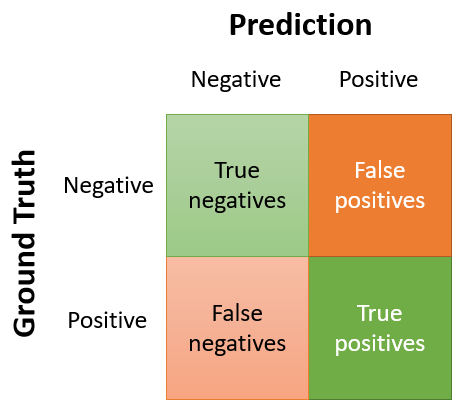

In [224]:
# Podemos extraer los valores de la siguiente forma:
tn, fp, fn, tp = confusion_matrix(y_test2, y_pred_test_2).ravel()
tn, fp, fn, tp

(4209, 159, 849, 430)

 * ***Otra opción para visualizar la matriz según el esquema más común es girar la traspuesta de la matriz***

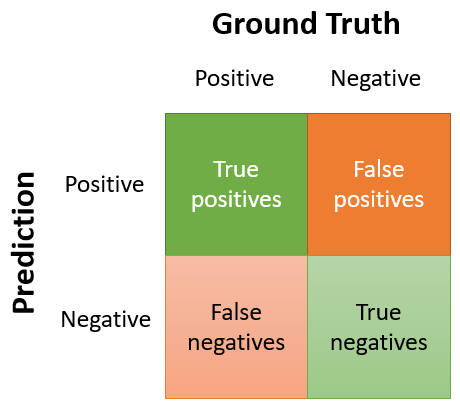

In [225]:
# Imprime la matriz de confusion con las predicciones en las filas y los valores reales en las columnas y la divide en cuatro partes

cm = confusion_matrix(y_test2, y_pred_test_2)
cm= np.flip(cm.T) # Gira la traspuesta de la matriz

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 430  159]
 [ 849 4209]]

True Positives(TP) =  430

True Negatives(TN) =  4209

False Positives(FP) =  159

False Negatives(FN) =  849


La matriz de confusion muestra 431 + 4209 = 4640 predicciones correctas y 848 + 159 = 1007 predicciones incorrectas.

  En nuestro caso, tenemos:

  True Positives (Positivo real:1 y predice Positivo:1) -> 431

  True Negatives (Negativo real:0 y predice Negativo:0) -> 4209

  False Positives (Negativo real:0 pero predice Positivo:1) -> 159 (Error Tipo I)

  False Negatives (Positivo real:1 pero predice Negativo:0) -> 848 (Error Tipo II)

<Axes: >

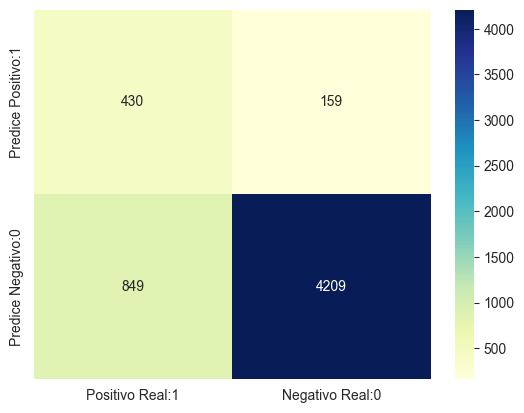

In [226]:
# Visualizamos la matriz de confusion como un mapa de calor

cm_matrix = pd.DataFrame(data=cm, columns=['Positivo Real:1', 'Negativo Real:0'],
                                 index=['Predice Positivo:1', 'Predice Negativo:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

La fila Positivo son aquellos elementos que han sido clasificados como
positivos, y la fila Negativo son los que han sido clasificados como negativos.
Por otro lado, la columna Positivo son los que, en realidad, son positivos, y la columna Negativo los que, en realidad, son negativos (téngase en cuenta que los conceptos de "positivo" o "negativo" son completamente arbitrarios).


---
*En nuestro caso, Falso Positivo (FP) significa que el modelo predijo que llovia pero en realidad no llovio y Falso Negativo (FN) significa que el modelo predijo que no llovia pero en realidad llovio.*

---





# Metricas de Clasificacion

Reporte de clasificación

  El Reporte de clasificación es otra forma de evaluar el rendimiento del modelo de clasificación. Muestra las puntuaciones de **precision**, **recall**, **F1** y **support** del modelo.

In [227]:
# Calcular métricas
accuracy_logreg = accuracy_score(y_test2, y_pred_test_2)
classification_report_logreg = classification_report(y_test2, y_pred_test_2, labels= (1,0))

# Imprimir métricas
print("Métricas para logreg:")
print(f'Accuracy: {accuracy_logreg}')
print("Reporte de clasificación:")
print(classification_report_logreg)


Métricas para logreg:
Accuracy: 0.8214981406056313
Reporte de clasificación:
              precision    recall  f1-score   support

           1       0.73      0.34      0.46      1279
           0       0.83      0.96      0.89      4368

    accuracy                           0.82      5647
   macro avg       0.78      0.65      0.68      5647
weighted avg       0.81      0.82      0.80      5647



Accuracy de Clasificacion

In [228]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
print('TP:',TP, 'TN:',TN, 'FP:',FP, 'FN:',FN)

TP: 430 TN: 4209 FP: 159 FN: 849


In [229]:
# Imprimimos Accuracy de Clasificacion

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Accuracy Clasificacion: {0:0.4f}'.format(classification_accuracy))

Accuracy Clasificacion: 0.8215


Error de Clasificacion
(complemento del accuracy)

In [230]:
# Imprimimos Error de Clasificacion

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Error de Clasificacion : {0:0.4f}'.format(classification_error))

Error de Clasificacion : 0.1785


Precisión

  La precisión se puede definir como el porcentaje de resultados positivos pronosticados correctamente entre todos los resultados positivos pronosticados. Puede expresarse como la relación entre los verdaderos positivos (TP) y la suma de los verdaderos y falsos positivos (TP + FP).

  Entonces, Precision identifica la proporción de **resultados positivos** predichos correctamente. Está más preocupado por la clase positiva que por la clase negativa.

  Matemáticamente, la precisión se puede definir como la relación entre TP y (TP + FP).

In [231]:
# Imprimimos Puntuacion Presicion

precision_logreg = TP / float(TP + FP)

print('Precision : {0:0.4f}'.format(precision_logreg))

Precision : 0.7301


Recall

  Recall se puede definir como el porcentaje de resultados positivos pronosticados correctamente entre todos los resultados positivos reales. Puede expresarse como la relación entre los verdaderos positivos (TP) y la suma de los verdaderos positivos y los falsos negativos (TP + FN). Recall también se llama sensibilidad.

  Entonces, Recall identifica la proporción de **positivos reales** predichos correctamente.

  Matemáticamente, Recall se puede expresar como la relación entre TP y (TP + FN).

In [232]:
recall_logreg = TP / float(TP + FN)

print('Recall o Sensibilidad : {0:0.4f}'.format(recall_logreg))

Recall o Sensibilidad : 0.3362


True Positive Rate (TPR)

  True Positive Rate es sinonimo de Recall

In [233]:
TPR = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(TPR))

True Positive Rate : 0.3362


False Positive Rate

In [234]:
FPR = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(FPR))

False Positive Rate : 0.0364


Puntuación F1

  F1-score es la media armónica de precisión y recuperación. La mejor puntuación F1 posible sería 1,0 y la peor sería 0,0. Proporciona una medida única que combina ambos aspectos del rendimiento del modelo.

  F1 = 2 Precisión x Recall / (Precisión + Recall)


In [235]:
F1score_logreg = 2*precision_logreg*recall_logreg/(precision_logreg+recall_logreg)
print('F1 Score :', F1score_logreg)

F1 Score : 0.4603854389721628


Support (Soporte)

  Soporte es el número de instancias en el conjunto de datos que pertenecen a cada clase. Ayuda a entender cuán representativas son las muestras de cada clase.

## Desbalance de la variable target 'RainTomorrow'

In [236]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.metrics import precision_recall_fscore_support

In [237]:
y_train2.value_counts()

RainTomorrow
0    17394
1     5192
Name: count, dtype: int64

Vemos que los datos correspondientes a la clase target igual a 0 tiene mayor proporcion que la clase igual a 1.

Utilizaremos algunos metodos para tratar el desbalance y ver los cambios.


In [238]:
logistic_model_balanc = LogisticRegression(random_state=42, class_weight='balanced')
logistic_model_balanc.fit(X_train2, y_train2)
y_pred_b = logistic_model_balanc.predict(X_test2)

print("Resultados con regresión logística balanceada\n")
print(classification_report(y_test2, y_pred_b))
print(confusion_matrix(y_test2, y_pred_b))
accuracy_balance = accuracy_score(y_test2, y_pred_b)

Resultados con regresión logística balanceada

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      4368
           1       0.53      0.68      0.60      1279

    accuracy                           0.79      5647
   macro avg       0.71      0.75      0.73      5647
weighted avg       0.81      0.79      0.80      5647

[[3593  775]
 [ 409  870]]


<Axes: >

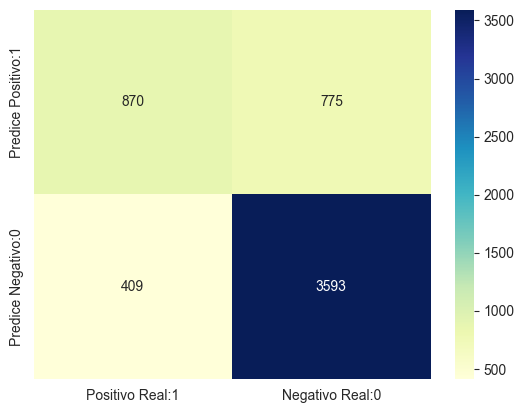

In [239]:
# Visualizamos la matriz de confusion como un mapa de calor
cm_bal = confusion_matrix(y_test2, y_pred_b)
cm_bal= np.flip(cm_bal.T)

cm_matrix = pd.DataFrame(data=cm_bal, columns=['Positivo Real:1', 'Negativo Real:0'],
                                 index=['Predice Positivo:1', 'Predice Negativo:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [240]:
precision_b, recall_b, F1score_b, support_b = precision_recall_fscore_support(y_test2, y_pred_b, average='binary')

Ahora aumentaron los verdaderos positivos. Hubo una mejora en los falsos negativos (disminuyeron), pero la cantidad de falsos positivos ha aumentado, lo que indica que el modelo está prediciendo más días lluviosos cuando en realidad no llueve.

Mejora la precisión de los días que no llueve y disminuye en los que sí. Disminuye el recall en los días que no llueve y aumenta en los que sí. Aumenta el f1-score en los dias que lluve. Disminuye el accuracy. Esto puede ser porque ahora el modelo está capturando mejor los casos de lluvia al darles más peso.

In [241]:
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train2, y_train2)
len(y_resampled[y_resampled==1]), len(y_resampled[y_resampled==0])

(17394, 17394)

In [242]:
logistic_model_over = LogisticRegression(random_state=42)
logistic_model_over.fit(X_resampled, y_resampled)
y_pred_c = logistic_model_over.predict(X_test2)

print("Resultados regresión logística con Oversampling:\n")
print(classification_report(y_test2, y_pred_c))
print(confusion_matrix(y_test2, y_pred_c))
accuracy_over = accuracy_score(y_test2, y_pred_c)

Resultados regresión logística con Oversampling:

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      4368
           1       0.53      0.68      0.60      1279

    accuracy                           0.79      5647
   macro avg       0.71      0.75      0.73      5647
weighted avg       0.81      0.79      0.80      5647

[[3595  773]
 [ 409  870]]


<Axes: >

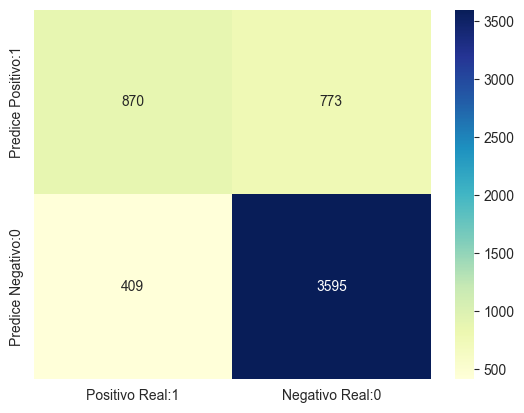

In [243]:
# Visualizamos la matriz de confusion como un mapa de calor
cm_bal = confusion_matrix(y_test2, y_pred_c)
cm_bal= np.flip(cm_bal.T)

cm_matrix = pd.DataFrame(data=cm_bal, columns=['Positivo Real:1', 'Negativo Real:0'],
                                 index=['Predice Positivo:1', 'Predice Negativo:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [244]:
precision_c, recall_c, F1score_c, support_c = precision_recall_fscore_support(y_test2, y_pred_c, average='binary')

Al igual que antes, el oversampling aumenta la cantidad de muestras en la clase minoritaria, lo que puede mejorar la capacidad del modelo para aprender de esa clase y entonces mejorar su capacidad para clasificar correctamente ambas clases. Las metricas son identicas.

### SMOTE

* SMOTE identifica ejemplos de clases minoritarias.
* Para cada ejemplo de clase minoritaria, encuentra sus vecinos más cercanos (otros ejemplos de clases minoritarias se acercan en el espacio de características).
* Luego crea un nuevo ejemplo sintético a lo largo del segmento de línea entre el ejemplo original y uno de sus vecinos. Esto crea nuevos puntos de datos para la clase minoritaria que son similares a los existentes, pero no copias idénticas.

In [245]:
# Define the SMOTE over-sampler
smote = SMOTE(sampling_strategy='minority')

X_resampled2, y_resampled2 = smote.fit_resample(X_train2, y_train2)

In [246]:
y_resampled2.value_counts()

RainTomorrow
1    17394
0    17394
Name: count, dtype: int64

Observamos que SMOTE balanceo las clases de nuestro dataset aumentando las observaciones de la clase minoritaria (RainTomorrow=1)

In [247]:
# Entrenamos un modelo de Regresion Logistica con el dataser sobresampleado
logistic_model_smote = LogisticRegression(random_state=42)
logistic_model_smote.fit(X_resampled2, y_resampled2)
y_pred_d = logistic_model_smote.predict(X_test2)


In [248]:
# Imprime la matriz de confusion con las predicciones en las filas y los valores reales en las columnas y la divide en cuatro partes

print("Resultados regresión logística con Smote:\n")
print(classification_report(y_test2, y_pred_d))
print(confusion_matrix(y_test2, y_pred_d))
accuracy_smote = accuracy_score(y_test2, y_pred_d)

Resultados regresión logística con Smote:

              precision    recall  f1-score   support

           0       0.90      0.83      0.86      4368
           1       0.53      0.68      0.60      1279

    accuracy                           0.79      5647
   macro avg       0.71      0.75      0.73      5647
weighted avg       0.81      0.79      0.80      5647

[[3605  763]
 [ 414  865]]


<Axes: >

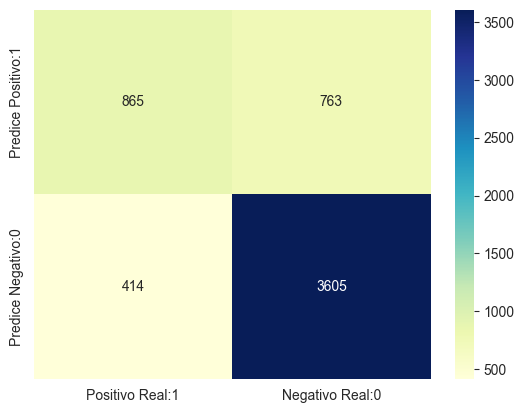

In [249]:
# Visualizamos la matriz de confusion como un mapa de calor
cm_bal = confusion_matrix(y_test2, y_pred_d)
cm_bal= np.flip(cm_bal.T)

cm_matrix = pd.DataFrame(data=cm_bal, columns=['Positivo Real:1', 'Negativo Real:0'],
                                 index=['Predice Positivo:1', 'Predice Negativo:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [250]:
precision_d, recall_d, F1score_d, support_d = precision_recall_fscore_support(y_test2, y_pred_d, average='binary')

Aumenta las predicciones de días lluviosos (aumentan TP y FP). Aumenta los falsos positivos, o sea las predicciones incorrectas de días lluviosos cuando en realidad no llueve. Disminuyen los falsos negativos, las predicciones incorrectas de días no lluviosos cuando en realidad llueve y, por ende, disminuye los verdaderos negativos.

Mejora la precision en los días de lluvia y empeora en los que no, mejora el recall en los días de no lluvia y empeora en los que sí, mejora el f1-score, el accuaracy, macro avg y weighted avg. SMOTE puede ayudar a mejorar la capacidad del modelo para generalizar.

*Otra métrica*

Especificidad: Tasa de verdaderos negativos, es la proporción de verdaderos negativos respecto a la suma de verdaderos negativos y falsos positivos.

In [251]:
def specificity(y_test, y_pred):
    tn = sum((y_test == 0) & (y_pred == 0))
    fp = sum((y_test == 0) & (y_pred == 1))
    return tn / (tn + fp)

In [252]:
spec = specificity(y_test2, y_pred_test_2)
print("Especificidad modelo regresión logística:", spec)
spec_b = specificity(y_test2, y_pred_b)
print("Especificidad modelo regresión logística balanceado:", spec)
spec_c = specificity(y_test2, y_pred_c)
print("Especificidad modelo regresión logística con oversampling:", spec)
spec_d = specificity(y_test2, y_pred_d)
print("Especificidad modelo regresión logística con smote:", spec)

Especificidad modelo regresión logística: 0.9635989010989011
Especificidad modelo regresión logística balanceado: 0.9635989010989011
Especificidad modelo regresión logística con oversampling: 0.9635989010989011
Especificidad modelo regresión logística con smote: 0.9635989010989011


**Preferimos un modelo que tienda a predecir que va a llover aunque se equivoque algunas veces, consideraremos aquel que tenga un menor número de falsos negativos, es decir, aquel que minimice la cantidad de veces que predice que no lloverá cuando en realidad sí lo hace. Por lo que el mejor método es el de peso de clases balanceado (class_weight='balanced') con 409 falsos negativos al igual que oversampling con RandomOversampler. Y la mejor métrica a considerar es el recall, ya que le da importancia a los FN.**

# ROC - AUC

*Curva ROC*

  Otra herramienta para medir visualmente el rendimiento del modelo de clasificación es la curva ROC, que significa Curva característica de funcionamiento (u operativa) del receptor. Una curva ROC es un gráfico que muestra el rendimiento de un modelo de clasificación en varios niveles de umbral de clasificación.

  La curva ROC traza la tasa de verdaderos positivos (TPR) frente a la tasa de falsos positivos (FPR) en varios niveles de umbral.

  La tasa de verdaderos positivos (TPR) también se denomina recuperación. Se define como la relación entre TP y (TP + FN).

  La tasa de falsos positivos (FPR) se define como la relación entre FP y (FP + TN).

  En la curva ROC, nos centraremos en la TPR (tasa de verdaderos positivos) y la FPR (tasa de falsos positivos) de un solo punto. Esto nos dará el rendimiento general de la curva ROC, que consta de TPR y FPR en varios niveles de umbral. Entonces, una curva ROC traza TPR versus FPR en diferentes niveles de umbral de clasificación. Si bajamos los niveles de umbral, es posible que se clasifiquen más elementos como positivos. Aumentará tanto los Verdaderos Positivos (TP) como los Falsos Positivos (FP).

In [253]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, recall_score

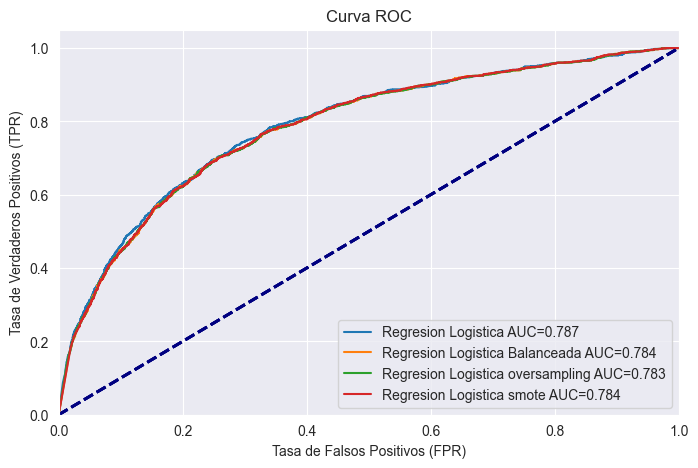

In [254]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

modelos= [model2, logistic_model_balanc, logistic_model_over, logistic_model_smote]

# Funcion para graficar ROC
def plot_roc(ax, y_test, y_pred, model, title):
    # Obtengo las probabilidades de predicción del modelo
    y_test_pred = model.predict_proba(X_test)[:,1]
    # Calculo la ROC y el AUC
    fpr, tpr, thresh = roc_curve(y_test, y_test_pred)
    auc = roc_auc_score(y_test, y_test_pred)
    ax.plot(fpr,tpr,label=f"{title} AUC={auc:.3f}")

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

    ax.set_title('Curva ROC')
    ax.set_xlabel('Tasa de Falsos Positivos (FPR)')
    ax.set_ylabel('Tasa de Verdaderos Positivos (TPR)')
    ax.legend(loc="lower right")

# Graficamos todas las curvas ROC en un solo grafico
fig,ax = plt.subplots(1,1,figsize=(8,5))
plot_roc(ax, y_test2, y_pred_test_2, modelos[0], 'Regresion Logistica')
plot_roc(ax, y_test2, y_pred_b, modelos[1], 'Regresion Logistica Balanceada')
plot_roc(ax, y_test2, y_pred_c, modelos[2], 'Regresion Logistica oversampling')
plot_roc(ax, y_test2, y_pred_d, modelos[3], 'Regresion Logistica smote')


ROC AUC significa Característica operativa del receptor: área bajo curva. Es una técnica para comparar el rendimiento del clasificador. En esta técnica, medimos el área bajo la curva (AUC). Un clasificador perfecto tendrá un ROC AUC igual a 1, mientras que un clasificador puramente aleatorio tendrá un ROC AUC igual a 0,5.

  Entonces, ROC AUC es el porcentaje del gráfico ROC que está debajo de la curva.

  *En nuestro caso, vemos que el modelo de regresion logistica original supero por muy poco la perfomance de los otros modelos*

*Formas de definir umbrales:*

Punto más cercano a (0,1): Maximiza la tasa de verdaderos positivos mientras minimizas la tasa de falsos positivos, puedes seleccionar el umbral que esté más cerca de la esquina superior izquierda del gráfico ROC.

Máximo índice Youden: El índice Youden (J) se define como TPR + TNR - 1, donde TNR es la tasa de verdaderos negativos. Útil cuando tengo métricas específicas que deseas maximizar.

Máximo valor de F1-score: Encontrar el punto en la curva ROC donde F1-score es máximo. Comprensión equilibrada y completa del rendimiento del modelo.

(Investigado en un artículo en la web que se basaba en "Threshold selection for ROC Curves" Fawcett, T. (2006). An introduction to ROC analysis.)

In [255]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train2, y_train2)

y_probs = logistic_model.predict_proba(X_test2)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test2, y_probs)
roc_auc = roc_auc_score(y_test2, y_probs)

# Punto más cercano a (0,1)
closest_point = np.argmin(np.sqrt(fpr**2 + (1 - tpr)**2))
umbral_1 = thresholds[closest_point]

# Máximo índice Youden
youden_index = tpr - fpr
max_youden_index = np.argmax(youden_index)
umbral_3 = thresholds[max_youden_index]

# Máximo valor de F1-score
f1_scores = [f1_score(y_test2, (y_probs > thr).astype(int)) for thr in thresholds]
max_f1_index = np.argmax(f1_scores)
umbral_4 = thresholds[max_f1_index]

In [256]:
# Función para evaluar el modelo con un umbral específico
def evaluar_umbral(umbral):
    y_pred = (y_probs > umbral).astype(int)
    recall = recall_score(y_test2, y_pred)
    report = classification_report(y_test2, y_pred)
    return recall, report, umbral

resultados = {
    "Punto más cercano a (0,1)": evaluar_umbral(umbral_1),
}

for metodo, (recall, report, umbral) in resultados.items():
    print(f"Resultados con umbral seleccionado por {metodo}:")
    print(f"Umbral: {umbral}")
    print(f"Recall: {recall}")
    print(f"Reporte de clasificación:\n{report}")
    print("\n")



Resultados con umbral seleccionado por Punto más cercano a (0,1):
Umbral: 0.18826131033562615
Recall: 0.7490226739640344
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.91      0.76      0.83      4368
           1       0.48      0.75      0.59      1279

    accuracy                           0.76      5647
   macro avg       0.70      0.76      0.71      5647
weighted avg       0.81      0.76      0.78      5647





In [257]:
resultados = {
    "Máximo índice Youden": evaluar_umbral(umbral_3),
    "Máximo F1-score": evaluar_umbral(umbral_4)
}

for metodo, (recall, report, umbral) in resultados.items():
    print(f"Resultados con umbral seleccionado por {metodo}:")
    print(f"Umbral: {umbral}")
    print(f"Recall: {recall}")
    print(f"Reporte de clasificación:\n{report}")
    print("\n")

Resultados con umbral seleccionado por Máximo índice Youden:
Umbral: 0.20945118086110667
Recall: 0.7208756841282252
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.91      0.79      0.85      4368
           1       0.51      0.72      0.59      1279

    accuracy                           0.78      5647
   macro avg       0.71      0.76      0.72      5647
weighted avg       0.82      0.78      0.79      5647



Resultados con umbral seleccionado por Máximo F1-score:
Umbral: 0.26812523579488867
Recall: 0.6356528537920251
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88      4368
           1       0.58      0.64      0.61      1279

    accuracy                           0.81      5647
   macro avg       0.73      0.75      0.74      5647
weighted avg       0.82      0.81      0.82      5647





ROC AUC: 0.8310609608009921


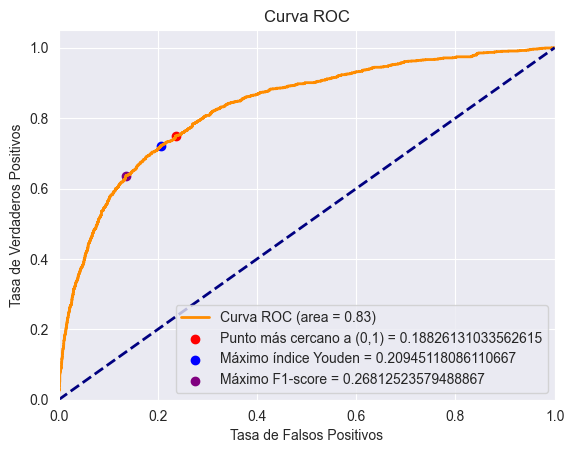

In [258]:
# AUC de la curva ROC
print("ROC AUC:", roc_auc)

# Curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter(fpr[closest_point], tpr[closest_point], color='red', label=f"Punto más cercano a (0,1) = {umbral_1}")
plt.scatter(fpr[max_youden_index], tpr[max_youden_index], color='blue', label=f"Máximo índice Youden = {umbral_3}")
plt.scatter(fpr[max_f1_index], tpr[max_f1_index], color='purple', label=f"Máximo F1-score = {umbral_4}")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


Usaremos el umbral Máximo F1-score para tener mas verdaderos positivos y recall.

In [259]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train2, y_train2)

y_probs = logistic_model.predict_proba(X_test2)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test2, y_probs)
roc_auc = roc_auc_score(y_test2, y_probs)

# Definir los umbrales
umbral_deseado1 = 0.5
umbral_deseado2 = [f1_score(y_test2, (y_probs > thr).astype(int)) for thr in thresholds]
max_f1_index = np.argmax(umbral_deseado2)
umbral_deseado2 = thresholds[max_f1_index]

y_pred_umbral1 = (y_probs > umbral_deseado1).astype(int)
y_pred_umbral2 = (y_probs > umbral_deseado2).astype(int)

# Calculo accuracy con los umbrales ajustados
accuracy_umbral1 = accuracy_score(y_test2, y_pred_umbral1)
accuracy_umbral2 = accuracy_score(y_test2, y_pred_umbral2)

print("Precisión con umbral ajustado 0.5:", accuracy_umbral1)
print("\nReporte de clasificación con umbral ajustado 0.5:")
print(classification_report(y_test2, y_pred_umbral1))

print("Precisión con umbral ajustado Máximo F1-score:", accuracy_umbral2)
print(f"Umbral: {umbral_1}")
print("\nReporte de clasificación con umbral ajustado Máximo F1-score:")
print(classification_report(y_test2, y_pred_umbral2))

Precisión con umbral ajustado 0.5: 0.8214981406056313

Reporte de clasificación con umbral ajustado 0.5:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4368
           1       0.73      0.34      0.46      1279

    accuracy                           0.82      5647
   macro avg       0.78      0.65      0.68      5647
weighted avg       0.81      0.82      0.80      5647

Precisión con umbral ajustado Máximo F1-score: 0.8126438817071011
Umbral: 0.18826131033562615

Reporte de clasificación con umbral ajustado Máximo F1-score:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88      4368
           1       0.58      0.64      0.61      1279

    accuracy                           0.81      5647
   macro avg       0.73      0.75      0.74      5647
weighted avg       0.82      0.81      0.82      5647



Considerablemente el umbral 0.18826131033562615 como el mejor, con el recall mas alto para la clase 1 de 0.64, un F1.score igual a 0.61 para la clase 1 y un accuracy igual a 0.81.

### *¿Logramos un buen fitting?*

Precision:
- Clase 0 (No lluvia): 0.83
- Clase 1 (Lluvia): 0.73

  El 83% de los días predichos como "no lluvia" realmente no llovieron y el 73% de los días predichos como "lluvia" realmente llovieron.

Recall:
- Clase 0 (No lluvia): 0.86
- Clase 1 (Lluvia): 0.64

  El 86% de los días que realmente no llovieron fueron predichos correctamente y el 64% de los días que realmente llovieron fueron predichos correctamente como "lluvia".

F1-Score:
- Clase 0 (No lluvia): 0.89
- Clase 1 (Lluvia): 0.46

Un F1-score de 0.89 para los días sin lluvia y de 0.46 para los días con lluvia sugiere un buen equilibrio entre precisión y recall para ambas clases.

Accuracy: 0.81
Una exactitud del 81% indica que el modelo predice correctamente el 81% de los días.

Macro Avg:
- Precision: 0.73
- Recall: 0.75
- F1-score: 0.74
Visión general del rendimiento del modelo sin tener en cuenta el desequilibrio entre las clases.

Weighted Avg:
- Precision: 0.81
- Recall: 0.82
- F1-score: 0.80
Visión del rendimiento del modelo considerando el desequilibrio de clases.

### Conclusión:

La prioridad es minimizar los falsos negativos, es decir, predecir que va a llover incluso si se equivoca, entonces analizamos el recall, que para la clase de lluvia es alto.

### ***6.	Implementar un modelo base para clasificación y uno para regresión***

*Regresión*

In [260]:
from sklearn.metrics import r2_score

In [261]:
y_train_mean = np.mean(y_train)
y_pred_mean = np.full_like(y_test, y_train_mean)

mse_mean = mean_squared_error(y_test, y_pred_mean)
r2_mean = r2_score(y_test, y_pred_mean)

print("Predicción base usando la media:")
print(f"Mean Squared Error: {mse_mean}")
print(f"R^2 Score: {r2_mean}")

Predicción base usando la media:
Mean Squared Error: 43.36183223782903
R^2 Score: -0.00026096324476276855


Mean Squared Error: vale 43.36, indicando que las predicciones del modelo se desvían de los valores reales por aproximadamente 43.36 unidades al cuadrado.

R^2 Score: es muy cercano a 0, lo que sugiere que el modelo no es capaz de explicar la variabilidad en los datos de forma significativa.

En resumen, este modelo base que usa la media como predicción no está proporcionando resultados significativos.

*Clasificación*

In [262]:
class_majority = np.bincount(y_train2).argmax()

# Predicción usando clase mayoritaria
y_pred_majority = np.full_like(y_test2, class_majority)

accuracy_majority = accuracy_score(y_test2, y_pred_majority)
conf_matrix_majority = confusion_matrix(y_test2, y_pred_majority)
class_report_majority = classification_report(y_test2, y_pred_majority)

print("Predicción base usando la clase mayoritaria:")
print(f"Accuracy: {accuracy_majority}")
print("\nConfusion Matrix:")
print(conf_matrix_majority)
print("\nClassification Report:")
print(class_report_majority)

Predicción base usando la clase mayoritaria:
Accuracy: 0.7735080573755977

Confusion Matrix:
[[4368    0]
 [1279    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      4368
           1       0.00      0.00      0.00      1279

    accuracy                           0.77      5647
   macro avg       0.39      0.50      0.44      5647
weighted avg       0.60      0.77      0.67      5647



Accuracy: el 77% de las predicciones son correctas

Matriz de Confusión: el modelo predice correctamente todas las instancias de la clase mayoritaria (0), pero no predice ninguna instancia de la clase minoritaria (1).

Informe de Clasificación: La precisión para la clase mayoritaria (0) es del 77%. El recall para la clase mayoritaria es del 100%, lo que indica que el modelo identifica correctamente todas las instancias de esta clase. El f1-score para la clase mayoritaria es del 87%. Mientras que para la clase minoritaria la precisión, el recall y el f1-score es del 0%.


### ***7.	Optimizacion la seleccion de hiperparametros***

*Validación cruzada*

In [263]:
from sklearn.model_selection import cross_val_score

In [264]:
X1 = np.concatenate((X_train, X_test), axis=0)
y1 = np.concatenate((y_train, y_test), axis=0)

In [265]:
for col_idx in range(X1.shape[1]):
    if np.issubdtype(X1[:, col_idx].dtype, np.datetime64):
        X1[:, col_idx] = np.array([x.timestamp() if pd.notnull(x) else np.nan for x in X1[:, col_idx]])

if np.issubdtype(y1.dtype, np.datetime64):
    y1 = np.array([x.timestamp() if pd.notnull(x) else np.nan for x in y1])

In [266]:
# Validación cruzada regresión lineal
scores = cross_val_score(model, X1, y1, cv=5, scoring='neg_mean_squared_error')
rmse_scores_regresionlineal_val = np.sqrt(-scores)
print("RMSE promedio, resultado de la validación cruzada de regresión lineal 5:", rmse_scores_regresionlineal_val.mean())

# Validación cruzada regresión lineal
scores = cross_val_score(model, X1, y1, cv=10, scoring='neg_mean_squared_error')
rmse_scores_regresionlineal_val = np.sqrt(-scores)
print("RMSE promedio, resultado de la validación cruzada de regresión lineal 10:", rmse_scores_regresionlineal_val.mean())


# Validación cruzada gradiente descendiente
scores = cross_val_score(sgd_model, X1, y1, cv=5, scoring='neg_mean_squared_error')
rmse_scores_gradientedesc_val = np.sqrt(-scores)
print("RMSE promedio, resultado de la validación cruzada gradiente descendiente 5:", rmse_scores_gradientedesc_val.mean())

# Validación cruzada gradiente descendiente
scores = cross_val_score(sgd_model, X1, y1, cv=10, scoring='neg_mean_squared_error')
rmse_scores_gradientedesc_val = np.sqrt(-scores)
print("RMSE promedio, resultado de la validación cruzada gradiente descendiente 10:", rmse_scores_gradientedesc_val.mean())


# Validación cruzada Ridge
scores = cross_val_score(modelo_ridge, X1, y1, cv=5, scoring='neg_mean_squared_error')
rmse_scores_ridge_val = np.sqrt(-scores)
print("RMSE promedio, resultado de la validación cruzada Ridge 5:", rmse_scores_ridge_val.mean())

# Validación cruzada Ridge
scores = cross_val_score(modelo_ridge, X1, y1, cv=10, scoring='neg_mean_squared_error')
rmse_scores_ridge_val = np.sqrt(-scores)
print("RMSE promedio, resultado de la validación cruzada Ridge 10:", rmse_scores_ridge_val.mean())


# Validación cruzada Lasso
scores = cross_val_score(modelo_lasso, X1, y1, cv=5, scoring='neg_mean_squared_error')
rmse_scores_lasso_val = np.sqrt(-scores)
print("RMSE promedio, resultado de la validación cruzada Lasso:", rmse_scores_lasso_val.mean())

# Validación cruzada Lasso
scores = cross_val_score(modelo_lasso, X1, y1, cv=10, scoring='neg_mean_squared_error')
rmse_scores_lasso_val = np.sqrt(-scores)
print("RMSE promedio, resultado de la validación cruzada Lasso 10:", rmse_scores_lasso_val.mean())


# Validación cruzada Ridge
scores = cross_val_score(modelo_elastic, X1, y1, cv=5, scoring='neg_mean_squared_error')
rmse_scores_elastic_val = np.sqrt(-scores)
print("RMSE promedio, resultado de la validación cruzada Elastic Net:", rmse_scores_elastic_val.mean())

# Validación cruzada Ridge
scores = cross_val_score(modelo_elastic, X1, y1, cv=10, scoring='neg_mean_squared_error')
rmse_scores_elastic_val = np.sqrt(-scores)
print("RMSE promedio, resultado de la validación cruzada Elastic Net 10:", rmse_scores_elastic_val.mean())

RMSE promedio, resultado de la validación cruzada de regresión lineal 5: 5.655694478311466
RMSE promedio, resultado de la validación cruzada de regresión lineal 10: 5.646559710904967
RMSE promedio, resultado de la validación cruzada gradiente descendiente 5: 5.67872458593355
RMSE promedio, resultado de la validación cruzada gradiente descendiente 10: 5.647399595655462
RMSE promedio, resultado de la validación cruzada Ridge 5: 5.65544004585369
RMSE promedio, resultado de la validación cruzada Ridge 10: 5.64639670246582
RMSE promedio, resultado de la validación cruzada Lasso: 5.656553124471927
RMSE promedio, resultado de la validación cruzada Lasso 10: 5.647904919777156
RMSE promedio, resultado de la validación cruzada Elastic Net: 5.656030622998417
RMSE promedio, resultado de la validación cruzada Elastic Net 10: 5.646524769719723


In [267]:
rmse_test, rmse_sgd_test, rmse_ridge_test, rmse_lasso_test, rmse_elas_test

(5.852900827843206,
 5.8669096770712335,
 5.855043209721483,
 5.859172596196957,
 5.860859816677365)

Si comparo con el resultado de las regresiones del inicio el RMSE es mayor que con validación cruzada con cv=5. Vuelve a disminuir al usar cv=10.
El menor de todos estos es RMSE promedio, resultado de la validación cruzada Ridge 10: 5.64639670246582. Entonces posteriormente optimizaremos este método.

### Clasificación

In [268]:
X2 = np.concatenate((X_train2, X_test2), axis=0)
y2 = np.concatenate((y_train2, y_test2), axis=0)

In [269]:
scores1 = cross_val_score(logistic_model, X2, y2, cv=5, scoring='accuracy')
print("Accuracy promedio modelo logistico cv5:", scores1.mean())

scores2 = cross_val_score(logistic_model, X2, y2, cv=10, scoring='accuracy')
print("Accuracy promedio modelo logistico cv10:", scores2.mean())


scores3 = cross_val_score(logistic_model_balanc, X2, y2, cv=5, scoring='accuracy')
print("Accuracy promedio modelo logistico balanceado cv5:", scores3.mean())

scores4 = cross_val_score(logistic_model_balanc, X2, y2, cv=10, scoring='accuracy')
print("Accuracy promedio  modelo logistico balanceado cv10:", scores4.mean())


scores5 = cross_val_score(logistic_model_over, X2, y2, cv=5, scoring='accuracy')
print("Accuracy promedio modelo logístico con oversampling cv5:", scores5.mean())

scores6 = cross_val_score(logistic_model_over, X2, y2, cv=10, scoring='accuracy')
print("Accuracy promedio  modelo logistico oversampling cv10:", scores6.mean())


scores7 = cross_val_score(logistic_model_smote, X2, y2, cv=5, scoring='accuracy')
print("Accuracy promedio modelo logistico con smote cv5:", scores7.mean())

scores8 = cross_val_score(logistic_model_smote, X2, y2, cv=10, scoring='accuracy')
print("Accuracy promedio modelo logistico con smote cv10 :", scores8.mean())

Accuracy promedio modelo logistico cv5: 0.8229020001341155
Accuracy promedio modelo logistico cv10: 0.8241061635553362
Accuracy promedio modelo logistico balanceado cv5: 0.7588286621550406
Accuracy promedio  modelo logistico balanceado cv10: 0.7591115422786721
Accuracy promedio modelo logístico con oversampling cv5: 0.8229020001341155
Accuracy promedio  modelo logistico oversampling cv10: 0.8241061635553362
Accuracy promedio modelo logistico con smote cv5: 0.8229020001341155
Accuracy promedio modelo logistico con smote cv10 : 0.8241061635553362


In [270]:
# Valores Accuracy de los modelos de clasificacion sin validacion cruzada
accuracy_logreg, accuracy_balance, accuracy_over, accuracy_smote

(0.8214981406056313, 0.790331149282805, 0.7906853196387462, 0.7915707455285993)

En este caso vemos que el accuracy de la validación del modelo de regresion logística balanceado (classweight= 'balanced') disminuyó al hacer validación cruzada, pero en los demás métodos aumentó, siendo los Accuracy promedio de los modelos todos iguales: 0.8241415617765442 con cv=10.

*Hiperparámetros de Ridge:*
- Valores de alpha para validación cruzada: Grid Search. Grid Search es efectivo aquí porque normalmente se prueban valores bien definidos y discretos de alphas.

- fit_intercept: Grid Search. Son hiperparámetros booleanos, por lo que las combinaciones posibles son pocas y Grid Search es manejable.

(fuentes:​ MachineLearningMastery.com)

In [271]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

param_grid = {
    'ridge__alpha': np.logspace(-10, 10, 200),
    'ridge__fit_intercept': [True, False]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)


print("Mejores hiperparámetros:", grid_search.best_params_)
y_pred = grid_search.predict(X_test)

rmse_optimizado = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE en el conjunto de prueba:", rmse_optimizado)

Mejores hiperparámetros: {'ridge__alpha': 460.5922041145113, 'ridge__fit_intercept': True}
RMSE en el conjunto de prueba: 5.858319182645603


El RMSE sin optimizar parámetros era 5.646578390055047, vemos que aumentó muy poco pero aumentó. Por lo que podemos considerar levemente mejor al modelo sin optimizar.

*Hiperparámetros del modelo Logístico balanceado y Validación Cruzada de 5*
- C: Parámetro de regularización.
- penalty: Término (tipo) de regularización.
Optimización de Hiperparámetros: Grid Search. Asegura una búsqueda exhaustiva en un espacio de búsqueda manejable.

In [272]:
logistic_model_balanced = LogisticRegression(class_weight='balanced', random_state=42)
logistic_model_balanced.fit(X_train2, y_train2)

# Realiza predicciones en el conjunto de prueba
y_pred_balanced = logistic_model_balanced.predict(X_test2)

# Imprime los resultados
print("Resultados regresión logística balanceada:\n")
print(classification_report(y_test2, y_pred_balanced))
print(confusion_matrix(y_test2, y_pred_balanced))
accuracy_balanced = accuracy_score(y_test2, y_pred_balanced)

# Define la cuadrícula de hiperparámetros a explorar
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
}

# Configura la búsqueda en cuadrícula con validación cruzada
grid_search_balanced = GridSearchCV(estimator=logistic_model_balanced, param_grid=param_grid, cv=10, scoring='accuracy', refit=True)
grid_search_balanced.fit(X_train2, y_train2)

# Imprime los mejores resultados
best_accuracy_balanced = grid_search_balanced.best_score_
best_params_balanced = grid_search_balanced.best_params_

print("Mejor accuracy con regresión logística balanceada:", best_accuracy_balanced)
print("Mejores hiperparámetros con regresión logística balanceada:", best_params_balanced)

# Obtiene el mejor estimador
best_estimator_balanced = grid_search_balanced.best_estimator_

# Realiza predicciones en el conjunto de prueba utilizando el mejor estimador
y_pred_balanced_optimized = best_estimator_balanced.predict(X_test2)

# Imprime los resultados
print("\nResultados regresión logística balanceada optimizada:\n")
print(classification_report(y_test2, y_pred_balanced_optimized))
print(confusion_matrix(y_test2, y_pred_balanced_optimized))
accuracy_balanced_optimized = accuracy_score(y_test2, y_pred_balanced_optimized)

print("Accuracy con regresión logística balanceada optimizada:", accuracy_balanced_optimized)

Resultados regresión logística balanceada:

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      4368
           1       0.53      0.68      0.60      1279

    accuracy                           0.79      5647
   macro avg       0.71      0.75      0.73      5647
weighted avg       0.81      0.79      0.80      5647

[[3593  775]
 [ 409  870]]
Mejor accuracy con regresión logística balanceada: 0.756263578693787
Mejores hiperparámetros con regresión logística balanceada: {'C': 0.01, 'penalty': 'l2'}

Resultados regresión logística balanceada optimizada:

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      4368
           1       0.53      0.68      0.60      1279

    accuracy                           0.79      5647
   macro avg       0.71      0.75      0.73      5647
weighted avg       0.81      0.79      0.80      5647

[[3589  779]
 [ 407  872]]
Accuracy con regresión logística b

El modelo sin optimizar dió una precisión del 53% (en la clase = 1) optimizado y sin optimizar, lo mismo con el recall, lo que indica que no hubo modificaciones.

### ***8.	Implementar Explicabilidad del modelo***

In [273]:
!pip install shap

import shap
np.random.seed(101)
shap.initjs()

Defaulting to user installation because normal site-packages is not writeable


* Tenemos nuestro modelos de regresion ya entrenados a los cuales se les implementara explicabilidad del modelo

In [274]:
modelo_ridge
modelo_ridge2 = modelo_ridge.named_steps['ridgecv']

In [275]:
feature_names=X_train.columns.values
feature_names

array(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'RainToday', 'Temperature',
       'Pressure', 'Humidity', 'Cloud'], dtype=object)

In [276]:
# Crea un objeto explainer SHAP para ambos problemas 
explainer1 = shap.Explainer(modelo_ridge2, X_train, feature_names= feature_names) # regresion
explainer2 = shap.Explainer(logistic_model_balanc, X_train2, feature_names= feature_names) # clasificacion

In [277]:
# Calcula los valores SHAP para un conjunto de ejemplos de prueba
shap_values1 = explainer1(X_test) # regresion
shap_values2 = explainer2(X_test2) # clasificacion

In [278]:
shap_values1.shape, shap_values2.shape

((5647, 16), (5647, 16))

In [279]:
expected_value1 = explainer1.expected_value
expected_value2 = explainer2.expected_value
expected_value1, expected_value2

(21.02426918861975, -0.2934964828687916)

## Interpretabilidad local sobre una determinada instancia

Explicar las predicciones para instancias individuales de los datos se conoce como interpretabilidad local . SHAP explica cómo se llegan a las predicciones individuales en términos de contribuciones de cada una de las variables de entrada del modelo. Este es un enfoque altamente intuitivo que produce resultados simples pero informativos.

* *Modelo regresion*

In [280]:
index=1

In [281]:
model.predict(X_test)[index]

2.9863455786082023

In [282]:
shap_values1[index]

.values =
array([ 8.58759747e-02,  5.11412168e-02, -3.06967825e+00, -1.99210071e+00,
       -3.16664761e+00, -6.76478956e-02,  6.82057555e+01,  3.17095072e-01,
       -1.14588090e-01, -7.68244234e+00, -1.12184213e+01, -1.07227455e-01,
        1.40155306e-01, -1.90379301e-01, -8.74429533e-01,  2.95672811e-02])

.base_values =
21.02426918861975

.data =
array([ 10.7,  20.7,   0. ,  17. ,   9.1,   7. ,  98. ,   3. ,  14. ,
        37. ,  46. ,   0. ,   4.5,  -2.1, -20. ,   0. ])

In [283]:

explanation1 = shap.Explanation(values=shap_values1[index], base_values=explainer1.expected_value, feature_names=feature_names)

El diagrama de cascada (waterfall) traza la visualización más completa de una **única predicción**. Explica las contribuciones subyacentes de cada característica a la predicción en el conjunto de datos. La estructura en cascada enfatiza la naturaleza aditiva de los contribuyentes positivos y negativos, y cómo se basan en el valor base para generar la predicción del modelo, f(x). El valor actual de las variables aparecen al lado del nombre de las mismas

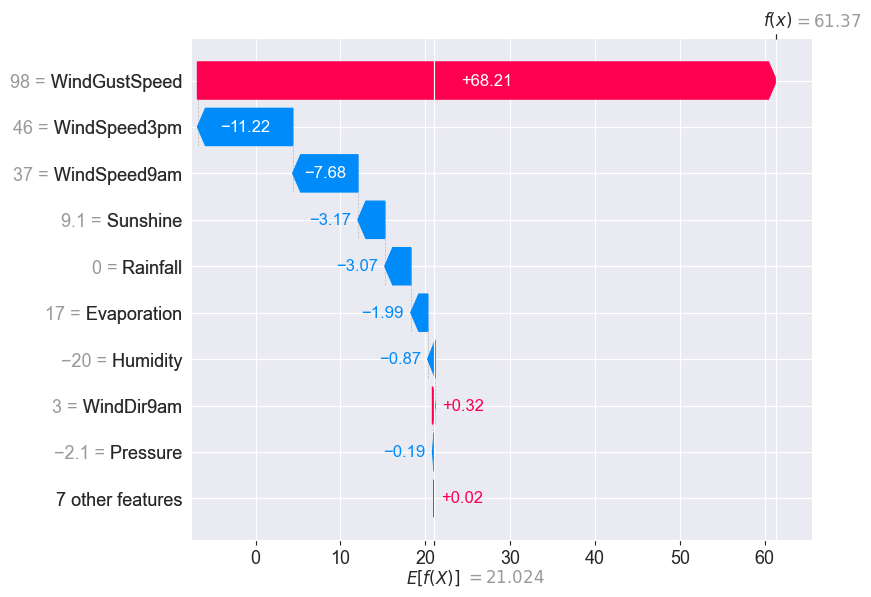

In [284]:
shap.plots.waterfall(explanation1)

El SHAP value cuantifica la cantidad y direccion en la cual cada variable impacta en la cantidad de lluvia predicha.
Los SHAP values dentro de las flechas rojas corresponden a las variables de entrada que impulsan al modelo hacia la predicción de una lluvia mas alta, mientras que los que estan dentro de las flechas azules impulsan hacia predicciones mas bajas.
***La prediccion final es valor base (base value) mas las suma de todos los valores SHAP.***

**En nuestro caso, para esta instancia, la variables mas importantes son 'WindGustSpeed'("empuja" positivamente), 'WindSpeed3pm' y 'WindSpeed9am' (lo hacen negativamente). Mientras que las menos importantes son ese conjunto de '7 other features' que muestra el grafico entre las que se encuentran las temperaturas, otras direcciones del viento, etc'**

Mientras que los gráficos en cascada son amplios y no escatiman en detalles al explicar una predicción, los gráficos de fuerza (force plot) son representaciones equivalentes que muestran la información clave en un formato más condensado.

En un force plot las variables que empujan a la prediccion hacia valores mas altos aparecen a la izquierda en rojo, mientras que las que empujan hacia valores mas bajos aparecen a la derecha en azul. El valor actual de las variables aparecen al lado del nombre de las mismas. Variables con valores SHAP mas grandes (mayor impacto) tienen flechas mas largas.

In [285]:
ind = 1
shap.initjs()
shap.plots.force(shap_values1[ind])

Comprobamos nuevamente las 3 variables con mayor importancia en la prediccion ('WindGustSpeed', 'WindSpeed3pm' y 'WindSpeed9am').

Otra forma de graficar localmente para una instancia determinada.

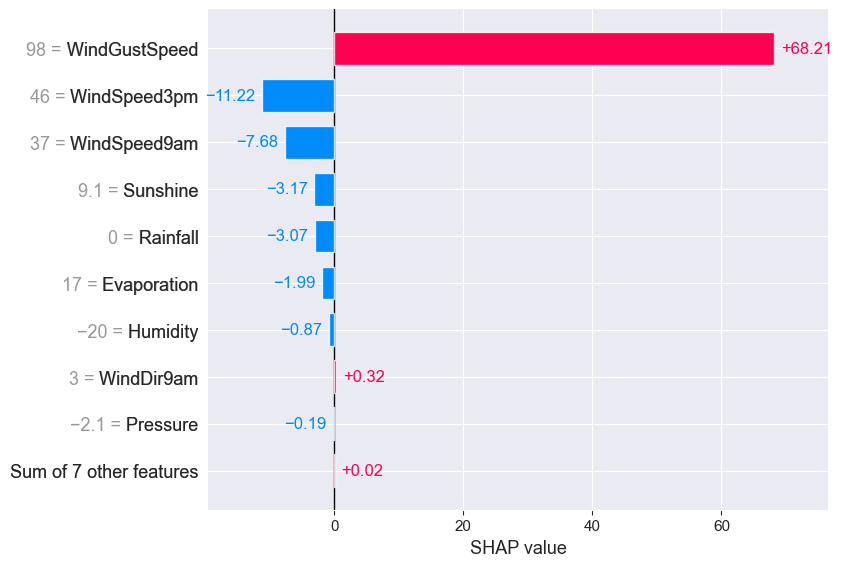

In [286]:
shap.plots.bar(explanation1)

Podemos deducir que WindGustSpeed tiene la mayor contribución y positiva a la explicabilidad del modelo (en esta instancia en particular).

* *Modelo clasificación*

In [287]:
index=2

In [288]:
logistic_model_balanc.predict(X_test2)[index]

1

In [289]:
shap_values2[index]

.values =
array([ 0.52470478, -0.6261673 , -0.10467153, -0.72262502, -0.54925793,
        0.0033305 ,  3.1108324 ,  0.08082002,  0.06884447, -0.55446585,
       -0.25675936, -0.21637592, -0.14056391, -0.05947029,  0.10194448,
        0.32999845])

.base_values =
-0.2934964828687916

.data =
array([ 1.40091633,  2.16682522, -0.31789418,  3.49770372,  0.5995061 ,
       -0.17386944,  3.954149  , -0.99898068,  1.32217189,  2.26540737,
        2.86692898, -0.54661907,  2.02840055,  0.09594993,  0.28296681,
        1.58732025])

In [290]:
explanation2 = shap.Explanation(values=shap_values2[index], base_values=explainer2.expected_value, feature_names=feature_names)

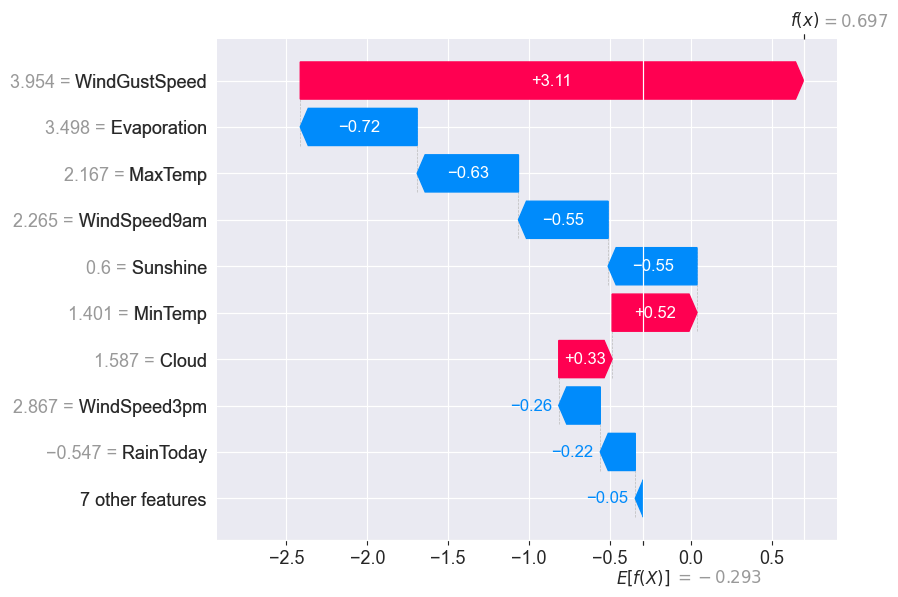

In [291]:
shap.plots.waterfall(explanation2)

**En nuestro caso, para esta instancia, la variables mas importantes son 'WindGustSpeed'("empuja" positivamente), mientras que 'Evaporation', 'Maxtemp','WindSpeed9am' y 'Sunshine' (lo hacen negativamente). Mientras que las menos importantes son ese conjunto de '7 other features' que muestra el grafico entre las que se encuentran las otras temperaturas, otras direcciones del viento, etc'**

Otra forma de graficar los SHAP values para esta instancia. Se representa el valor SHAP de cada variable y el caracter de su aporte (positivo o negativo).

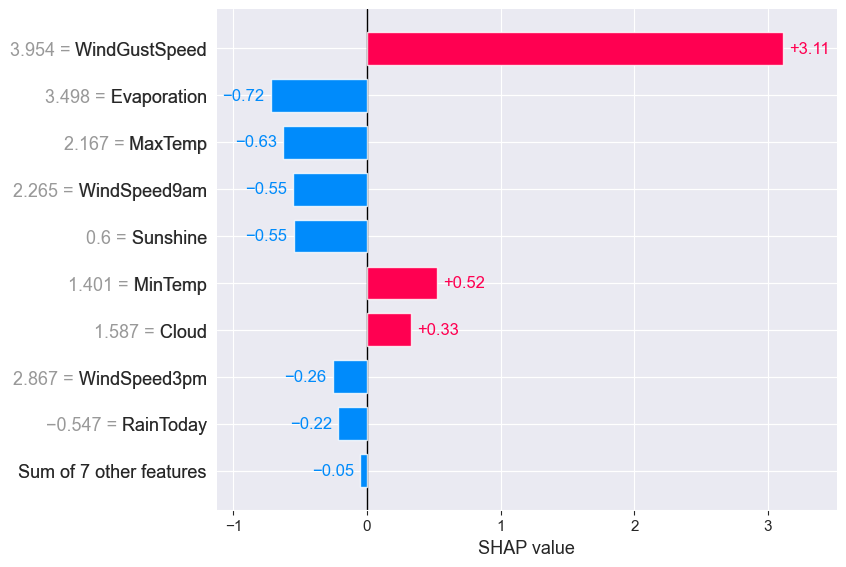

In [292]:
shap.plots.bar(explanation2)

## Interpretabilidad global

El objetivo de los métodos de interpretación global es describir el comportamiento esperado de un modelo de aprendizaje automático con respecto a la distribución completa de valores de sus variables de entrada. Con SHAP, esto se logra agregando los valores SHAP para instancias individuales en toda la población.

In [293]:
explanation1 = shap.Explanation(values=shap_values1, base_values=explainer1.expected_value, feature_names=feature_names, data=X_test)
explanation2 = shap.Explanation(values=shap_values2, base_values=explainer2.expected_value, feature_names=feature_names, data=X_test2)

El punto de partida más sencillo para la interpretación global con SHAP es examinar el valor SHAP absoluto medio para cada característica en todos los datos. Esto cuantifica, en promedio, la magnitud (positiva o negativa) de la contribución de cada característica a los precios de la vivienda previstos. Las características con valores SHAP absolutos medios más altos son más influyentes

Regresion

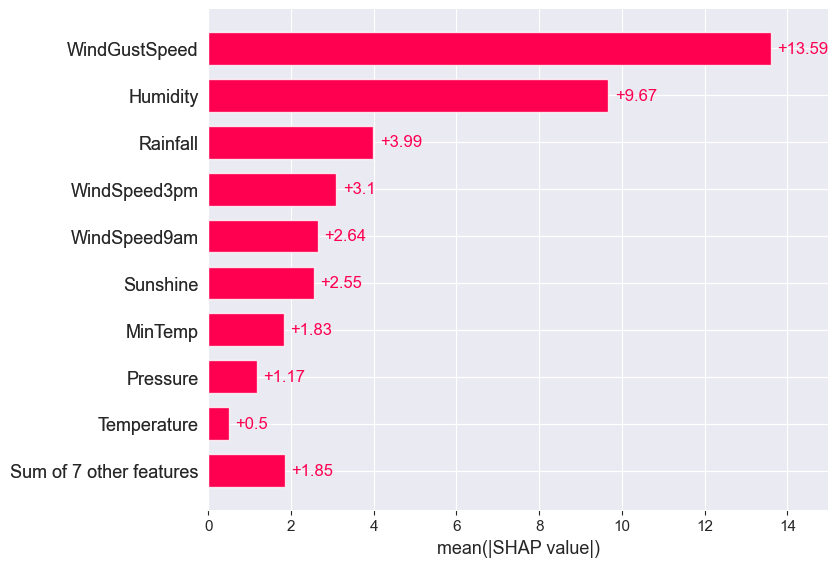

In [294]:
shap.plots.bar(explanation1)

Las variables son rankeadas de arriba hacia abajo de acuerdo al valor absoluto medio de los SHAP values **para el dataset completo**., es decir la magnitud promedio del impacto de cada variable en la prediccion de la variable target, en todas las intancias.
Los valores SHAP absolutos medios son, en promedio, cuanto impacta cada variable en la prediccion, en la direccion positiva o negativa.

**Aquí vemos que 'WindGustSpeed' es la variable más influyente, contribuyendo en promedio ± 13.59  a la cantidad de lluvia ('RainFallTomorrow'). Por el contrario, la variables menos informativas, son 'Temperature', aporta sólo ± 0.5 y un conjunto de otras 7 variables que aportan 1.85.**

Los gráficos de Beeswarm (enjambre de abejas) son una visualización más compleja y rica en información de valores SHAP que revelan no solo la importancia relativa de las características, sino también sus relaciones reales con el resultado previsto.

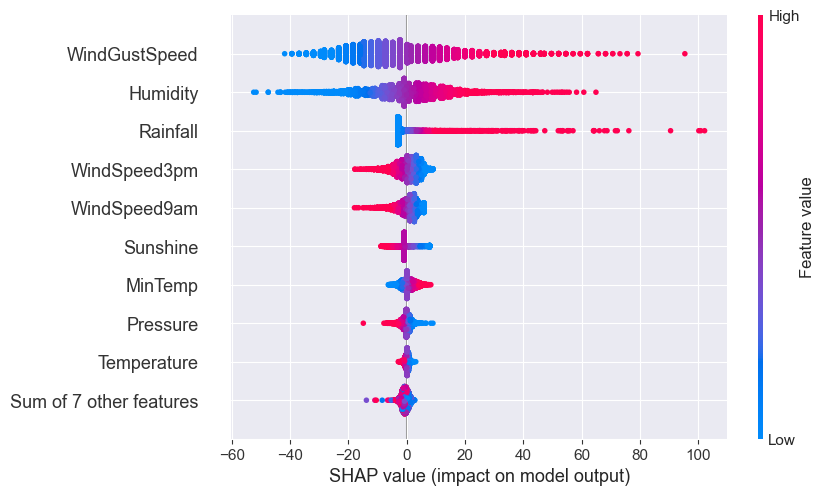

In [295]:
shap.plots.beeswarm(explanation1)

El ranking de las variables es el mismo que en el grafico de barras. En Beeswarm plot, para cada variable, cada instancia (es decir cada fila) del dataset aparece como un punto. Los puntos se distribuyen a los largo del eje x de acuesdo a su valor SHAP. En los lugares donde hay alta densidad de valores SHAP, los puntos se apilan verticalmente.
Examinando como se distribuyen los valores SHAP revela como una variable puede influenciar las prediciones del modelo.
La barra de colores corresponde al valor bruto (no confundir con el SHAP value)de cada variable en cada instancia (punto) del grafico

Observamos que en el caso de la variable 'WindGustSpeed' a valores mas altos de la misma conduce a predicciones mas altas de lluvia ('RainFallTomorrow') y a valores mas bajos el aporte es menor.

Clasificacion

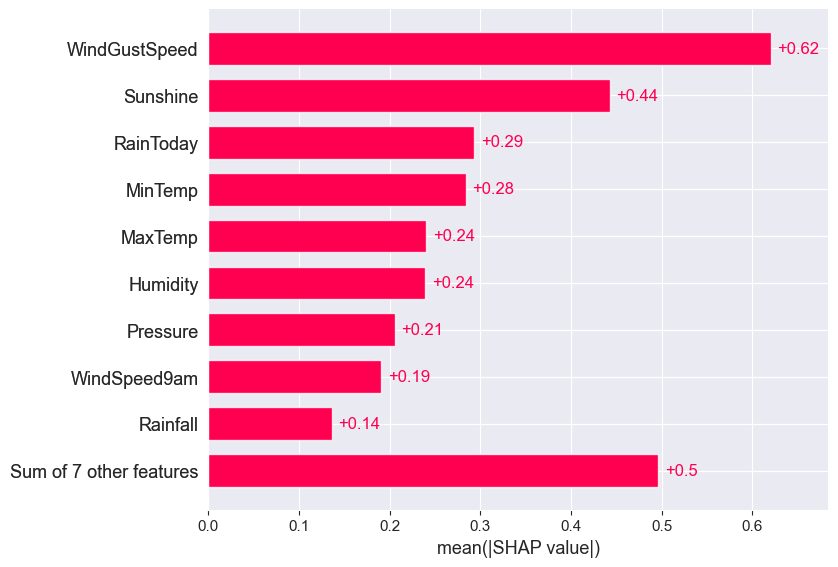

In [296]:
shap.plots.bar(explanation2)

**Aquí vemos que 'WindGustSpeed' es la variable más influyente en la prediccion de si va a llover o no mañana ('RainTomorrow'). Por el contrario, la variables menos informativas, son 'Rainfall', aporta sólo ± 0.14 y un otras 7 variables que en conjunto aportan 0.2.**

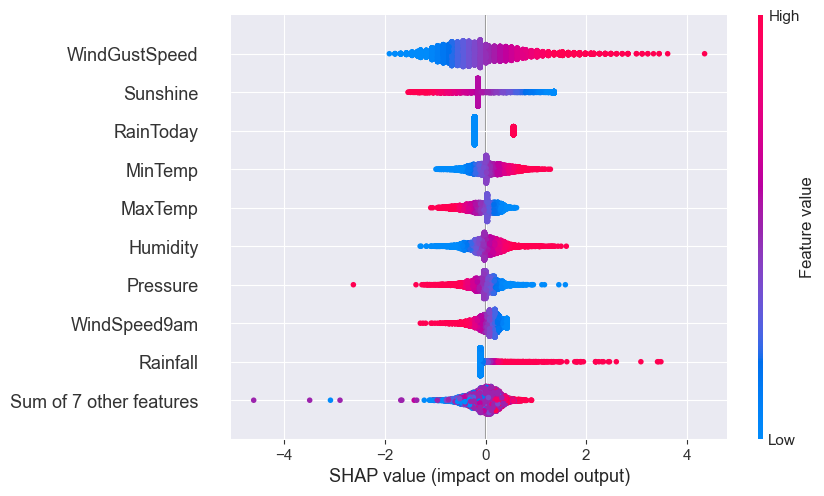

In [297]:
shap.plots.beeswarm(explanation2)

Observamos que en el caso de la variable 'WindGustSpeed' a valores mas altos de la misma conduce a que haya mas probabilidad de lluvia mañana ('RainTomorrow') y a valores mas bajos el aporte es menor. En cambio, en el caso de la variable 'Pressure' a valores mas bajos de la misma conduce a que haya mas probabilidad de lluvia mañana ('RainTomorrow') y a valores mas altos el aporte es menor

## **Conclusión**
* Observamos que para regresión en el caso de la variable 'WindGustSpeed' a valores mas altos de la misma conduce a predicciones mas altas de lluvia ('RainFallTomorrow') y a valores mas bajos el aporte es menor.
* En el caso de clasificación los datos de WindGustSpeed son los que mas contribuyen a la explicación del modelo, al igual que en el caso de regresión. Luego le siguen Sushine, RainToday y MinTemp en clasificación y Humedity, Rainfall y WindSpeed3pm en regresión.

Para ambos modelos la variable mas influyente es 'WindGustSpeed'.



---

## ***ENTREGA Nº 3***
***PUNTOS 9-10 DEL ENUNCIADO***


---



### ***9.	Implementar las soluciones con una red neuronal***

### * Problema Regresion


















In [298]:
import tensorflow as tf
tf.compat.v1.enable_eager_execution()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical

import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt


In [299]:
# Hacemos una copia de los conjuntos de entrenamiento y test ya preporocesados para el problema de regresion
X_train3= X_train.copy()
y_train3= y_train.copy()
X_test3= X_test.copy()
y_test3= y_test.copy()

In [300]:
print("Tamaño set de entrenamiento:",X_train3.shape)
print("Tamaño set de prueba:",X_test3.shape)

Tamaño set de entrenamiento: (22586, 16)
Tamaño set de prueba: (5647, 16)


In [301]:
#Entrenamiento y validación con relación 90:10
x_train3, x_val3, y_train3, y_val3 = train_test_split(X_train3,y_train3, test_size=0.1, random_state=2020)

In [302]:
model_reg = tf.keras.Sequential([
   tf.keras.layers.Dense(16, activation='relu', input_shape=(16,)),
   tf.keras.layers.Dense(1, activation='sigmoid')
])
model_reg.compile(optimizer='adam', loss='mean_squared_error')

print(model_reg.summary())
# Observamos el tipo, cantidad de neuronas y la cantidad de parametros de cada capa y el total de parametros

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

None


In [303]:
# Entrenamos la red neuronal de regresion
loss_history = model_reg.fit(x_train3,y_train3, validation_data = (x_val3,y_val3),epochs=10, batch_size=64)

Epoch 1/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 44.3470 - val_loss: 37.6647
Epoch 2/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 35.7478 - val_loss: 37.6065
Epoch 3/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 35.9462 - val_loss: 37.6012
Epoch 4/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 36.6924 - val_loss: 37.5499
Epoch 5/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 43.6637 - val_loss: 37.5166
Epoch 6/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 41.4626 - val_loss: 37.4907
Epoch 7/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 35.0234 - val_loss: 37.4989
Epoch 8/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 39.7786 - val_loss: 37.5075
Epoch 9/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 40.6227 - val_loss: 37.4952
Epoch 10/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 37.1906 - val_loss: 37.4978


In [304]:
loss_history.history # con activacion 'relu' y 'sigmoid' en capa de salida

{'loss': [40.125221252441406,
  39.554351806640625,
  39.483787536621094,
  39.448326110839844,
  39.436588287353516,
  39.43315887451172,
  39.4332389831543,
  39.430335998535156,
  39.429935455322266,
  39.425357818603516],
 'val_loss': [37.66470718383789,
  37.606510162353516,
  37.601165771484375,
  37.549930572509766,
  37.51663589477539,
  37.49073791503906,
  37.49886703491211,
  37.50749588012695,
  37.495174407958984,
  37.497825622558594]}

Vemos que con activacion 'relu' en la capa oculta y en la de salida la perdida disminuyo respecto que utilizar sigmoid o combinacion de ambas.

Probamos con mas capas ocultas , mas neuronas en cada una y mas epocas. Verificamos el valor de la perdida.

In [307]:
model_reg = tf.keras.Sequential([
   tf.keras.layers.Dense(32, activation='relu', input_shape=(16,)),
   tf.keras.layers.Dense(32, activation='relu'),
   tf.keras.layers.Dense(1, activation='relu')
])
model_reg.compile(optimizer='adam', loss='mean_squared_error')
# Imprimimos la cantidad de parámetros a modo de ejemplo
print(model_reg.summary())
# Observamos el tipo, cantidad de neuronas y la cantidad de parametros de cada capa y el total de parametros

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,633 (6.38 KB)

 Trainable params: 1,633 (6.38 KB)

 Non-trainable params: 0 (0.00 B)

None


In [308]:
# Entrenamos nuevamente la red neuronal de regresion
loss_history = model_reg.fit(x_train3,y_train3, validation_data = (x_val3,y_val3),epochs=50, batch_size=64)

Epoch 1/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 49.4435 - val_loss: 29.0200
Epoch 2/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 30.9287 - val_loss: 27.3601
Epoch 3/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 30.1694 - val_loss: 27.2568
Epoch 4/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 30.1913 - val_loss: 26.7888
Epoch 5/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 28.4017 - val_loss: 26.9484
Epoch 6/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 27.0939 - val_loss: 27.0554
Epoch 7/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 29.7393 - val_loss: 26.5865
Epoch 8/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 25.7562 - val_loss: 26.7674
Epoch 9/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 25.3251 - val_loss: 26.7241
Epoch 10/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 27.2004 - val_loss: 26.5395
Epoch 11/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 27.3464 - val_loss: 26.2884
Epoch 12/50
318/318 ━━━━━━━━━━

In [309]:
# Observamos la evolucion de los valores del 'loss'
loss_history.history['loss']  # con activacion 'relu' y 'relu' en capa de salida

[37.84550094604492,
 30.412784576416016,
 29.308643341064453,
 28.635663986206055,
 28.569501876831055,
 28.352397918701172,
 27.97147560119629,
 27.52429962158203,
 27.437742233276367,
 27.265180587768555,
 27.23700714111328,
 26.88998031616211,
 26.843114852905273,
 26.580469131469727,
 26.42116928100586,
 26.419767379760742,
 26.18409538269043,
 26.14544677734375,
 26.21914291381836,
 25.933025360107422,
 26.04969596862793,
 25.81784439086914,
 25.660566329956055,
 25.44333839416504,
 25.38829231262207,
 25.17053985595703,
 25.178913116455078,
 25.177268981933594,
 24.980846405029297,
 24.832136154174805,
 24.83819580078125,
 24.806377410888672,
 24.779104232788086,
 24.73619270324707,
 24.516759872436523,
 24.366104125976562,
 24.498754501342773,
 24.259889602661133,
 24.22450828552246,
 24.055133819580078,
 24.101932525634766,
 23.88461685180664,
 24.2391300201416,
 23.885833740234375,
 23.72802734375,
 23.610637664794922,
 23.69460678100586,
 23.594207763671875,
 23.4650154113769

Finalmente entrenamos con 300 epocas

In [310]:
# Entrenamos la red neuronal de regresion con mas epocas
loss_history_300 = model_reg.fit(x_train3,y_train3, validation_data = (x_val3,y_val3),epochs=300, batch_size=64)

Epoch 1/300
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 24.0535 - val_loss: 28.4085
Epoch 2/300
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 23.4170 - val_loss: 28.5310
Epoch 3/300
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 22.3148 - val_loss: 27.2417
Epoch 4/300
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 22.1468 - val_loss: 29.4273
Epoch 5/300
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.7466 - val_loss: 27.8976
Epoch 6/300
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21.5079 - val_loss: 27.8047
Epoch 7/300
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 25.8699 - val_loss: 27.8698
Epoch 8/300
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 24.5226 - val_loss: 28.4787
Epoch 9/300
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.3241 - val_loss: 27.3927
Epoch 10/300
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 21.3391 - val_loss: 28.4091
Epoch 11/300
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.9045 - val_loss: 26.7320
Epoch 12/300
318/31

In [311]:
# AHORA OBSERVAMOS QUE AL ENTRENAR CON 300 EPOCAS DISMINUYO EL VALOR DEL 'LOSS'
loss_history_300.history['loss']

[23.3193416595459,
 23.122356414794922,
 23.403696060180664,
 22.92252540588379,
 23.01658821105957,
 22.77589225769043,
 22.750621795654297,
 22.715492248535156,
 22.56817626953125,
 22.651437759399414,
 22.515338897705078,
 22.444931030273438,
 22.432695388793945,
 22.242759704589844,
 21.994064331054688,
 21.9936580657959,
 22.07311248779297,
 21.966276168823242,
 22.120521545410156,
 21.874399185180664,
 21.74892234802246,
 21.682233810424805,
 21.748138427734375,
 21.687639236450195,
 21.39383316040039,
 21.4473876953125,
 21.173612594604492,
 21.265838623046875,
 21.236736297607422,
 21.29380989074707,
 21.095060348510742,
 21.128780364990234,
 21.130401611328125,
 20.65969467163086,
 20.945009231567383,
 20.791913986206055,
 20.834074020385742,
 20.601455688476562,
 20.37892723083496,
 20.59168243408203,
 20.50658416748047,
 20.537038803100586,
 20.384138107299805,
 20.265979766845703,
 20.25504493713379,
 20.24650001525879,
 20.190221786499023,
 19.927886962890625,
 20.11432647

In [312]:
# Observamos el valor de la perdida correspondiente a la ultima epoca
loss_history_300.history['loss'][-1]

14.957130432128906

Vemos que el valor de la perdida va disminuyendo cada vez mas a medida que aumentamos la cantidad de capas, de neuronas por capa y el número de iteraciones (epochs) de entrenamiento. El algoritmo modifica los pesos de tal forma que pueda ajustarse adecuadamente a los datos.

* Optimizacion de hiperparametros

  Elegimos el metodo Optuna para hallar los mejores hiperparametros. Esto es posible gracias a la optimización bayesiana que utiliza este metodo, que muestrea parámetros aleatorios en el espacio de búsqueda, y en base a eso actualiza la distribución de probabilidad de la función objetivo después de cada prueba basándose en los resultados dados por los parámetros muestreados.









In [313]:
!pip install optuna
import optuna

Defaulting to user installation because normal site-packages is not writeable


In [314]:
def objective(trial):

    num_layers = trial.suggest_int('num_layers', 1, 3)
    model = Sequential()

    for i in range(num_layers):
        num_units = trial.suggest_int(f'n_units_layer_{i}', 4, 128) # la cantidad de neuronas de cada capa tambien se puede pasar como hiperparámetro
        # activations = trial.suggest_categorical(f'')
        model.add(Dense(num_units, activation='relu')) # capas densas con activacion ReLU

    # capa de salida
    model.add(Dense(1, activation='linear')) # 1 capa de salida

    # compilar
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

    # entrenar
    epochs = trial.suggest_int('epochs', 10, 100)
    batch_size = trial.suggest_int('batch_size', 256, 512)

    # entrenar
    model.fit(x_train3, y_train3, validation_data=(x_val3, y_val3), epochs=epochs, batch_size=batch_size, verbose=0)

    # evaluar
    score = model.evaluate(x_val3, y_val3, verbose=0)
    return score[1]

# crear un estudio de Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# obtener los mejores hiperparámetros
best_params = study.best_params
print("Best parámetros encontrados:", best_params)


[I 2024-06-23 13:34:57,279] A new study created in memory with name: no-name-775e6cfc-d261-42fe-9230-ec50c9c11739
[I 2024-06-23 13:35:05,103] Trial 0 finished with value: 26.512277603149414 and parameters: {'num_layers': 2, 'n_units_layer_0': 87, 'n_units_layer_1': 69, 'epochs': 35, 'batch_size': 322}. Best is trial 0 with value: 26.512277603149414.
[I 2024-06-23 13:35:17,624] Trial 1 finished with value: 25.329078674316406 and parameters: {'num_layers': 3, 'n_units_layer_0': 126, 'n_units_layer_1': 41, 'n_units_layer_2': 116, 'epochs': 53, 'batch_size': 451}. Best is trial 1 with value: 25.329078674316406.
[I 2024-06-23 13:35:31,914] Trial 2 finished with value: 27.033279418945312 and parameters: {'num_layers': 1, 'n_units_layer_0': 8, 'epochs': 88, 'batch_size': 308}. Best is trial 1 with value: 25.329078674316406.
[I 2024-06-23 13:35:47,845] Trial 3 finished with value: 26.591365814208984 and parameters: {'num_layers': 3, 'n_units_layer_0': 8, 'n_units_layer_1': 25, 'n_units_layer_2

Best parámetros encontrados: {'num_layers': 3, 'n_units_layer_0': 126, 'n_units_layer_1': 41, 'n_units_layer_2': 116, 'epochs': 53, 'batch_size': 451}


Creamos el modelo definitivo con los mejores hiperparametros encontrados

In [315]:
num_layers = best_params['num_layers']
epochs = best_params['epochs']
batch_size = best_params['batch_size']
optimizer = best_params.get('optimizer', 'adam')
loss = 'mean_squared_error'
metrics = [tf.keras.metrics.RootMeanSquaredError()]

output_units = best_params.get('output_units', 1)
output_activation = 'linear'
model_reg = Sequential()
for i in range(num_layers):
   num_units = best_params[f'n_units_layer_{i}']
   model_reg.add(Dense(num_units, activation='relu'))

model_reg.add(Dense(output_units, activation=output_activation))
model_reg.compile(optimizer=optimizer, loss=loss, metrics=metrics)
history_optuna= model_reg.fit(x_train3, y_train3, validation_data=(x_val3, y_val3), epochs=epochs, batch_size=batch_size, verbose=0)

In [316]:
print(model_reg.summary())

Model: "sequential_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_177 (Dense)               │ (None, 126)            │         2,142 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_178 (Dense)               │ (None, 41)             │         5,207 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_179 (Dense)               │ (None, 116)            │         4,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_180 (Dense)               │ (None, 1)              │           117 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,016 (144.60 KB)

 Trainable params: 12,338 (48.20 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 24,678 (96.40 KB)

None


In [317]:
history_optuna.history['loss'][-1] # Valor del MSE de la ultima epoca de entrenamiento

21.54420280456543

In [318]:
# Valor del RMSE de la ultima epoca de entrenamiento
history_optuna.history['val_root_mean_squared_error'][-1]

5.254669666290283

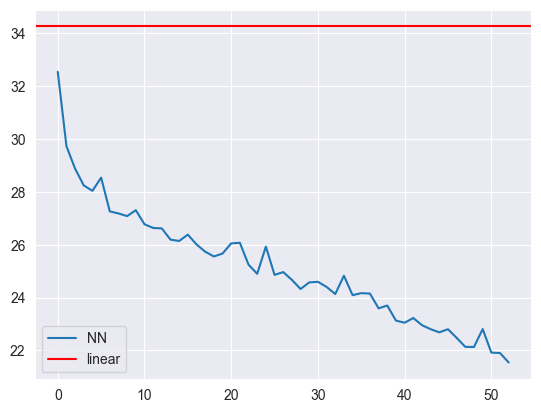

In [319]:
# Graficamos el MSE del primer modelo de regresion lineal vs modelo red neuronal
plt.plot(history_optuna.history['loss'], label='NN')
plt.axhline(rmse_test**2, color='red', label='linear',linestyle = '-')
plt.legend()
plt.show()

Vemos las predicciones del modelo para el set de train y test y calculamos el error

In [320]:
from sklearn import metrics
best_params = study.best_params
print(best_params)

y_pred_train3 = model_reg.predict(x_train3)
y_pred_test3 = model_reg.predict(X_test3)

rmse_nn_train = mean_squared_error(y_train3, y_pred_train3, squared = False)
rmse_nn_test = mean_squared_error(y_test3, y_pred_test3, squared = False)

print(f"El error rmse_nn_train es: {rmse_nn_train}")
print(f"El error rmse_nn_test es: {rmse_nn_test}")

R2_nn_train = metrics.r2_score(y_train3, y_pred_train3)
print(f"El valor de R2_nn_train: {R2_nn_train}")
R2_nn_test = metrics.r2_score(y_test3, y_pred_test3)
print(f"El valor de R2_nn_test: {R2_nn_test}")

{'num_layers': 3, 'n_units_layer_0': 126, 'n_units_layer_1': 41, 'n_units_layer_2': 116, 'epochs': 53, 'batch_size': 451}
636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
El error rmse_nn_train es: 4.573396650569433
El error rmse_nn_test es: 5.541931596085483
El valor de R2_nn_train: 0.45918011852372476
El valor de R2_nn_test: 0.2915193109726685


In [321]:
predictions = model_reg.predict(X_test3.iloc[[0]].values)
print("Predicciones:", predictions.flatten())
print("Valores Test:", y_test3.iloc[[0]].values)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicciones: [0.8573273]
Valores Test: [0.]


## Problema Clasificacion

Del punto 5 del presente TP (Implementar la solución del problema de clasificación con regresión logística) tenemos los siguienetes conjuntos de entrenamiento y test, ya estandarizados:

In [322]:
X_train4= X_train2.copy()
y_train4= y_train2.copy()
X_test4= X_test2.copy()
y_test4= y_test2.copy()

In [323]:
X_train4.shape, y_train4.shape, X_test4.shape, y_test4.shape

((22586, 16), (22586,), (5647, 16), (5647,))

* Red neuronal de una capa oculta

In [324]:
#Entrenamiento y validación con relación 90:10
x_train4, x_val4, Y_train4, y_val4 = train_test_split(X_train4,y_train4, test_size=0.1, random_state=2020)

print("Shape of x_train:",x_train4.shape)
print("Shape of x_test:",X_test4.shape)
print("Shape of x_val:",x_val4.shape)
print("Shape of y_train:",Y_train4.shape)
print("Shape of y_test:",y_test4.shape)
print("Shape of y_val:",y_val4.shape)

Shape of x_train: (20327, 16)
Shape of x_test: (5647, 16)
Shape of x_val: (2259, 16)
Shape of y_train: (20327,)
Shape of y_test: (5647,)
Shape of y_val: (2259,)


In [325]:
model_clas = tf.keras.Sequential([
   tf.keras.layers.Dense(16, activation='relu', input_shape=(16,)),
   tf.keras.layers.Dense(1, activation='sigmoid')
])
model_clas.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.Recall()])

print(model_clas.summary())
# Observamos el tipo, cantidad de neuronas y la cantidad de parametros de cada capa y el total de parametros

Model: "sequential_53"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_181 (Dense)               │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_182 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

None


* La función de pérdida 'binary_crossentropy' mide la disimilitud entre la
distribución de probabilidad prevista por el modelo para las dos clases (0 y 1) y la distribución real de las etiquetas en los datos. En otras palabras, indica qué tan "lejos" están las predicciones del modelo de la distribución real de las clases
* Interpretación de los valores de la función de pérdida:

  *Valores cercanos a 0*: Indican un buen ajuste del modelo, lo que significa que las predicciones del modelo son consistentes con las etiquetas reales.
  
  *Valores altos*: Indican un mal ajuste del modelo, lo que significa que las predicciones del modelo se alejan significativamente de las etiquetas reales.

In [326]:
model_clas.fit(x_train4,Y_train4, validation_data = (x_val4,y_val4),epochs=10, batch_size=64)

Epoch 1/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5492 - recall: 0.4500 - val_loss: 0.4036 - val_recall: 0.4577
Epoch 2/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4130 - recall: 0.4211 - val_loss: 0.3844 - val_recall: 0.4577
Epoch 3/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3980 - recall: 0.4614 - val_loss: 0.3785 - val_recall: 0.4617
Epoch 4/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3978 - recall: 0.4493 - val_loss: 0.3757 - val_recall: 0.4556
Epoch 5/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3923 - recall: 0.4445 - val_loss: 0.3725 - val_recall: 0.4597
Epoch 6/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3823 - recall: 0.4645 - val_loss: 0.3712 - val_recall: 0.4859
Epoch 7/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3903 - recall: 0.4576 - val_loss: 0.3702 - val_recall: 0.4879
Epoch 8/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3793 - recall: 0.4820 - val_loss: 0.3701 - val_recall: 0.4899
Epoch 9/

Las metricas 'recall' no han cambiado mucho, por lo que la red no está aprendiendo. La funcion de perdida presenta un valor de aprox. 0.38.


Se aumentará la cantidad de capas ocultas para añadir funciones no lineales que permitan hacer una mejor clasificación y obtener un mejor accuracy y loss.

Red neuronal de 2 capas ocultas

In [327]:
model_clas = tf.keras.Sequential([
   tf.keras.layers.Dense(32, activation='relu', input_shape=(16,)),
   tf.keras.layers.Dense(32, activation='relu'),
   tf.keras.layers.Dense(1, activation='sigmoid')
])
model_clas.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.Recall()])
# Imprimimos la cantidad de parámetros a modo de ejemplo
print(model_clas.summary())
# Observamos el tipo, cantidad de neuronas y la cantidad de parametros de cada capa y el total de parametros

Model: "sequential_54"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_183 (Dense)               │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_184 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_185 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,633 (6.38 KB)

 Trainable params: 1,633 (6.38 KB)

 Non-trainable params: 0 (0.00 B)

None


In [328]:
model_clas.fit(x_train4,Y_train4, validation_data = (x_val4,y_val4),epochs=50, batch_size=64)

Epoch 1/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4936 - recall_1: 0.3196 - val_loss: 0.3785 - val_recall_1: 0.4718
Epoch 2/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3962 - recall_1: 0.4635 - val_loss: 0.3707 - val_recall_1: 0.5000
Epoch 3/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3907 - recall_1: 0.4729 - val_loss: 0.3676 - val_recall_1: 0.4355
Epoch 4/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3840 - recall_1: 0.4666 - val_loss: 0.3667 - val_recall_1: 0.5504
Epoch 5/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3768 - recall_1: 0.4807 - val_loss: 0.3674 - val_recall_1: 0.5282
Epoch 6/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3667 - recall_1: 0.4667 - val_loss: 0.3620 - val_recall_1: 0.4718
Epoch 7/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3823 - recall_1: 0.4812 - val_loss: 0.3608 - val_recall_1: 0.4859
Epoch 8/50
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3695 - recall_1: 0.4727 - val_loss: 0.3611

En el desempeño con el set de prueba (al aumentar las capas, las neuronas y las epocas) sigue reduciendose la funcion de perdida y la metrica aumento su valor, siendo bueno por lo cual realizaremos un entrenamiento con un mayor número de epocas.

In [329]:
history_clas = model_clas.fit(x_train4,Y_train4, validation_data = (x_val4,y_val4),epochs=200, batch_size=64)

Epoch 1/200
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3494 - recall_1: 0.5284 - val_loss: 0.3589 - val_recall_1: 0.5060
Epoch 2/200
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3421 - recall_1: 0.5338 - val_loss: 0.3606 - val_recall_1: 0.4960
Epoch 3/200
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3419 - recall_1: 0.5480 - val_loss: 0.3578 - val_recall_1: 0.5161
Epoch 4/200
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3321 - recall_1: 0.5437 - val_loss: 0.3615 - val_recall_1: 0.5363
Epoch 5/200
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3398 - recall_1: 0.5530 - val_loss: 0.3590 - val_recall_1: 0.5141
Epoch 6/200
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3324 - recall_1: 0.5420 - val_loss: 0.3614 - val_recall_1: 0.5302
Epoch 7/200
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3293 - recall_1: 0.5537 - val_loss: 0.3607 - val_recall_1: 0.5101
Epoch 8/200
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3381 - recall_1: 0.5393 - val_loss

El siguiente paso es probar este mismo modelo con información que la red nunca haya visto (set de prueba)

In [330]:
result = model_clas.evaluate(X_test4,y_test4)
for i in range(len(model_clas.metrics_names)):
 print("Metric ",model_clas.metrics_names[i],":",
str(round(result[i],2)))

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4127 - recall_1: 0.4943
Metric  loss : 0.44
Metric  compile_metrics : 0.48


### Evaluación del modelo clasificacion

La red ha logrado mejorar un poco su desempeño con más epocas de entrenamiento. Finalmente vamos a evaluar gráficamente el desempeño de la función de pérdidas y la presición a traves de cada época de entrenamiento con el fin de validar algun posible sobre-entrenamiento (*overfitting*).

P.D.: Una indicación de que existe *overfitting* es cuando a medida de que se va aumentando la complejidad de la red neuronal, la función de coste del set de entrenamiento se ajusta muchísimo a la función de coste del set de prueba, y luego estas dos funciones comienzan a diverger [🔗](https://www.notion.so/mariajosemv/Redes-neuronales-en-Keras-y-ScikitLearn-b8fcf479b0464021bb85d1b2a8863404#8c1bc491b78b49b99643b321ff29334d).



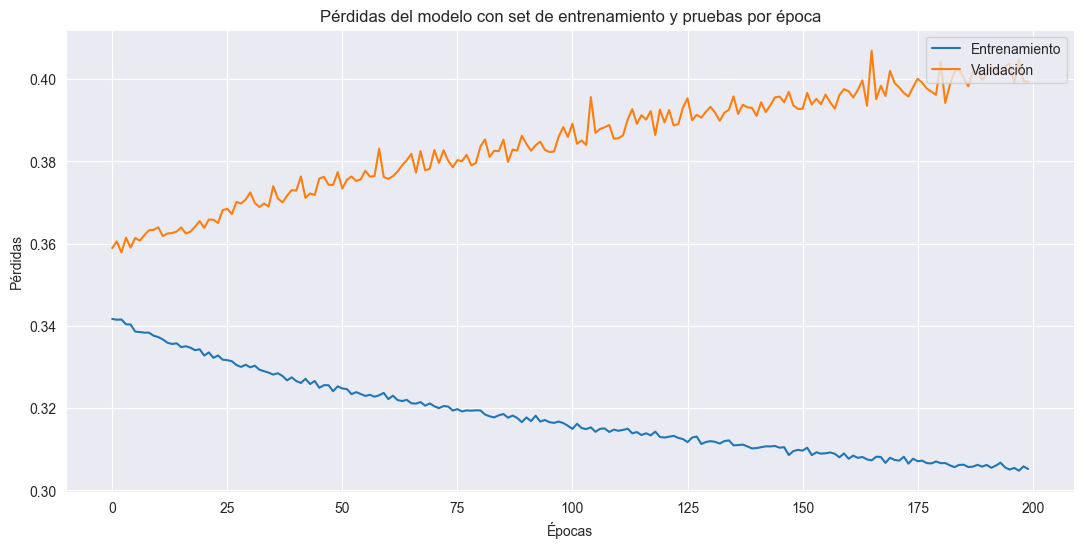

In [331]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(13,6))
plt.plot(history_clas.history['loss'])
plt.plot(history_clas.history['val_loss'])
plt.title("Pérdidas del modelo con set de entrenamiento y pruebas por época")
plt.ylabel('Pérdidas')
plt.xlabel('Épocas')
plt.legend(['Entrenamiento', 'Validación'], loc='upper right')
plt.show()

Se puede apreciar que la función de pérdida disiminuye a medida que aumenta el número de Épocas con la información de entrenamiento, pero no con la de validación que aumenta. La separación entre estas dos líneasdel (loss y val_loss) puede que indique la presencia de sobre ajuste por lo que se puede afirmar que el desempeño del modelo no es satisfactorio.

La separación del loss y val_loss en un modelo de regresión lineal con red neuronal es una señal de alerta que indica un posible sobreajuste. Al implementar estrategias de regularización, parada temprana, aumento de datos o reducción de la complejidad del modelo, se puede mitigar el sobreajuste y mejorar la generalización del modelo a nuevos datos no vistos.

In [332]:
print(history_clas.history.keys())

dict_keys(['loss', 'recall_1', 'val_loss', 'val_recall_1'])


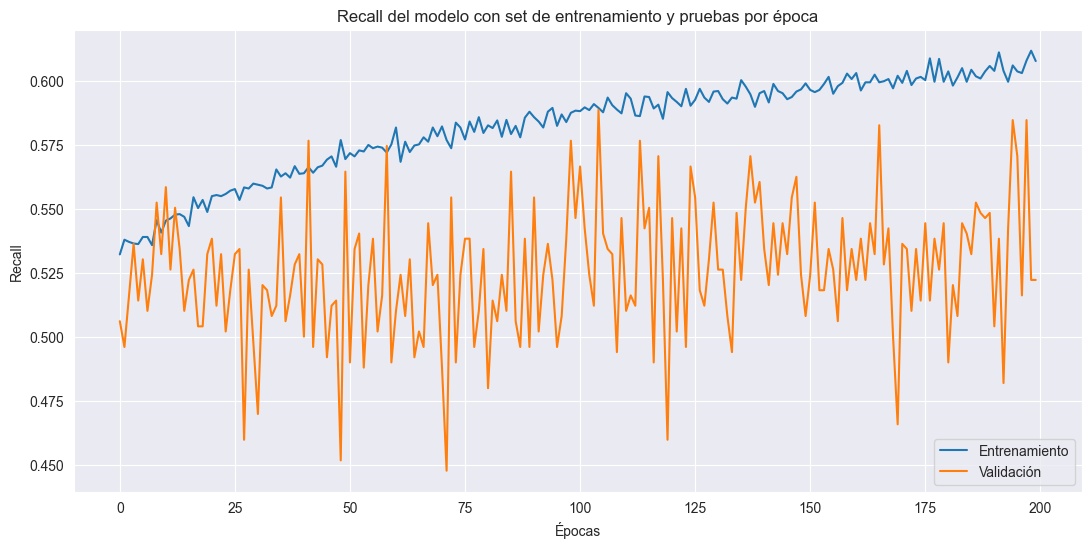

In [333]:
plt.figure(figsize=(13,6))
plt.plot(history_clas.history['recall_1'])
plt.plot(history_clas.history['val_recall_1'])
plt.title("Recall del modelo con set de entrenamiento y pruebas por época")
plt.ylabel('Recall')
plt.xlabel('Épocas')
plt.legend(['Entrenamiento', 'Validación'], loc='lower right')
plt.show()

De igual manera, los resultados del recall tienen tendencias diferentes en el set de entrenamiento y validación, y sus gráficas pueden presentar inidicios de overfitting.

* Optimizacion de hiperparametros

  Elegimos el metodo Optuna para hallar los mejores hiperparametros para el problema de clasificacion con red neuronal

In [334]:
def objective(trial):

    num_layers = trial.suggest_int('num_layers', 1, 3)
    model_name = "Red_Neuronal_Clasificacion"
    model_clas = Sequential(name=model_name)

    metrics = ["Recall"]

    # model = Sequential()

    for i in range(num_layers):
        num_units = trial.suggest_int(f'n_units_layer_{i}', 4, 128) # la cantidad de neuronas de cada capa tambien se puede pasar como hiperparámetro
        # activations = trial.suggest_categorical(f'')
        model_clas.add(Dense(num_units, activation='relu')) # capas densas con activacion ReLU

    # capa de salida
    model_clas.add(Dense(1, activation='sigmoid'))

    # compilar
    # model_clas.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.Recall()])
    model_clas.compile(optimizer= 'adam', loss=loss, metrics=metrics)

    # entrenar
    epochs = trial.suggest_int('epochs', 10, 100)
    batch_size = trial.suggest_int('batch_size', 256, 512)

    # entrenar
    model_clas.fit(x_train4, Y_train4, validation_data=(x_val4, y_val4), epochs=epochs, batch_size=batch_size, verbose=0)

    # evaluar
    score = model_clas.evaluate(x_val4, y_val4, verbose=0)
    return score[1]

# crear un estudio de Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# obtener los mejores hiperparámetros
best_params = study.best_params
print("Best parámetros encontrados:", best_params)


[I 2024-06-23 13:45:07,848] A new study created in memory with name: no-name-38e4337d-ceed-4239-b310-5c0113d6e2be
[I 2024-06-23 13:45:20,197] Trial 0 finished with value: 0.4879032373428345 and parameters: {'num_layers': 1, 'n_units_layer_0': 64, 'epochs': 87, 'batch_size': 434}. Best is trial 0 with value: 0.4879032373428345.
[I 2024-06-23 13:45:24,611] Trial 1 finished with value: 0.45766130089759827 and parameters: {'num_layers': 3, 'n_units_layer_0': 59, 'n_units_layer_1': 103, 'n_units_layer_2': 4, 'epochs': 13, 'batch_size': 349}. Best is trial 1 with value: 0.45766130089759827.
[I 2024-06-23 13:45:41,157] Trial 2 finished with value: 0.5181451439857483 and parameters: {'num_layers': 2, 'n_units_layer_0': 15, 'n_units_layer_1': 63, 'epochs': 95, 'batch_size': 325}. Best is trial 1 with value: 0.45766130089759827.
[I 2024-06-23 13:45:46,418] Trial 3 finished with value: 0.47983869910240173 and parameters: {'num_layers': 3, 'n_units_layer_0': 114, 'n_units_layer_1': 85, 'n_units_la

Best parámetros encontrados: {'num_layers': 2, 'n_units_layer_0': 6, 'n_units_layer_1': 126, 'epochs': 51, 'batch_size': 297}


Creamos el modelo definitivo con los mejores hiperparametros encontrados

In [335]:
num_layers = best_params['num_layers']
epochs = best_params['epochs']
batch_size = best_params['batch_size']
optimizer = best_params.get('optimizer', 'adam')
loss = 'binary_crossentropy'
# metrics = [tf.keras.metrics.Recall()]
metrics= ['Recall']

output_units = best_params.get('output_units', 1)
output_activation = 'sigmoid'
model_name = "Red_Neuronal_Clasificacion"
model_clas = Sequential(name=model_name)
# model_clas = Sequential()
for i in range(num_layers):
   num_units = best_params[f'n_units_layer_{i}']
   model_clas.add(Dense(num_units, activation='relu'))

model_clas.add(Dense(output_units, activation=output_activation))
model_clas.compile(optimizer=optimizer, loss=loss, metrics=metrics)
history_optuna_clas= model_clas.fit(x_train4, Y_train4, validation_data=(x_val4, y_val4), epochs=epochs, batch_size=batch_size, verbose=0)

In [336]:
print(model_clas.summary())

Model: "Red_Neuronal_Clasificacion"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_331 (Dense)               │ (None, 6)              │           102 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_332 (Dense)               │ (None, 126)            │           882 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_333 (Dense)               │ (None, 1)              │           127 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,335 (13.03 KB)

 Trainable params: 1,111 (4.34 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,224 (8.69 KB)

None


In [337]:
# Valor del loss 'binary_crossentropy' de la ultima epoca de entrenamiento
history_optuna_clas.history['loss'][-1]

0.38057324290275574

In [338]:
# Vemos los nombres de las claves del history del modelo
print(history_optuna_clas.history.keys())

dict_keys(['Recall', 'loss', 'val_Recall', 'val_loss'])


In [342]:
# Valor del Recall de la ultima epoca de entrenamiento
history_optuna_clas.history['val_Recall'][-1]

0.4334677457809448

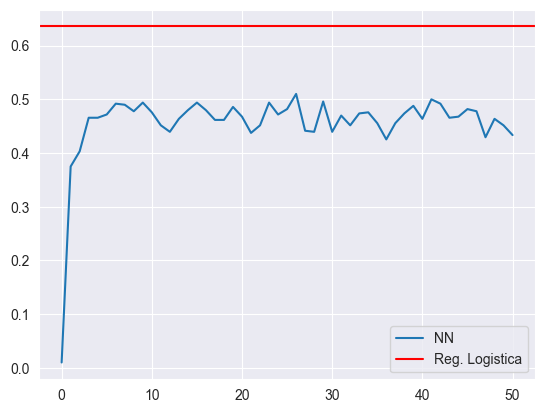

In [343]:
# Graficamos el Recall del primer modelo de regresion logistica vs modelo red neuronal
plt.plot(history_optuna_clas.history['val_Recall'], label='NN')
plt.axhline(recall, color='red', label='Reg. Logistica',linestyle = '-')
plt.legend()
plt.show()

In [344]:
history_optuna_clas= model_clas.fit(x_train4, Y_train4, validation_data=(X_test4, y_test4), epochs=epochs, batch_size=batch_size, verbose=0)

In [346]:
# Valor del Recall de la ultima epoca de entrenamiento
recall_nn_test= history_optuna_clas.history['val_Recall'][-1]
recall_nn_test


0.39953088760375977

Vemos las predicciones del modelo para el set de test

In [347]:
def specificity(y_test, y_pred):
    tn = sum((y_test == 0) & (y_pred == 0))
    fp = sum((y_test == 0) & (y_pred == 1))
    return tn / (tn + fp)

In [348]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


def metricas (y_test,y_pred):
    precision = precision_score(y_test, y_pred)
    # print('precision:',precision)
    tpr = recall_score(y_test, y_pred)
    # print('TPR:',tpr)
    f1 = f1_score(y_test, y_pred)
    # print('f1:',f1)
    especificidad = specificity(y_test, y_pred)
    # print('specificity',especificidad)
    return precision, tpr, f1, especificidad

In [349]:
# Optimización del umbral
def mejor_umbral(model_clas, X_test, y_test, thresholds):
    best_threshold = None
    best_specificity = 0.0
    best_tpr = 0.50

    for threshold in thresholds:
        y_pred_proba = model.predict(X_test).flatten()
        y_pred = (y_pred_proba >= threshold).astype(int)

        precision, recall, f1, specificity = metricas(y_test, y_pred)

        # Guardar el mejor umbral basado en el mínimo valor de especificidad y TPR
        if specificity > best_specificity and recall > best_tpr:
            best_specificity = specificity
            best_tpr = recall
            best_threshold = threshold
    print(best_threshold)
    return best_threshold

In [350]:
# Definir un rango de umbrales para probar
thresholds = np.arange(0.40, 0.6, 0.001)

best_threshold = mejor_umbral(model_clas, X_test4, y_test4, thresholds)

0.4


In [351]:
y_pred = model_clas.predict(X_test4).flatten()
y_pred = (y_pred >= best_threshold).astype(int)
accuracy_nn= accuracy_score(y_test4, y_pred)
print('accuracy_nn:',accuracy_nn)
recall_nn = recall_score(y_test4, y_pred)
precision_nn, tpr_nn, f1_nn, specificity_nn = metricas(y_test4,y_pred)
print('precision:',precision_nn)
print('recall:',tpr_nn)
print('f1_nn:',f1_nn)
print('specificity_nn:',specificity_nn)
confusion_matrix(y_test4,y_pred)

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
accuracy_nn: 0.8344253585974853
precision: 0.6825902335456475
recall: 0.5027365129007036
f1_nn: 0.5790184601530842
specificity_nn: 0.9315476190476191


array([[4069,  299],
       [ 636,  643]], dtype=int64)

## Explicabilidad SHAP

* Tenemos nuestro modelos de redes neuronales ya entrenados a los cuales se les implementara explicabilidad del modelo

### Explicabilidad Red Neuronal Regresion

In [352]:
feature_names=X_train3.columns.values
feature_names

array(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'RainToday', 'Temperature',
       'Pressure', 'Humidity', 'Cloud'], dtype=object)

In [370]:
# Crea un objeto explainer SHAP para problema regresion
X_test3 = np.array(X_test3)

explainer3 = shap.Explainer(model_reg, X_test3, feature_names= feature_names)

In [371]:
shap_values3 = explainer3(X_test3) # regresion

PermutationExplainer explainer: 5648it [3:51:46,  2.48s/it]                                


In [ ]:
# Calcular e imprimir el SHAP values para el primer registro en el conjunto de test
shap_values_example = shap_values3[0:1]
print(shap_values_example)

.values =
array([[[ 0.51188175],
        [-0.25784723],
        [-0.24014343],
        [-0.2786033 ],
        [-1.20083487],
        [ 0.0108384 ],
        [ 0.04297797],
        [ 0.00367563],
        [ 0.10068205],
        [-0.11000835],
        [-0.09605367],
        [-0.10078761],
        [-0.20115032],
        [ 0.25350267],
        [-0.23808371],
        [ 0.02052878]]])

.data =
array([[ 20.3,  32.3,   0. ,   8.6,  11.4,   5. ,  43. ,  14. ,   1. ,
         15. ,  17. ,   0. ,   6.8,  -3.5, -11. ,   0. ]])


In [ ]:
expected_value3 = explainer3.expected_value.numpy()
print(expected_value3[0])

2.1276488


In [ ]:
shap_values3.base_values = expected_value3[0]

In [ ]:
shap_values3.values.shape # tiene que ser de la forma (5647, 16). Los values estan encolunmados y nos da error mas adelante

(5647, 16, 1)

In [ ]:
shap_values3.values= np.array(shap_values3.values).reshape(5647, 16)

In [ ]:
shap_values3

.values =
array([[ 0.51188175, -0.25784723, -0.24014343, ...,  0.25350267,
        -0.23808371,  0.02052878],
       [-0.1720075 ,  0.01708878, -0.35506987, ...,  0.03469357,
        -0.00108661,  0.01540915],
       [ 0.52638573,  0.03822673, -0.34451427, ..., -0.0346582 ,
         0.14404166,  0.36918615],
       ...,
       [-0.19338433,  0.28645043, -0.20447342, ..., -0.12489269,
         0.47815858,  0.16724381],
       [-0.42477303,  0.1203057 , -0.06748719, ..., -0.02039388,
        -0.41917225,  0.00757765],
       [-0.44747305,  0.50268795, -0.07452448, ..., -0.06275823,
        -0.41390186,  0.23777712]])

.base_values =
2.1276488

.data =
array([[ 20.3,  32.3,   0. , ...,  -3.5, -11. ,   0. ],
       [ 10.7,  20.7,   0. , ...,  -2.1, -20. ,   0. ],
       [ 19. ,  35.9,   0. , ...,  -1.9, -14. ,   4. ],
       ...,
       [  8.3,  16.2,   0. , ...,  -1.7,   2. ,   2. ],
       [  5. ,  17.3,   0. , ...,  -2.2, -29. ,   0. ],
       [  4.8,  12.3,   2.2, ...,  -2. , -23. ,   

### Interpretabilidad local sobre una determinada instancia

Explicar las predicciones para instancias individuales de los datos se conoce como interpretabilidad local . SHAP explica cómo se llegan a las predicciones individuales en términos de contribuciones de cada una de las variables de entrada del modelo. Este es un enfoque altamente intuitivo que produce resultados simples pero informativos.

In [ ]:
index=1

In [ ]:
model.predict(X_test3)[index]

2.986345578608204

In [ ]:
explanation3 = shap.Explanation(values=shap_values3[index], base_values=expected_value3[0], feature_names=feature_names)

El diagrama de cascada (waterfall) traza la visualización más completa de una **única predicción**. Explica las contribuciones subyacentes de cada característica a la predicción en el conjunto de datos. La estructura en cascada enfatiza la naturaleza aditiva de los contribuyentes positivos y negativos, y cómo se basan en el valor base para generar la predicción del modelo, f(x). El valor actual de las variables aparecen al lado del nombre de las mismas

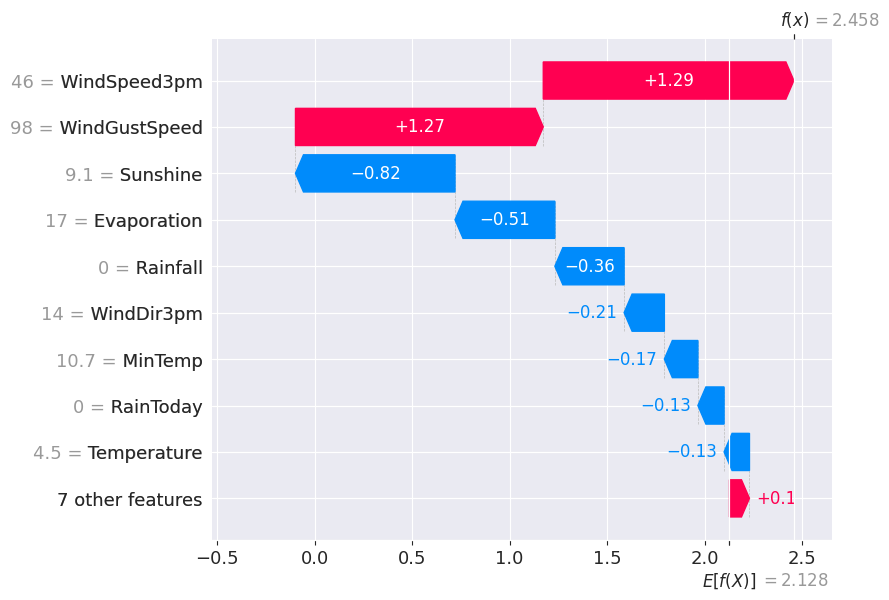

In [ ]:
shap.plots.waterfall(explanation3)

El SHAP value cuantifica la cantidad y direccion en la cual cada variable impacta en la cantidad de lluvia predicha.
Los SHAP values dentro de las flechas rojas corresponden a las variables de entrada que impulsan al modelo hacia la predicción de una lluvia mas alta, mientras que los que estan dentro de las flechas azules impulsan hacia predicciones mas bajas.
***La prediccion final es valor base (base value) mas las suma de todos los valores SHAP.***

**En nuestro caso, para esta instancia, la variables mas importantes son 'Evaporation', 'WindGustSpeed' y 'Rainfall' ("empujan" negativamente),,'WindSpeed3pm' y 'Humidity' son las unicas que lo hacen positivamente. Mientras que el resto lo hace negativamente tambien**

Mientras que los gráficos en cascada son amplios y no escatiman en detalles al explicar una predicción, los gráficos de fuerza (force plot) son representaciones equivalentes que muestran la información clave en un formato más condensado.

En un force plot las variables que empujan a la prediccion hacia valores mas altos aparecen a la izquierda en rojo, mientras que las que empujan hacia valores mas bajos aparecen a la derecha en azul. El valor actual de las variables aparecen al lado del nombre de las mismas. Variables con valores SHAP mas grandes (mayor impacto) tienen flechas mas largas.

In [ ]:
# Graficamos el mismo registro del conjunto de test que el grafico anterior
ind = 1
shap.initjs()
shap.plots.force(shap_values3[ind])

Comprobamos nuevamente las 3 variables con mayor importancia en la prediccion ('Evaporation', 'WindGustSpeed' y 'Rainfall').

### Interpretabilidad global

El objetivo de los métodos de interpretación global es describir el comportamiento esperado de un modelo de aprendizaje automático con respecto a la distribución completa de valores de sus variables de entrada. Con SHAP, esto se logra agregando los valores SHAP para instancias individuales en toda la población.

In [ ]:
explanation3 = shap.Explanation(values=shap_values3, base_values=expected_value3[0], feature_names=feature_names, data=X_test)

El punto de partida más sencillo para la interpretación global con SHAP es examinar el valor SHAP absoluto medio para cada característica en todos los datos. Esto cuantifica, en promedio, la magnitud (positiva o negativa) de la contribución de cada característica a los precios de la vivienda previstos. Las características con valores SHAP absolutos medios más altos son más influyentes

Regresion

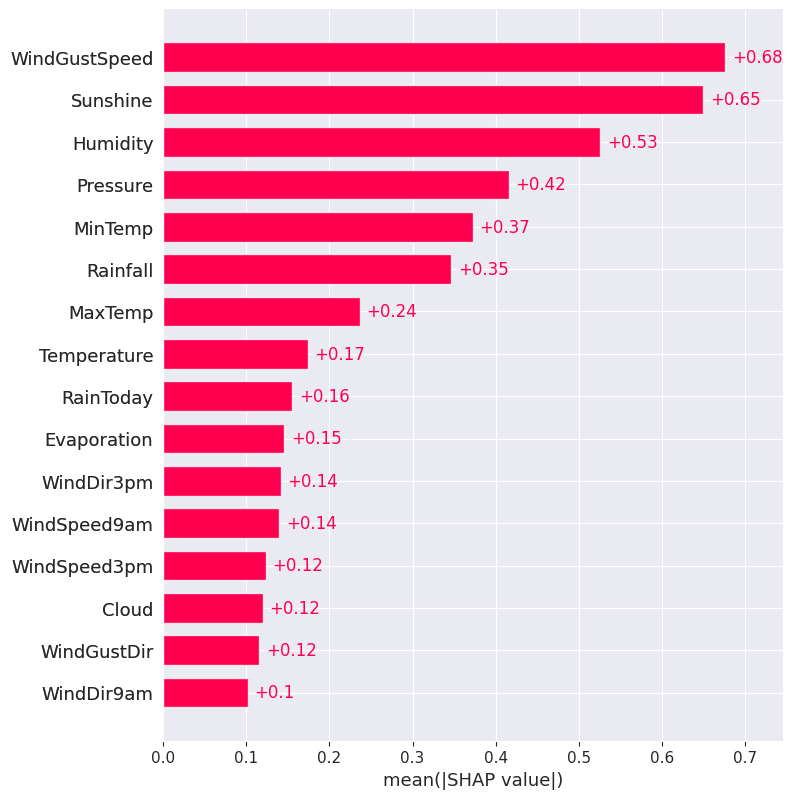

In [ ]:
shap.plots.bar(explanation3, max_display=16)

Las variables son rankeadas de arriba hacia abajo de acuerdo al valor absoluto medio de los SHAP values **para el dataset completo**., es decir la magnitud promedio del impacto de cada variable en la prediccion de la variable target, en todas las intancias.
Los valores SHAP absolutos medios son, en promedio, cuanto impacta cada variable en la prediccion, en la direccion positiva o negativa.

**Aquí vemos que 'WindGustSpeed' es la variable más influyente, contribuyendo en promedio ± 0,51  a la prediccion de cuanto llueve mañana ('RainFallTomorrow'). Por el contrario, la variables menos informativas, son 'Cloud', 'RainToday','Evaporation' y 'WinDir3pm'**

Los gráficos de Beeswarm (enjambre de abejas) son una visualización más compleja y rica en información de valores SHAP que revelan no solo la importancia relativa de las características, sino también sus relaciones reales con el resultado previsto.

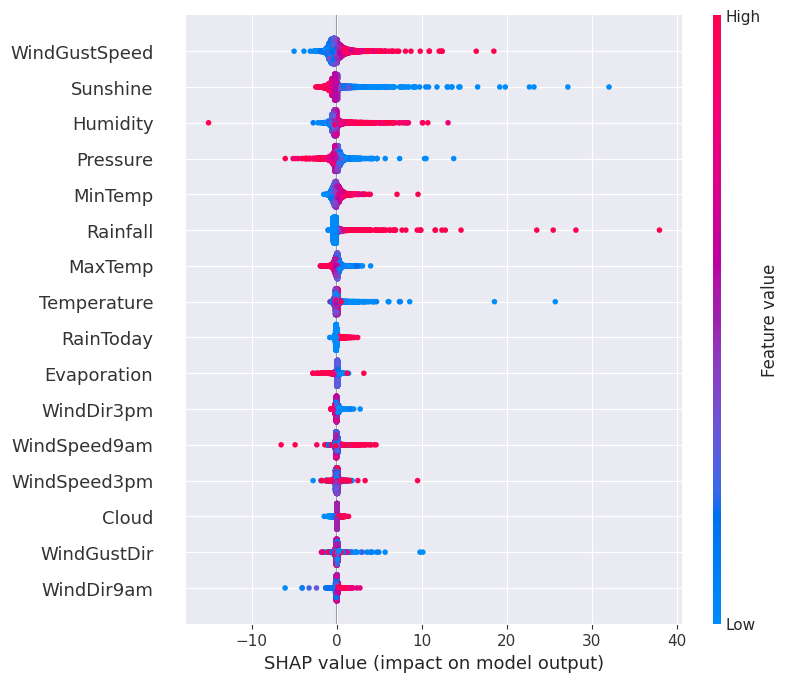

In [ ]:
shap.plots.beeswarm(explanation3, max_display= 16 )

El ranking de las variables es el mismo que en el grafico de barras. En Beeswarm plot, para cada variable, cada instancia (es decir cada fila) del dataset aparece como un punto. Los puntos se distribuyen a los largo del eje x de acuesdo a su valor SHAP. En los lugares donde hay alta densidad de valores SHAP, los puntos se apilan verticalmente.
Examinando como se distribuyen los valores SHAP revela como una variable puede influenciar las prediciones del modelo.
La barra de colores corresponde al valor bruto (no confundir con el SHAP value)de cada variable en cada instancia (punto) del grafico

Observamos que en el caso de la variable 'WindGustSpeed' a valores mas altos de la misma conduce a predicciones mas altas de cuanto va a llover mañana ('RainFallTomorrow') y a valores mas bajos el aporte es menor.

### Explicabilidad Red Neuronal Clasificacion

In [ ]:
index=2

In [ ]:
model_clas.predict(X_test4)[index]

177/177 [==============================] - 0s 1ms/step


array([0.47090295], dtype=float32)

In [ ]:
feature_names=X_train.columns.values
feature_names

array(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'RainToday', 'Temperature',
       'Pressure', 'Humidity', 'Cloud'], dtype=object)

In [ ]:
# Crea un objeto explainer SHAP para problema regresion
explainer4 = shap.DeepExplainer(model_clas, np.array(X_test4))

In [ ]:
# Calcula los valores SHAP para un conjunto de ejemplos de prueba
shap_values4 = explainer4(np.array(X_test4))

In [ ]:
# Calcular e imprimir el SHAP values para el primer registro en el conjunto de test
shap_values_example = shap_values4[0:1]
print(shap_values_example)

.values =
array([[[ 0.04952642],
        [-0.0265897 ],
        [-0.01322369],
        [-0.0210153 ],
        [-0.10549875],
        [-0.01007574],
        [-0.00184568],
        [-0.02200386],
        [-0.02612472],
        [-0.00829043],
        [ 0.01323356],
        [-0.00088433],
        [-0.03400608],
        [ 0.015447  ],
        [-0.0063099 ],
        [ 0.00070406]]])

.data =
array([[ 1.63027366,  1.62063953, -0.31789418,  1.11928924,  1.21028714,
        -0.61880658,  0.06185317,  1.44817281, -1.6265461 , -0.03596149,
        -0.36005045, -0.54661907,  0.55668801, -0.66917521,  0.47537094,
        -0.0408373 ]])


In [ ]:
expected_value4 = explainer4.expected_value.numpy()
print(expected_value4[0])

0.21166998


In [ ]:
shap_values4.base_values = expected_value4[0]

In [ ]:
shap_values4.values.shape # tiene que ser de la forma (5647, 16). Los values estan encolunmados y nos da error mas adelante

(5647, 16, 1)

In [ ]:
shap_values4.values= np.array(shap_values4.values).reshape(5647, 16)

In [ ]:
shap_values4

.values =
array([[ 0.04952642, -0.0265897 , -0.01322369, ...,  0.015447  ,
        -0.0063099 ,  0.00070406],
       [-0.02655454, -0.01359794, -0.01725552, ..., -0.01564361,
        -0.00245406,  0.0080981 ],
       [ 0.16425779, -0.0581538 , -0.01741132, ..., -0.01012854,
        -0.0103981 , -0.01659479],
       ...,
       [-0.05983029,  0.04538171, -0.02732398, ..., -0.01323241,
         0.06151102,  0.02187105],
       [-0.07389778,  0.01694935, -0.02003129, ..., -0.00647068,
        -0.02822748,  0.00093549],
       [-0.17493044,  0.21845394,  0.01670446, ..., -0.01732287,
        -0.0302482 ,  0.00746666]])

.base_values =
0.21166998

.data =
array([[ 1.63027366e+00,  1.62063953e+00, -3.17894179e-01, ...,
        -6.69175214e-01,  4.75370944e-01, -4.08372998e-02],
       [-6.34420036e-02, -1.39292143e-01, -3.17894179e-01, ...,
         3.09288612e-04, -1.01841471e-01, -4.08372998e-02],
       [ 1.40091633e+00,  2.16682522e+00, -3.17894179e-01, ...,
         9.59499318e-02,  2.8

### Interpretabilidad local sobre una determinada instancia

Explicar las predicciones para instancias individuales de los datos se conoce como interpretabilidad local . SHAP explica cómo se llegan a las predicciones individuales en términos de contribuciones de cada una de las variables de entrada del modelo. Este es un enfoque altamente intuitivo que produce resultados simples pero informativos.

In [ ]:
index=0

In [ ]:
model_clas.predict(X_test4)[index]

177/177 [==============================] - 0s 1ms/step


array([0.01471288], dtype=float32)

In [ ]:
explanation4 = shap.Explanation(values=shap_values4[index], base_values=expected_value4[0], feature_names=feature_names)

El diagrama de cascada (waterfall) traza la visualización más completa de una **única predicción**. Explica las contribuciones subyacentes de cada característica a la predicción en el conjunto de datos. La estructura en cascada enfatiza la naturaleza aditiva de los contribuyentes positivos y negativos, y cómo se basan en el valor base para generar la predicción del modelo, f(x). El valor actual de las variables aparecen al lado del nombre de las mismas

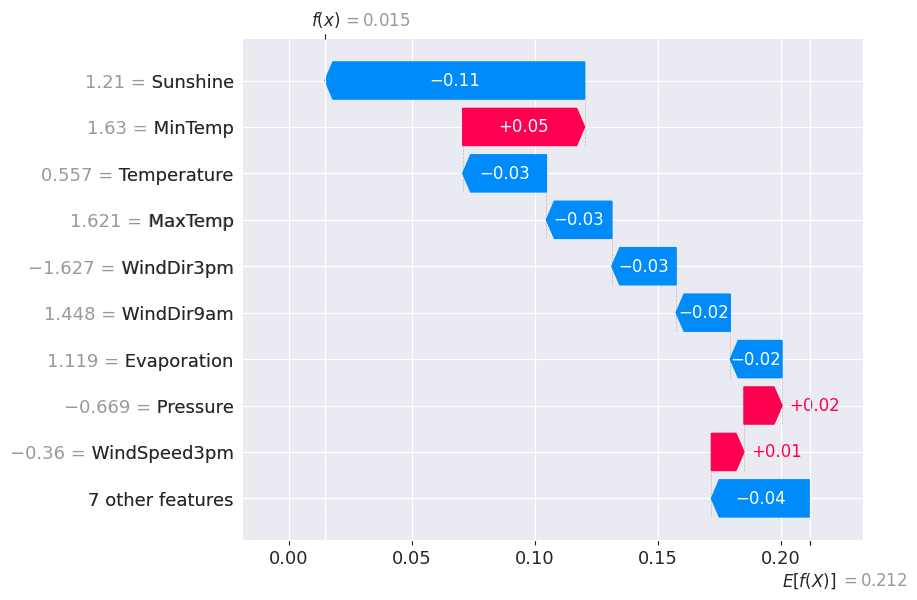

In [ ]:
shap.plots.waterfall(explanation4)

El SHAP value cuantifica la cantidad y direccion en la cual cada variable impacta en la cantidad de lluvia predicha.
Los SHAP values dentro de las flechas rojas corresponden a las variables de entrada que impulsan al modelo hacia la predicción de una lluvia mas alta, mientras que los que estan dentro de las flechas azules impulsan hacia predicciones mas bajas.
***La prediccion final es valor base (base value) mas las suma de todos los valores SHAP.***

**En nuestro caso, para esta instancia, la variables mas importantes son 'Sunshine','MaxTemp y 'WindDir3am' ("empujan" negativamente),,'MinTemp' es la que lo hace mas positivamente. Mientras que el resto lo hace negativamente tambien**

En un force plot las variables que empujan a la prediccion hacia valores mas altos aparecen a la izquierda en rojo, mientras que las que empujan hacia valores mas bajos aparecen a la derecha en azul. El valor actual de las variables aparecen al lado del nombre de las mismas. Variables con valores SHAP mas grandes (mayor impacto) tienen flechas mas largas.

In [ ]:
# Graficamos el mismo registro del conjunto de test que el grafico anterior
ind = 0
shap.initjs()
shap.plots.force(shap_values4[ind])

Comprobamos nuevamente las variables con mayor importancia en la prediccion, que son las mismas que en el grafico anterior. Debajo de cada flecha vemos el valor que toman las variables para esta instancia en particular.

### Interpretabilidad global

El objetivo de los métodos de interpretación global es describir el comportamiento esperado de un modelo de aprendizaje automático con respecto a la distribución completa de valores de sus variables de entrada. Con SHAP, esto se logra agregando los valores SHAP para instancias individuales en toda la población.

In [ ]:
explanation4 = shap.Explanation(values=shap_values4, base_values=expected_value4[0], feature_names=feature_names, data=X_test4)

El punto de partida más sencillo para la interpretación global con SHAP es examinar el valor SHAP absoluto medio para cada característica en todos los datos. Esto cuantifica, en promedio, la magnitud (positiva o negativa) de la contribución de cada característica a los precios de la vivienda previstos. Las características con valores SHAP absolutos medios más altos son más influyentes

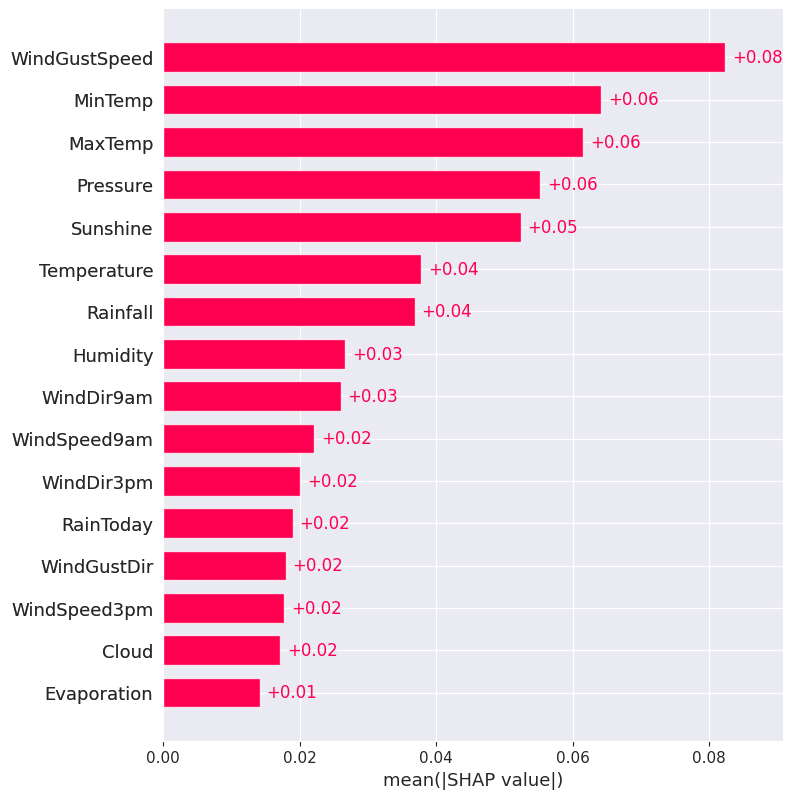

In [ ]:
shap.plots.bar(explanation4, max_display=16)

Las variables son rankeadas de arriba hacia abajo de acuerdo al valor absoluto medio de los SHAP values **para el dataset completo**., es decir la magnitud promedio del impacto de cada variable en la prediccion de la variable target, en todas las intancias.
Los valores SHAP absolutos medios son, en promedio, cuanto impacta cada variable en la prediccion, en la direccion positiva o negativa.

**Aquí vemos que 'WindGustSpeed' es la variable más influyente, contribuyendo en promedio ± 0,08  a la prediccion de si llueve mañana ('RainTomorrow'). Le siguen 'Pressure', 'MaxTemp', 'Sunshine'. La que menos 'RainToday'**

Los gráficos de Beeswarm (enjambre de abejas) son una visualización más compleja y rica en información de valores SHAP que revelan no solo la importancia relativa de las características, sino también sus relaciones reales con el resultado previsto.

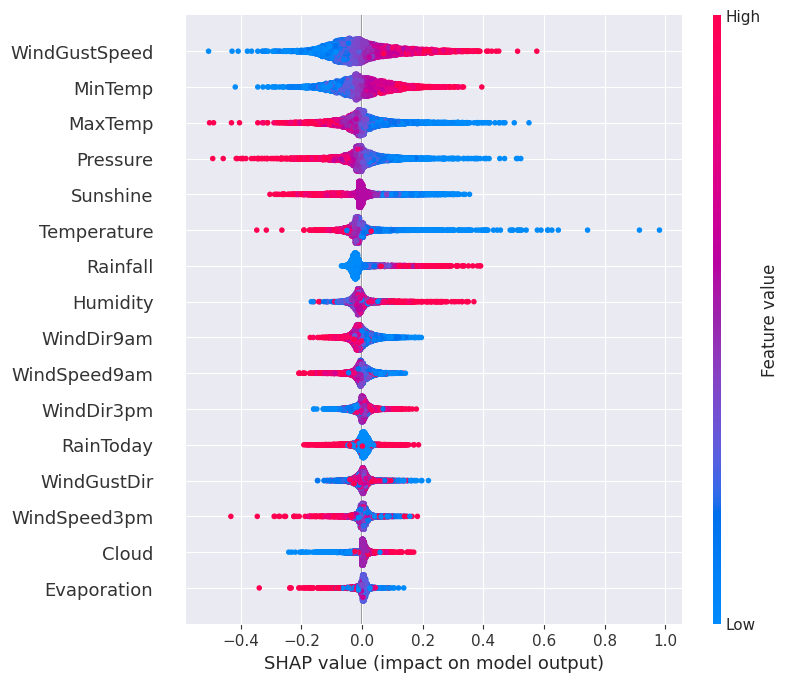

In [ ]:
shap.plots.beeswarm(explanation4, max_display= 16 )

El ranking de las variables es el mismo que en el grafico de barras. En Beeswarm plot, para cada variable, cada instancia (es decir cada fila) del dataset aparece como un punto. Los puntos se distribuyen a los largo del eje x de acuesdo a su valor SHAP. En los lugares donde hay alta densidad de valores SHAP, los puntos se apilan verticalmente.
Examinando como se distribuyen los valores SHAP revela como una variable puede influenciar las prediciones del modelo.
La barra de colores corresponde al valor bruto (no confundir con el SHAP value)de cada variable en cada instancia (punto) del grafico

Observamos que en el caso de la variable 'WindGustSpeed' a valores mas altos de la misma conduce a predicciones mas altas de si va a llover mañana ('RainTomorrow') y a valores mas bajos el aporte es menor.

### ***10.	Comparacion de  modelos***

* **Modelos de Regresion:**

In [ ]:
# Recordamos los RMSE de los mmodelos de regresion lineal tratados al principio
rmse_test, rmse_sgd_test, rmse_ridge_test, rmse_lasso_test, rmse_elas_test

(5.852900827843206,
 5.858017215914881,
 5.855043209721427,
 5.859172596196957,
 5.860859816677365)

In [ ]:
history.history['loss'][-1]# Valor del MSE de la ultima epoca de entrenamiento

0.3100912272930145

In [ ]:
# Calculamos el RMSE del modelo de red neuronal
rmse_nn= history.history['loss'][-1] ** 0.5
rmse_nn

0.5568583547842436

In [ ]:
# Crear el DataFrame con los modelos y sus métricas
tabla_comp_reg = pd.DataFrame({
    'modelo': ['OLS', 'SGD', 'Ridge', 'Lasso', 'Elastic-net'],
    'train rmse': [rmse_train, rmse_sgd_train, rmse_ridge_train, rmse_lasso_train, rmse_elas_train],
    'test rmse': [rmse_test, rmse_sgd_test, rmse_ridge_test, rmse_lasso_test, rmse_elas_test],
    'train R2': [R2_train, R2_sgd_train, R2_ridge_train, R2_lasso_train, R2_lasso_train],
    'test R2': [R2_test, R2_sgd_test, R2_ridge_test, R2_lasso_test, R2_elas_test]
})

# Observamos la Tabla
tabla_comp_reg

modelo  train rmse  test rmse  train R2   test R2
0          OLS    5.608559   5.852901  0.183087  0.209780
1          SGD    5.613367   5.861761  0.181686  0.207386
2        Ridge    5.608625   5.855043  0.183068  0.209201
3        Lasso    5.608995   5.859173  0.182960  0.208086
4  Elastic-net    5.609201   5.860860  0.182960  0.207629

In [ ]:
tabla_comp_reg.loc[len(tabla_comp_reg)] = ['RNN', rmse_nn_train, rmse_nn_test,R2_nn_train,R2_nn_test]
tabla_comp_reg

modelo  train rmse  test rmse  train R2   test R2
0          OLS    5.608559   5.852901  0.183087  0.209780
1          SGD    5.613367   5.861761  0.181686  0.207386
2        Ridge    5.608625   5.855043  0.183068  0.209201
3        Lasso    5.608995   5.859173  0.182960  0.208086
4  Elastic-net    5.609201   5.860860  0.182960  0.207629
5          RNN    5.193759   5.504311  0.302509  0.301105

En la tabla anterior se resumen todos los modelos desarrollados, con las métricas rmse y R2 de entrenamiento y prueba.

rmse es fácilmente interpretable al tratarse de mm de lluvia.
La métrica R2, que varia entre 0 a 1, siendo R2=1 el valor para un modelo que predice perfectamente.

En nuestro análisis interesa particularmente el valor de test R2, y por ello se elige al modelo de redes neuronales es el mejor de todos, aunque por poco margen.

Vemos que ningún modelo logra una predicción aceptable (R2 muy bajos), pero el modelo de redes neuronales es el que mejor R2 test arroja.

**En consecuencia, se elige el modelo de red neuronal y la metrica asociada es "error cuadratico medio" (MSE).**

* **Models de Clasificacion:**

In [ ]:
# Crear el DataFrame con los modelos y sus métricas
tabla_comp_clas= pd.DataFrame({
    'modelo': ['Reg_Logistica', 'Reg_Logistica_balanced', 'Reg_Logistica_over', 'Reg_Logistica_smote'],
    'Precision': [precision_logreg, precision_b, precision_c, precision_d],# VER DEFINICION DE VARIABLES
    'Recall': [recall_logreg, recall_b, recall_c, recall_d],
    'F1score': [F1score_logreg, F1score_b, F1score_c, F1score_d],
    'Specificity': [spec, spec_b, spec_c, spec_d],
    'Accuracy': [accuracy_logreg, accuracy_balance, accuracy_over, accuracy_smote],
})

# Observamos la Tabla
tabla_comp_clas

modelo  Precision    Recall   F1score  Specificity  \
0           Reg_Logistica   0.730508  0.336982  0.461209     0.963599   
1  Reg_Logistica_balanced   0.528875  0.680219  0.595075     0.822573   
2      Reg_Logistica_over   0.529519  0.680219  0.595483     0.823031   
3     Reg_Logistica_smote   0.526895  0.673964  0.591424     0.822802   

   Accuracy  
0  0.821675  
1  0.790331  
2  0.790685  
3  0.789092

In [ ]:
# Crear el DataFrame con los modelos y sus métricas
tabla_comp_clas.loc[len(tabla_comp_clas)] = ['Redes Neuronales',precision_nn,tpr_nn,f1_nn, specificity_nn,accuracy_nn]
tabla_comp_clas

modelo  Precision    Recall   F1score  Specificity  \
0           Reg_Logistica   0.730508  0.336982  0.461209     0.963599   
1  Reg_Logistica_balanced   0.528875  0.680219  0.595075     0.822573   
2      Reg_Logistica_over   0.529519  0.680219  0.595483     0.823031   
3     Reg_Logistica_smote   0.526895  0.673964  0.591424     0.822802   
4        Redes Neuronales   0.669284  0.533229  0.593560     0.922848   

   Accuracy  
0  0.821675  
1  0.790331  
2  0.790685  
3  0.789092  
4  0.834602

En la tabla anterior se resumen todos los modelos desarrollados, con sus metricas asociadas. Vemos que en cuanto a la metrica accuracy que el modelo de red neuronal presento un accuracy mejor que todos, igual a 0,83.

Preferimos un modelo que tenga un menor número de falsos negativos, es decir, aquel que minimice la cantidad de veces que predice que no lloverá cuando en realidad sí lo hace.

La regresión Logística es más precisa y específica, pero tiene problemas en identificar correctamente las verdaderas positivas (recall).

Reg_Logistica_balanced, Reg_Logistica_over y Reg_Logistica_smote tienen un mejor equilibrio entre precisión y recall, mejorando el F1 score, aunque con una ligera disminución en especificidad y precisión. Si bien tienen mejor Recall, indicando una buena capacidad para reducir falsos negativos.

Redes Neuronales ofrecen un buen balance general con alta precisión, especificidad y un F1 score bueno, logrando un modelo más eficaz en términos generales.

En resumen, aunque la regresión logística estándar es la más precisa, los modelos balanceados tienen brevemente mejor recall, las redes neuronales proporcionan un mejor rendimiento global y equilibrio entre las métricas, lo que hace más adecuado este modelo. 

### ***11.	MLops***

Para desarrollar la puesta en producción comenzamos armando funciones para cada paso del procesamiento de datos para limpieza y orden de variables. 

Luego estas funciones las ubicamos dentro de otra donde como entrada tiene al df y como salida la predicción. 

Posteriormente, guardamos el modelo.

Una vez que estamos en el codigo de app.py traemos el modelo entrenado que teniamos guardado y agregamos los deslizantes para cada columna.

Llevamos estos datos a predecir con nuestro modelo. 

Luego lo corremos en consola para verlo.

### ***12.	Conclusión del trabajo práctico***

Desarrollamos modelos de regresión lineal en el que todos los modelos de regresión tienen un rendimiento similar, observando MSE.
Los valores de R² son bajos para todos estos modelos, indicando que estos modelos explican una porción de los datos.
La red neuronal tiene un MSE más bajo, sugieriendo que tiene una mejor capacidad para ajustar y predecir los datos. Y un R² también más alto por lo que explica una mayor porción de los datos.

Regresión Logística no es tan efectiva en identificar las verdaderas positivas. Los modelos de clasificación balanceados disminuyen en especificidad y precisión. Entonces las Redes Neuronales son la mejor opción si miramos en términos generales. 

Por lo tanto identificamos a redes neuronales en regresión y clasificación como los modelos para pasar a producción.

De esta última etapa concluímos que las aplicaciones que desarrollamos son efectivas, funcionan correctamente y cumplen con los objetivos propuestos.

Como conlusión general podemos decir que, si bien los modelos no tienen unas métricas excelentes, pudimos desarrollar cada paso del trabajo, los modelos y las aplicaciones, cumpliendo así lo planteado por la materia. 